# Housing Project

## problem statement:
    - The company suprise houses is looking at the prospective properties to buy houses to enter the market.
## Questions to answer:
    - Which variables are important to predict the price of variable?
    - How do these variables describe the price of the house ?




# Loading the dataset

### import the libraries

In [3]:
# important librares 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

#import warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#read the dataset 
house = pd.read_csv("train.csv")

In [5]:
#display the first 5 records 
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [6]:
#gather the data type and null value count in the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

#### Observations


- There are many null values present in the dataset 
- The data contains a combination of categorical and numerical values 


In [7]:
house.shape

(1168, 81)

#### Observations:

There are 1168 records and 81 columns.

In [8]:
#finding the descriptive statistics of the dataset.
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# Identify the types of problems(Regression/Classification)

In [9]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [10]:
house["SalePrice"].dtype

dtype('int64')

- Since, the sale price column is of numeric type the data can be handled as a regression problem

 - supervised
    - Regression
#### The evaluation metrics are:
  - R2 score
  - MSE
  - RMSE

# EDA-Exploratory Data Analysis

#### Summary statistics 

In [11]:
#descriptive statistics for the first 10 columns 
first_10 = house.iloc[:, :10]

#### categorical values 

In [12]:
#analysing the categorical descriptive statistics 
first_10.describe(include = 'object')

MSZoning Street Alley LotShape LandContour Utilities
count      1168   1168    77     1168        1168      1168
unique        5      2     2        4           4         1
top          RL   Pave  Grvl      Reg         Lvl    AllPub
freq        928   1164    41      740        1046      1168

### Univariate analysis

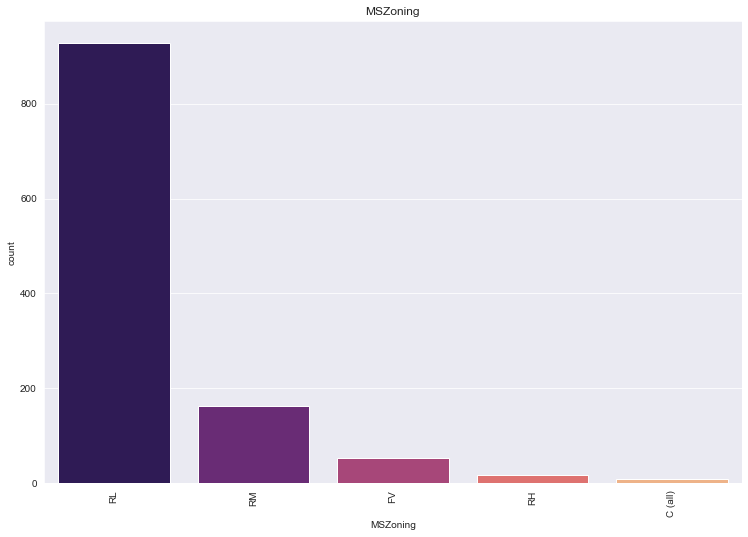

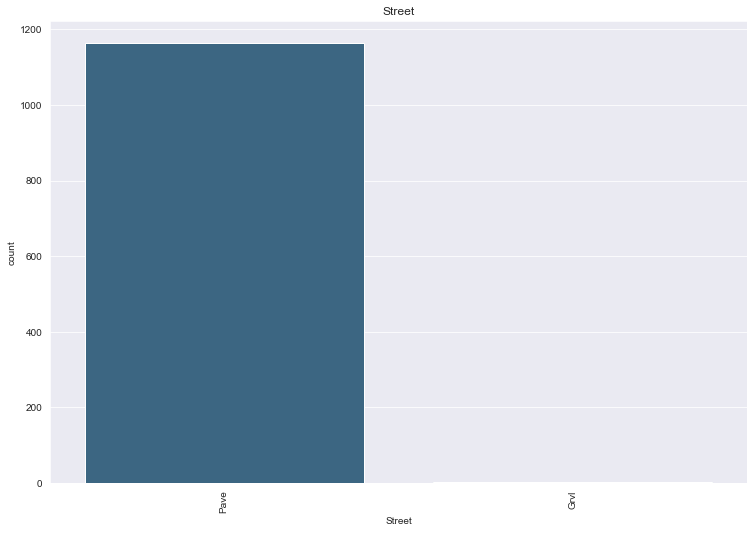

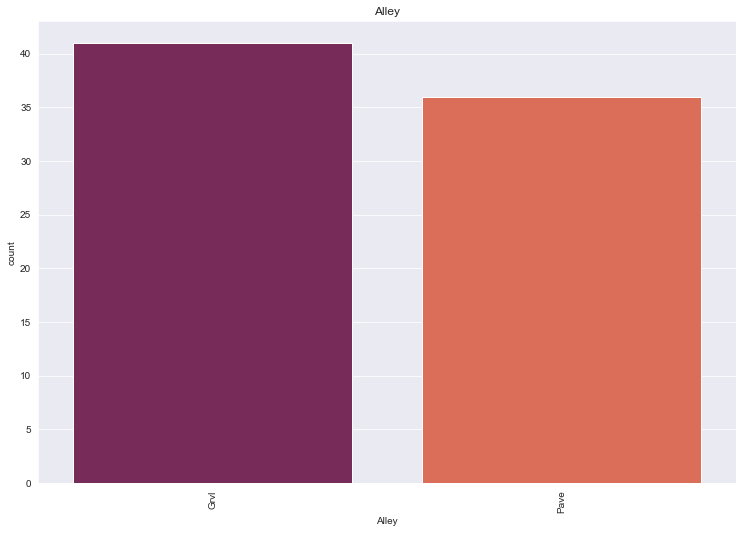

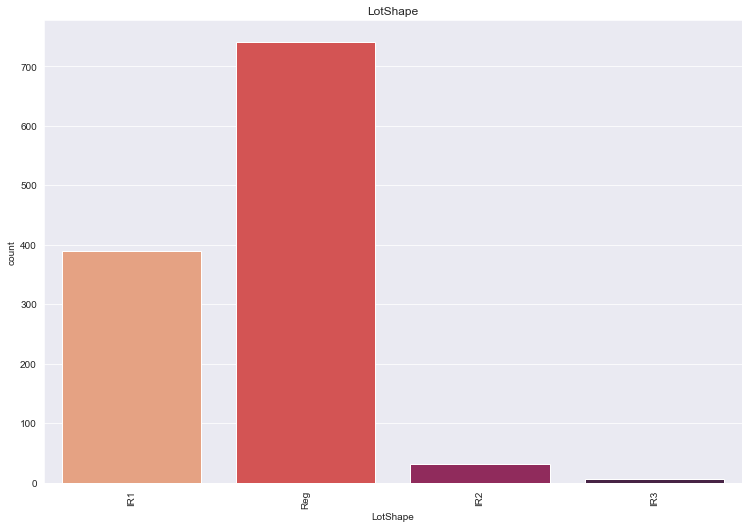

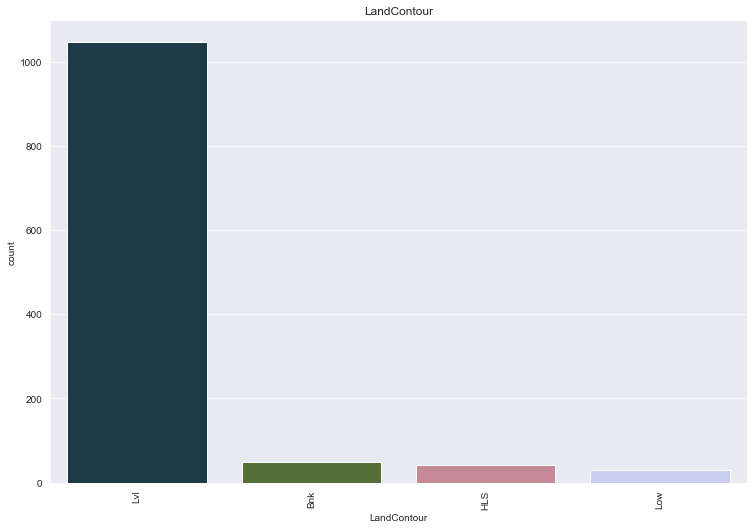

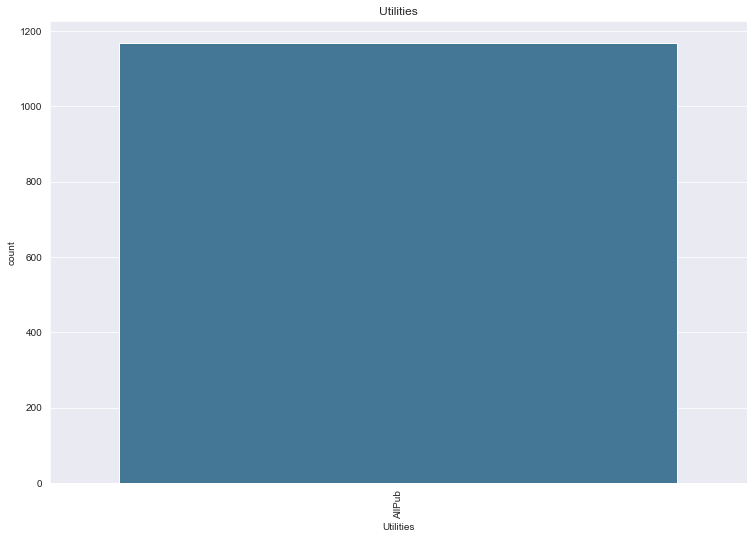

In [13]:
sns.set_style("darkgrid")

# MSZoning -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='MSZoning', 
    data = house,
    palette = 'magma'
).set_title('MSZoning')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Street -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Street',
    data = house,
    palette = 'viridis'
).set_title('Street')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)


# Alley -plot a bar chart
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Alley', 
    data = house,
    palette = 'rocket'
).set_title('Alley')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# LotShape -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='LotShape', 
    data = house,
    palette = 'rocket_r'
).set_title('LotShape')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# LandContour -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='LandContour', 
    data = house,
    palette = 'cubehelix'
).set_title('LandContour')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Utilities -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Utilities', 
    data = house,
    palette = 'mako'
).set_title('Utilities')
plt.xticks(rotation = 90)
plt.show()

### Observations


   - There are 1168 records with 5 unique values and  RL = Residential Low Density is the top most value with a frequency of 928 counts.
   - There are 1168 records with 2 unique values and  Pave= Paved road access is the topmost value with a frequency of 1164.
   - There are 77 records with 2 unique values and Grvl = Gravel alley access is the topmost value with a frequency of 41 
   - There are 1168 records with 4 unique values and Reg= Regular is the topmost value with a frequency of 740
   - There are 1168 records with 4 unique values and Lvl = Near Flat/Level is the topmost value with a frequency of 1046
   - There are 1168 records with 1 unique values and AllPu = All public Utilities (E,G,W,& S) is the topmost value with a frequency of 1168
 #### We can drop the column alley, since, it has more than 50% of the records as nan   
 #### we can drop the column utilities, since, the column contians singular value. Therefore, the prediction might become one-sided affecting the predictive capabilities of the model.
 

#### numerical values 

In [14]:
first_10.describe()

Id   MSSubClass  LotFrontage        LotArea
count  1168.000000  1168.000000    954.00000    1168.000000
mean    724.136130    56.767979     70.98847   10484.749144
std     416.159877    41.940650     24.82875    8957.442311
min       1.000000    20.000000     21.00000    1300.000000
25%     360.500000    20.000000     60.00000    7621.500000
50%     714.500000    50.000000     70.00000    9522.500000
75%    1079.500000    70.000000     80.00000   11515.500000
max    1460.000000   190.000000    313.00000  164660.000000

###  finding skewness
- skewness is a measure of symmetry in a distribution. lack of symmetry
- A standard normal distribution is perfectly symmetrical and has zero skew.
- Calculation for skewness


In [15]:
# function to cal skew value for short reference
def skew(mean, median, std):
    skew = 3*(mean-median)/std
    return skew
    

In [16]:
def find_left_right(mean, median, std):
    value = skew(mean, median, std)
    if value > -3 and value < 3:
        return(str(value) + " is "+ "not skewed")
    else:
        return(str(value) + " is " +"skewed")
    

In [17]:

print("id : " +find_left_right(724.136130,714.500000,416.159877))
print("MSSubClass : " +find_left_right(56.767979,50.000000,41.940650))
print("LotFrontage : " + find_left_right(70.98847,70.00000,24.82875))
print("LotArea : " +find_left_right(56.767979,10484.749144,8957.442311))

id : 0.06946462549055382 is not skewed
MSSubClass : 0.48411116661282055 is not skewed
LotFrontage : 0.11943452650657081 is not skewed
LotArea : -3.492508509553269 is skewed


### Bivariate and univariate analysis

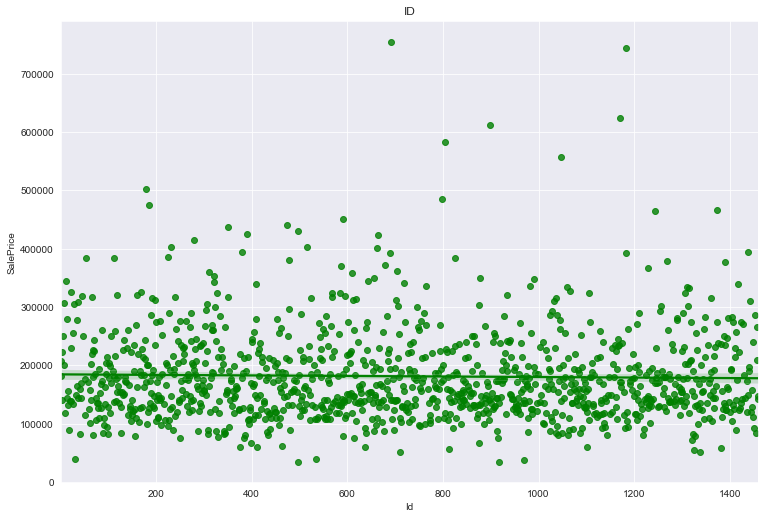

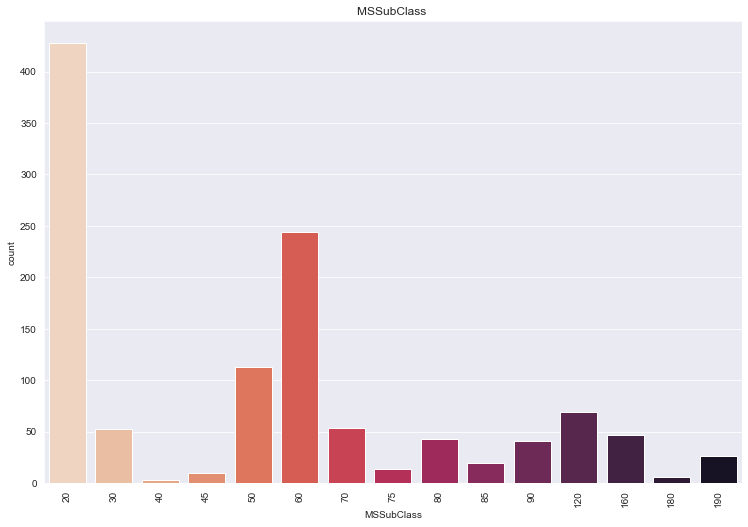

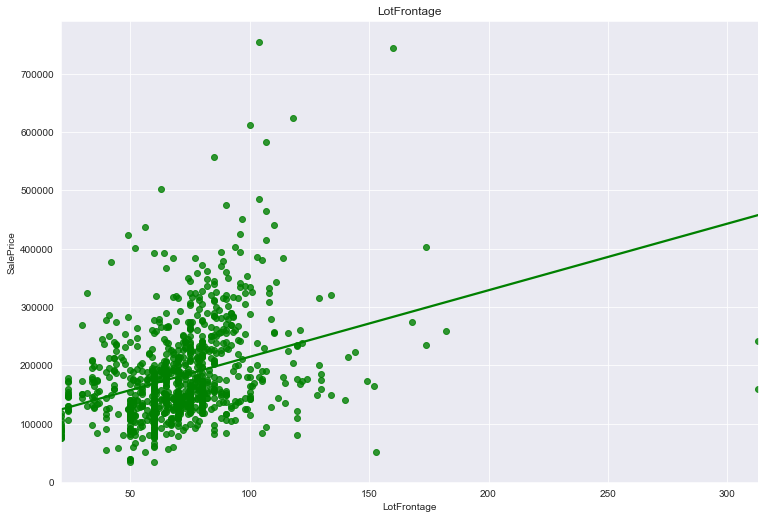

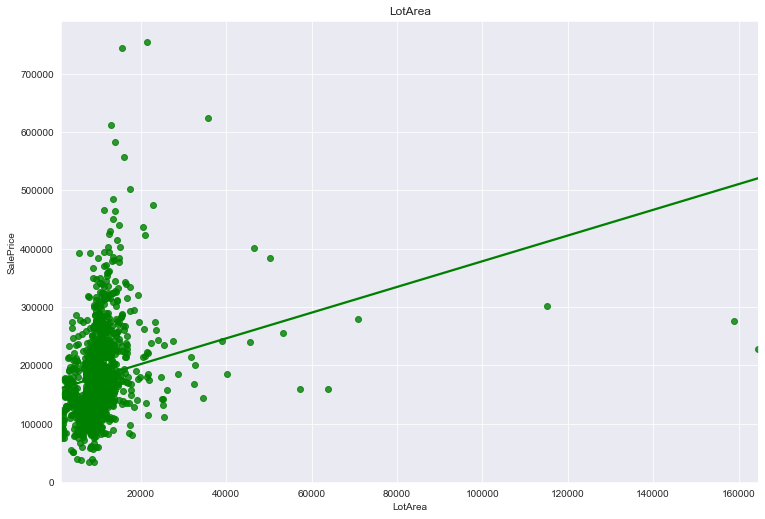

In [18]:

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#id -> reg plot
sns.regplot(x="Id",
            y="SalePrice",
           data = house,
           color = 'g'
            ).set_title("ID")
plt.show()

time.sleep(1)
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
# MSSubClass  -plot a bar chart 
sns.countplot(
    x='MSSubClass', 
    data = house,
    palette = 'rocket_r'
).set_title('MSSubClass ')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#LotFrontage -> reg plot
sns.regplot(x="LotFrontage",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("LotFrontage")
plt.show()

time.sleep(1)

#LotArea-> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.regplot(x="LotArea",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("LotArea")
plt.show()

## Observations

- The lot area is left skewed 
- The use of id column as minimal importance for the model. Therefore, id column can be dropped.
- Price and lotfrontage are positively correlated and has a linear relationship. However, the relationship does not mean causation that is increase in lot frontage does not directly increase sales price. But, there exsist a trend.
- price and lotarea are positively correlated and has a linear relationship. However, the relationship does not mean causation. But, there exsist a trend.
- MSSubClass identifies the type of dwelling invovlved in the sale, here 1 story 1946 and newer all styles dwelling are of higher count.



## ----------------------------------------------- first summary stat ----------------------------------------------

In [19]:
# analysing rest of the records
next_10 = house.iloc[:, 10:20]

In [20]:
#analysing the categorical variables 
next_10.describe(include = 'object')

LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count       1168      1168         1168       1168       1168     1168   
unique         5         3           25          9          8        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq         842      1105          182       1005       1154      981   

       HouseStyle  
count        1168  
unique          8  
top        1Story  
freq          578

### Univariate analysis

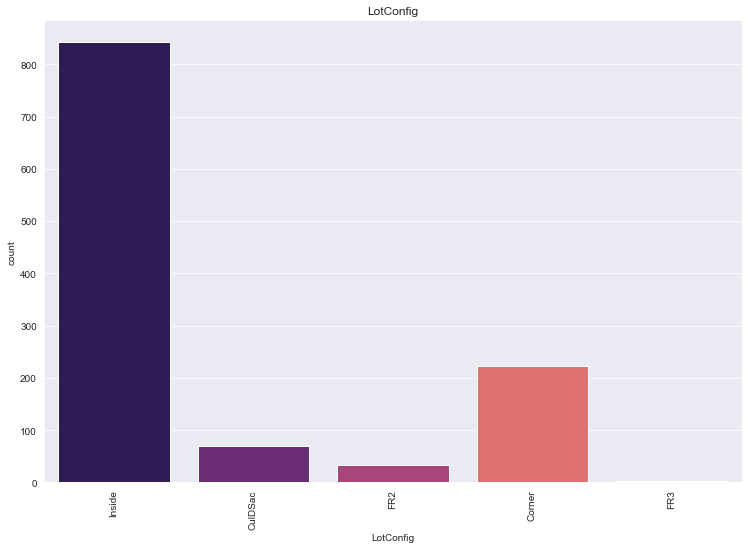

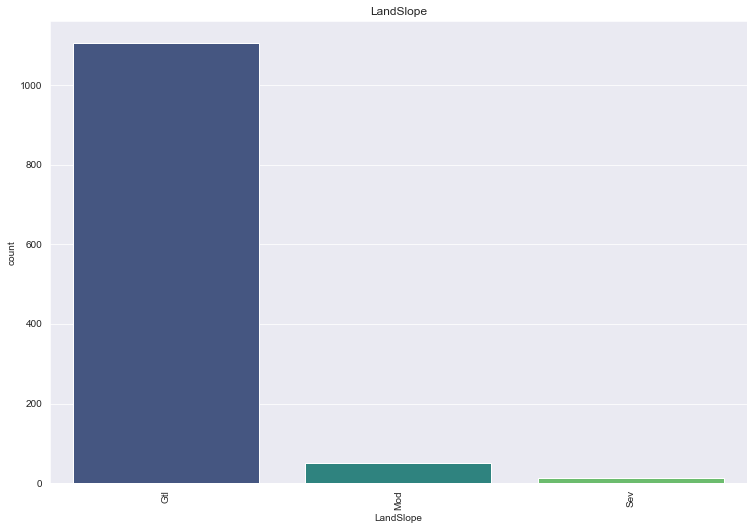

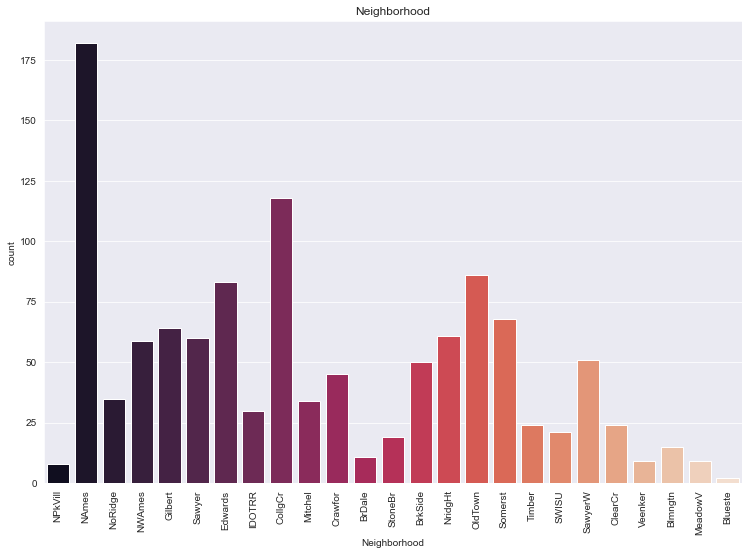

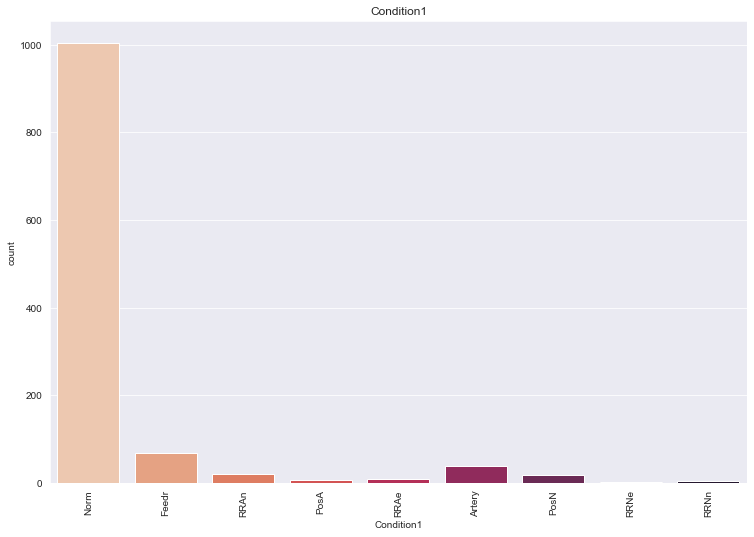

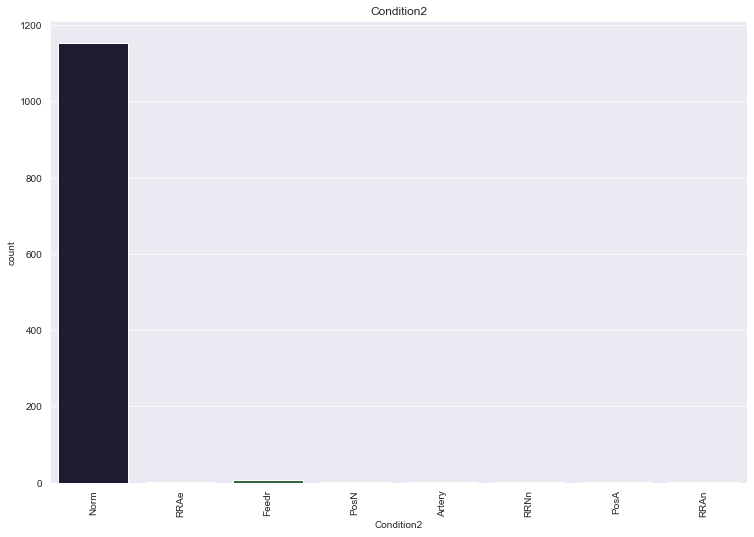

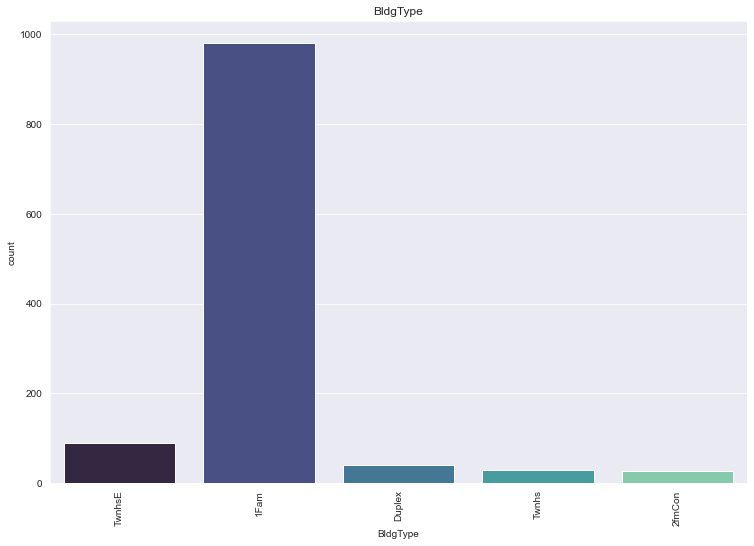

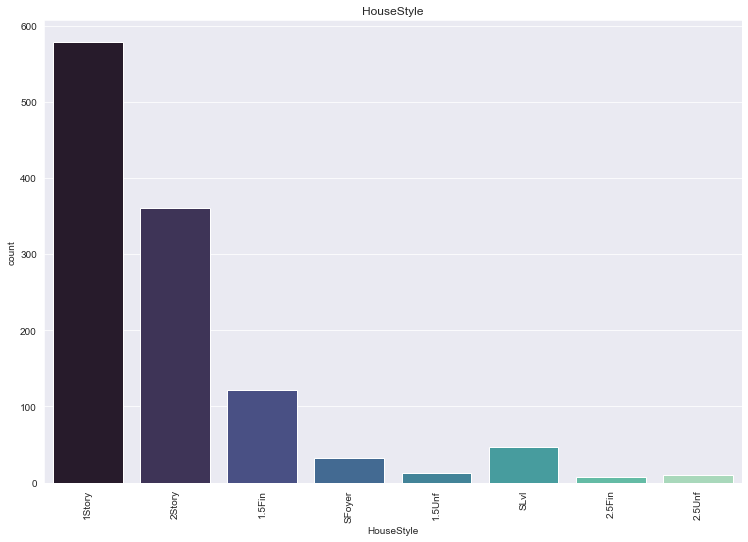

In [21]:
# LotConfig -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='LotConfig', 
    data = house,
    palette = 'magma'
).set_title('LotConfig')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# LandSlope -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='LandSlope',
    data = house,
    palette = 'viridis'
).set_title('LandSlope')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)


# Neighborhood -plot a bar chart
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Neighborhood', 
    data = house,
    palette = 'rocket'
).set_title('Neighborhood')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Condition1 -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Condition1', 
    data = house,
    palette = 'rocket_r'
).set_title('Condition1')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Condition2 -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Condition2', 
    data = house,
    palette = 'cubehelix'
).set_title('Condition2')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# BldgType -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='BldgType', 
    data = house,
    palette = 'mako'
).set_title('BldgType')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# HouseStyle -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='HouseStyle', 
    data = house,
    palette = 'mako'
).set_title('HouseStyle')
plt.xticks(rotation = 90)
plt.show()

## Observations 

- There are 1168 records with 5 unique values and LotConfig = Inside is the topmost value  with a frequency of 842 
- There are 1168 records with 3 unique values and LandSlope = Gtl is the topmost value  with a frequency of 1105
- There are 1168 records with 25 unique values and Neighborhood = Names is the topmost value  with a frequency of 182
- There are 1168 records with 9 unique values and condition1 = Norm is the topmost value with a frequency of 1005
- There are 1168 records with 8 unique values and condition2 = Norm is the topmost value with a frequenct of 981
- There are 1168 records with 5 uniques values and BldgType = 1Fam is the topmost value with a frequency of 981
- There are 1168 records with 8 unique values and HouseStyle = 1story is the topmost value with a frequency of 578



In [22]:
next_10.describe()

OverallQual  OverallCond    YearBuilt
count  1168.000000  1168.000000  1168.000000
mean      6.104452     5.595890  1970.930651
std       1.390153     1.124343    30.145255
min       1.000000     1.000000  1875.000000
25%       5.000000     5.000000  1954.000000
50%       6.000000     5.000000  1972.000000
75%       7.000000     6.000000  2000.000000
max      10.000000     9.000000  2010.000000

In [23]:
# fiding skewness 
print("OverallQual : " +find_left_right(6.104452,6.000000,1.390153))
print("OverallCond : " +find_left_right(5.595890,5.000000,1.124343))



OverallQual : 0.22541115977881618 is not skewed
OverallCond : 1.5899685416283103 is not skewed


## Univariate and bivariate analysis

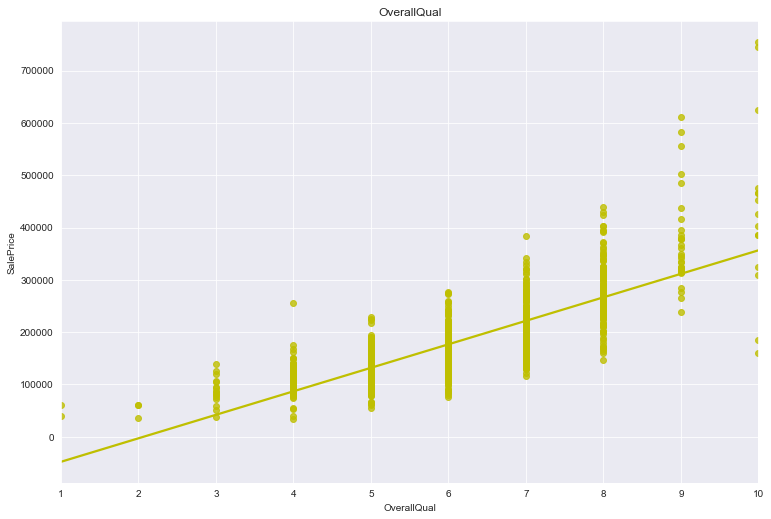

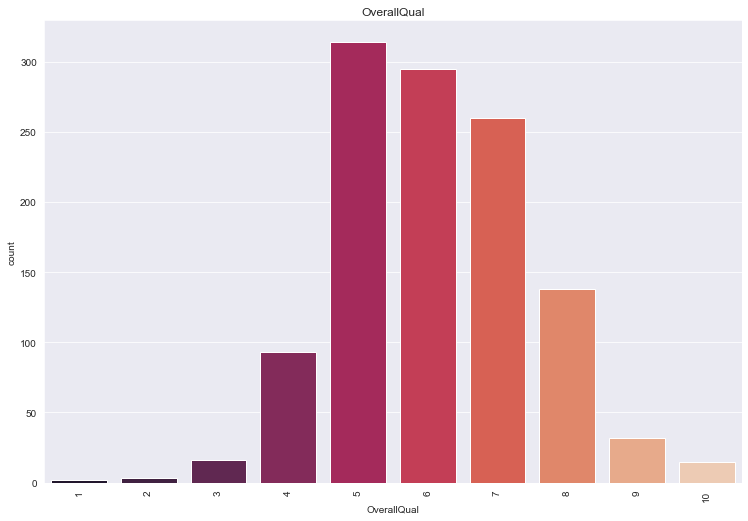

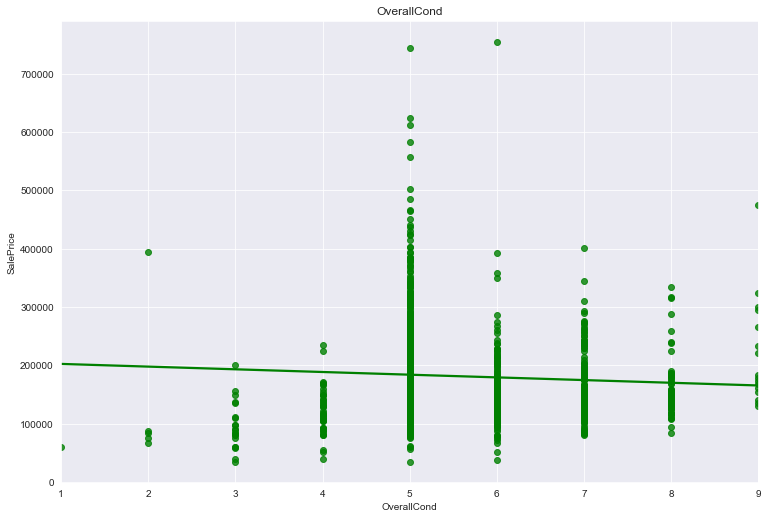

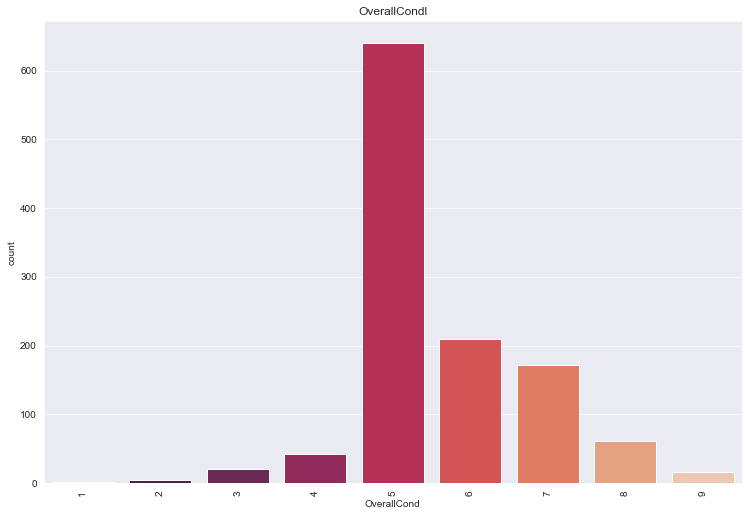

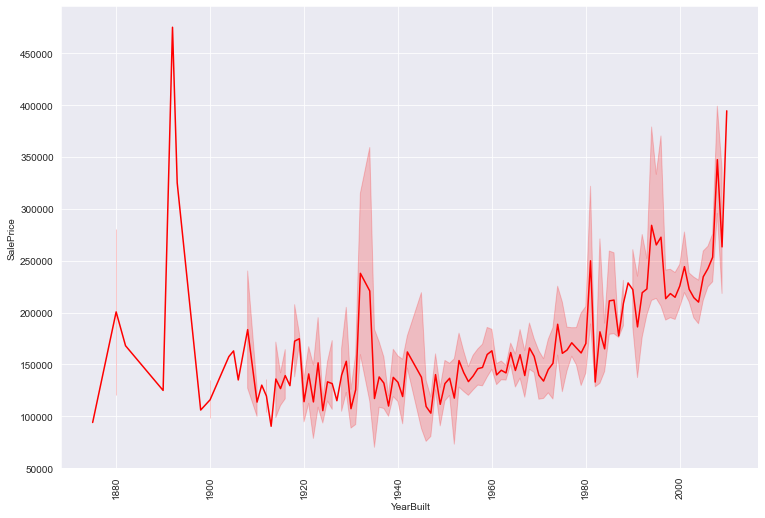

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#OverallQual -> reg plot
sns.regplot(x="OverallQual",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("OverallQual")
plt.show()
time.sleep(1)
# OverallQual -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='OverallQual', 
    data = house,
    palette = 'rocket'
).set_title('OverallQual')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#OverallQual -> reg plot
sns.regplot(x="OverallCond",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("OverallCond")
plt.show()
time.sleep(1)

#OverallCond -> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='OverallCond', 
    data = house,
    palette = 'rocket'
).set_title('OverallCondl')
plt.xticks(rotation = 90)
plt.show()




# year bulit - > time-series plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#create time series plot
sns.lineplot(x = 'YearBuilt',
              y= 'SalePrice',
              linestyle = 'solid',
             data = house,
             color = 'r'
             )
plt.xticks(rotation = 90)
plt.show()

### Observation
- The OverallQual and Overall cond are not skewed
- when sales price increase the overall quality of the house increases. However, this positive trend doesnot imply a casuation but, it literally indicates a postive trend.
- 5 = Average - average houses have the highest count in the dataset.
- The overallcond doesnot show a linear trend with price. 
-  5 = Average - average condition have the highest count in the dataset.
- price increases has years increase. However, the houses bulit between 1890 - 1900 has a sharp increase in price.This may be due to some outliers


## ----------------------------------------------- second summary stat ----------------------------------------------

In [25]:
#exploring rest of the variables 
next_10_2 = house.iloc[:, 20:30]
#categorical analysis
next_10_2.describe(include = 'object')

RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1168     1168        1168        1168       1161      1168   
unique         6        8          14          15          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq         915     1144         396         387        696       717   

       ExterCond Foundation  
count       1168       1168  
unique         5          6  
top           TA     CBlock  
freq        1022        516

In [26]:
MasVnrType_percentage = (696/1161)*100
print("The percentage of null values in MasVnrType: " + str(MasVnrType_percentage))

The percentage of null values in MasVnrType: 59.9483204134367


In [27]:
RoofMatl_percentage = (1144/1168)*100
print("The percentage of null values in RoofMatl: " + str(RoofMatl_percentage))

The percentage of null values in RoofMatl: 97.94520547945206


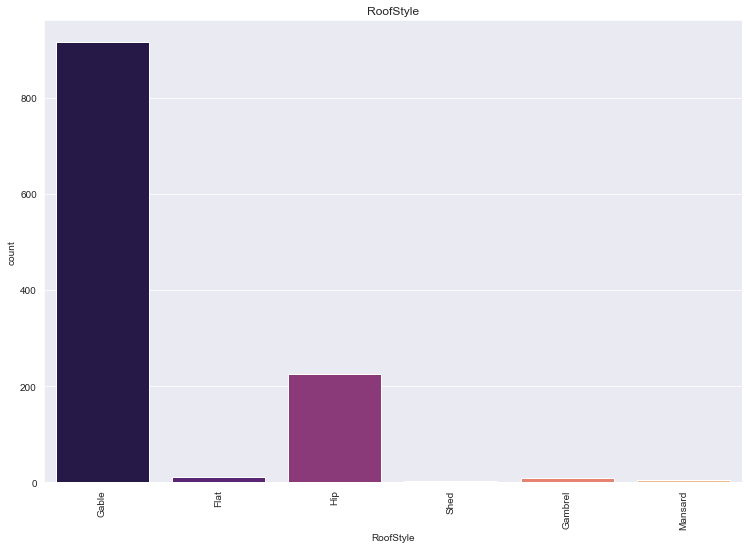

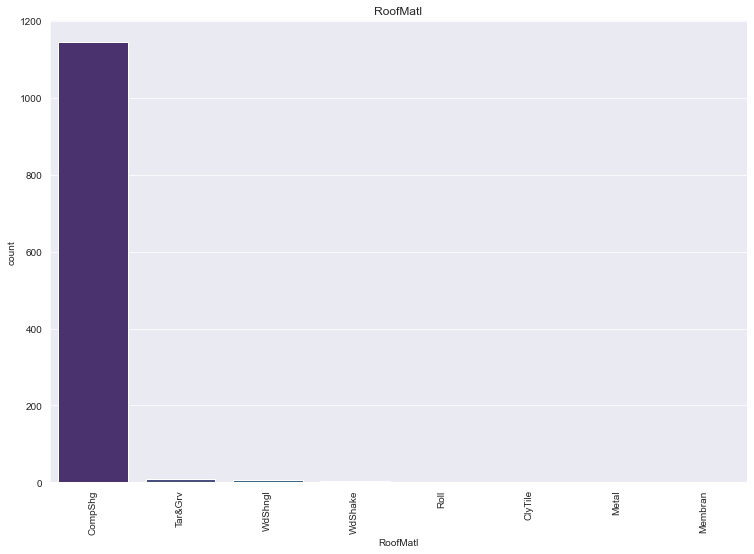

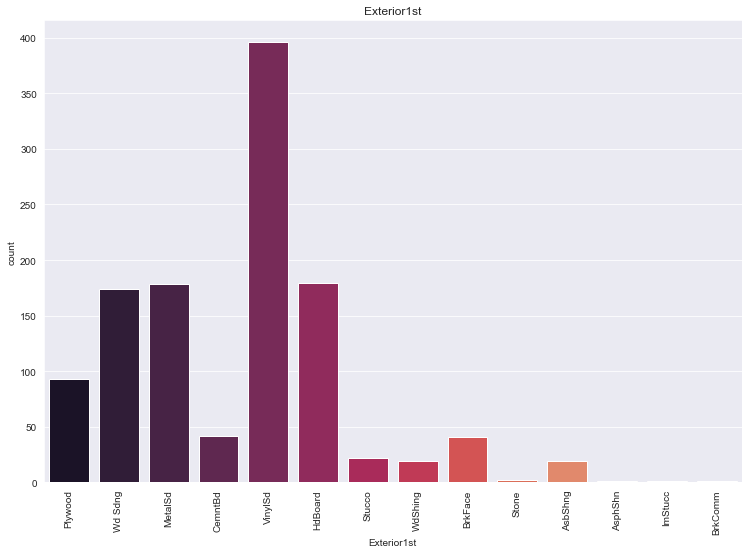

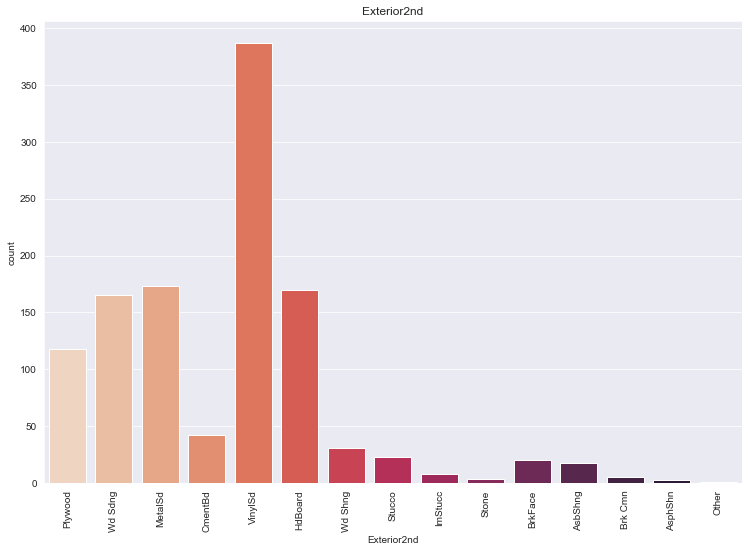

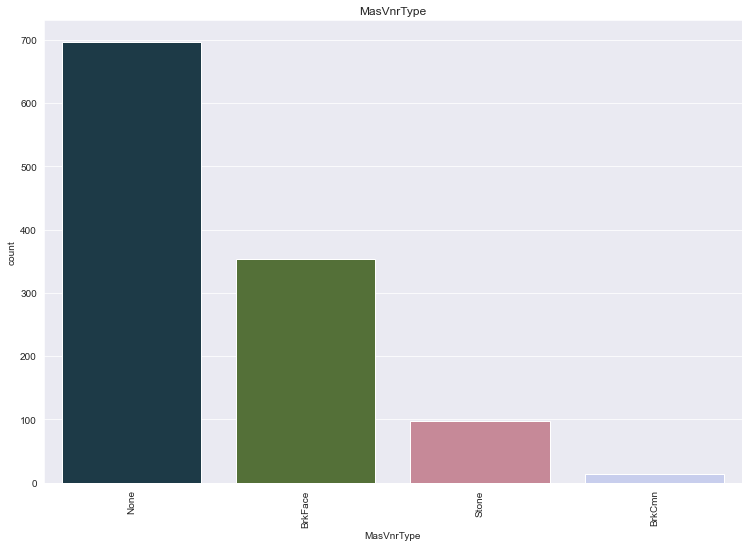

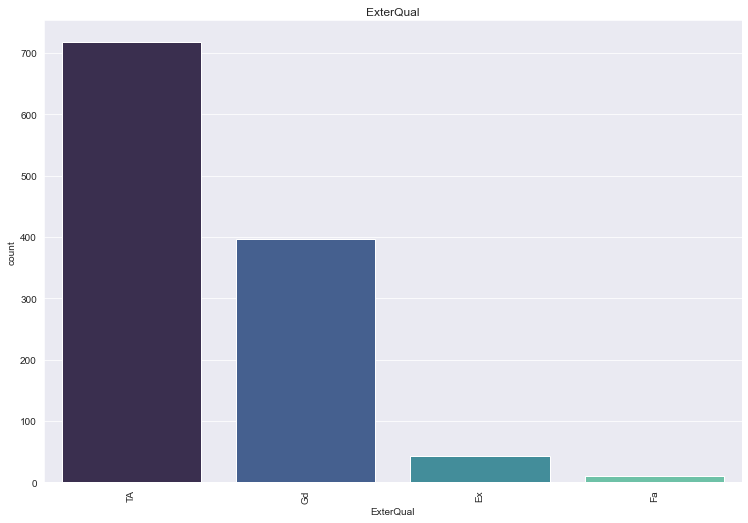

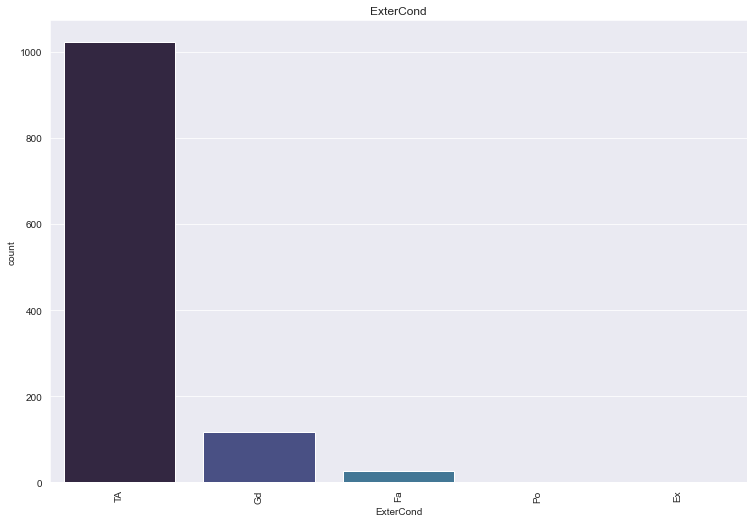

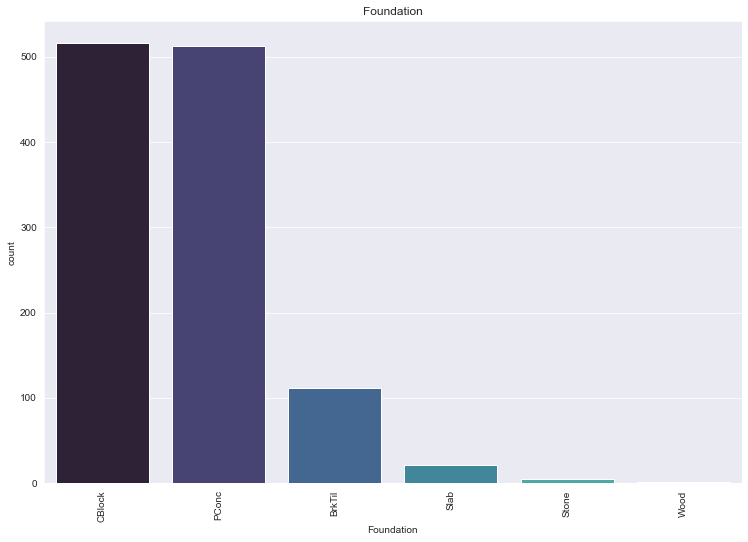

In [28]:
# RoofStyle -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='RoofStyle', 
    data = house,
    palette = 'magma'
).set_title('RoofStyle')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#RoofMatl -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='RoofMatl',
    data = house,
    palette = 'viridis'
).set_title('RoofMatl')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)


# Exterior1st -plot a bar chart
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Exterior1st', 
    data = house,
    palette = 'rocket'
).set_title('Exterior1st')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Exterior2nd -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Exterior2nd', 
    data = house,
    palette = 'rocket_r'
).set_title('Exterior2nd')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#MasVnrType -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='MasVnrType', 
    data = house,
    palette = 'cubehelix'
).set_title('MasVnrType')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#ExterQual -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='ExterQual', 
    data = house,
    palette = 'mako'
).set_title('ExterQual')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#ExterCond -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='ExterCond', 
    data = house,
    palette = 'mako'
).set_title('ExterCond')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#Foundation -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Foundation', 
    data = house,
    palette = 'mako'
).set_title('Foundation')
plt.xticks(rotation = 90)
plt.show()

## Observations:
- most of the columns have 1168 records  
- Columns :
     - Roofstyle : 6 unique values where, "Gable" as the topmost frequceny count of 915
     - RoofMatl  : 8 unique values where, "CompShg" as the topmost frequency count of 1144
     - Exterior1st: 14 uniqe values where, "VinylSd" as the topmost frequency count of 396
     - Exterior2nd: 15 unique values where, "VinylSd" as the topmost frequency count of 387
     - MasVnrType: 1161 records, 4 unique values where, "none" as the topmost frequency of 696
     - ExterQual: 4 unique values where, "TA" as the topmost frequency of 717
     - ExterCond: 5 unique values where, "TA" as the topmost frequency of 1022
     - Foundation: 6 unique values where, 'CBlock' as the topmost frequency of 516.
###  The MasVnrType has 696 "none" value and the calculated percentage is 60% of null value. Therefor the MarVnrType column can be dropped.
### The RoofMatl has 1144 "CompShg" value and the calculated percentage is 97.9%. Therefore the RoofMatl column can be dropped. By dropping these columns; the model will perform effectively.


In [29]:
next_10_2.describe()

YearRemodAdd   MasVnrArea
count   1168.000000  1161.000000
mean    1984.758562   102.310078
std       20.785185   182.595606
min     1950.000000     0.000000
25%     1966.000000     0.000000
50%     1993.000000     0.000000
75%     2004.000000   160.000000
max     2010.000000  1600.000000

In [30]:
# Find skewness
print("MasVnrArea : " +find_left_right(102.310078,0.000000,182.595606))

MasVnrArea : 1.6809289156717169 is not skewed


#### bivariate analysis

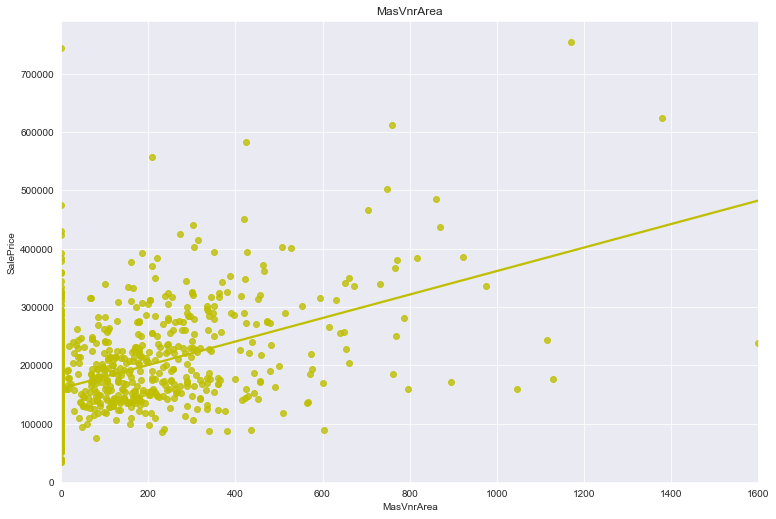

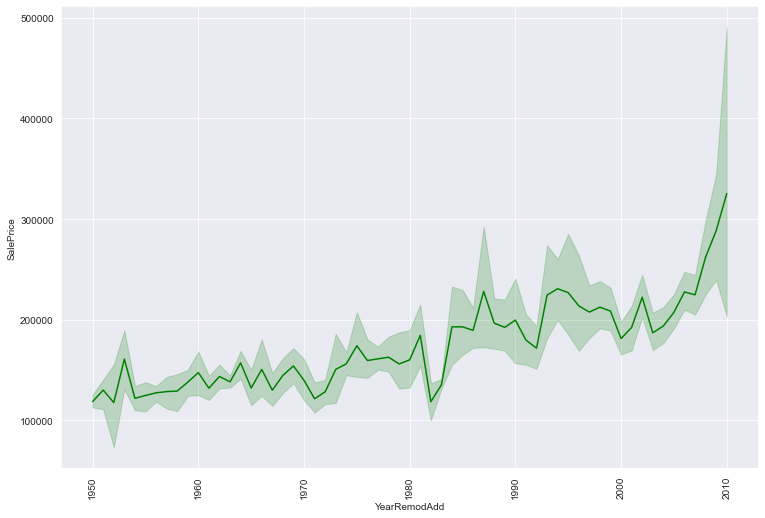

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#OverallQual -> reg plot
sns.regplot(x="MasVnrArea",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("MasVnrArea")
time.sleep(1)
# YearRemodAdd - > time-series plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#create time series plot
sns.lineplot(x = 'YearRemodAdd',
              y= 'SalePrice',
              linestyle = 'solid',
             data = house,
             color = 'g'
             )
plt.xticks(rotation = 90)
plt.show()


# Observation
- sales price increase as the remodelling is done each year.
- Sales price and  Masonry veneer area share a positive relationship.This does not ndicate causation.But, there a positive trend between the two variables.

## ----------------------------------------------- Third summary stat ----------------------------------------------

In [32]:
#exploring the next set of columns
next_10_3 = house.iloc[:, 30:41]

In [33]:
#categorical ecords 
next_10_3.describe(include = 'object')

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
count      1138     1138         1137         1138         1137    1168   
unique        4        4            4            6            6       6   
top          TA       TA           No          Unf          Unf    GasA   
freq        517     1041          756          345         1002    1143   

       HeatingQC  
count       1168  
unique         5  
top           Ex  
freq         585

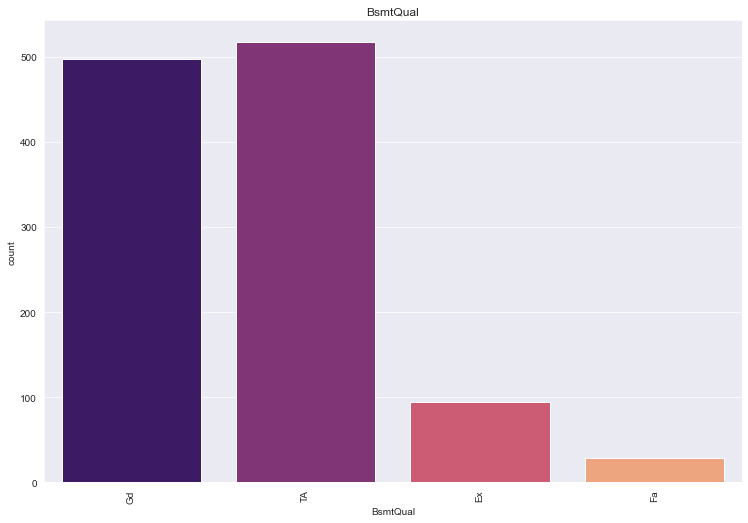

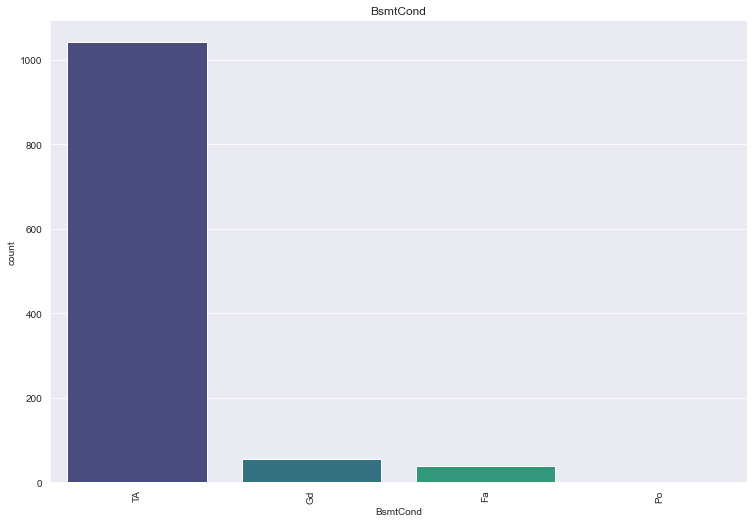

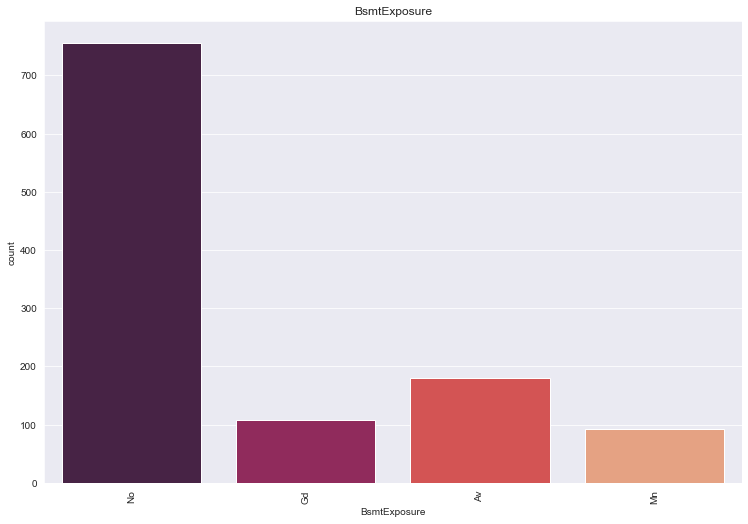

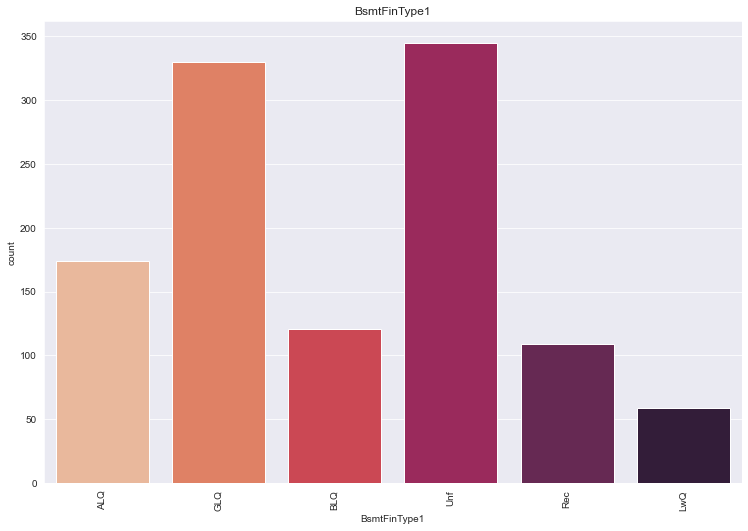

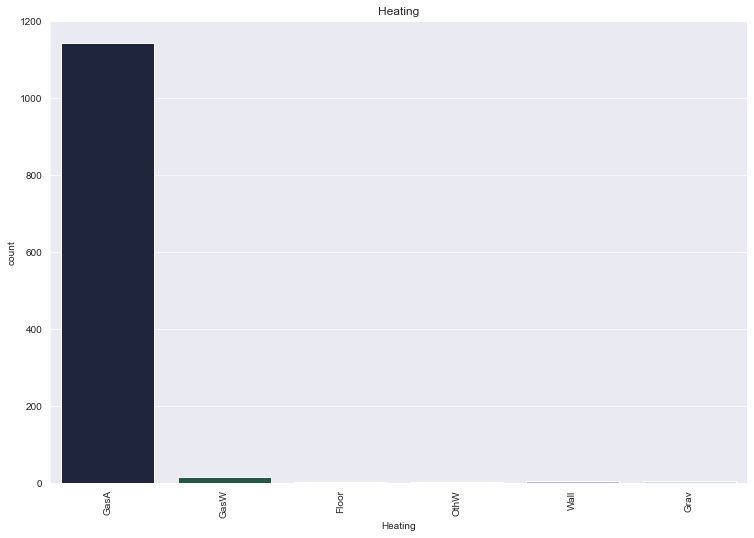

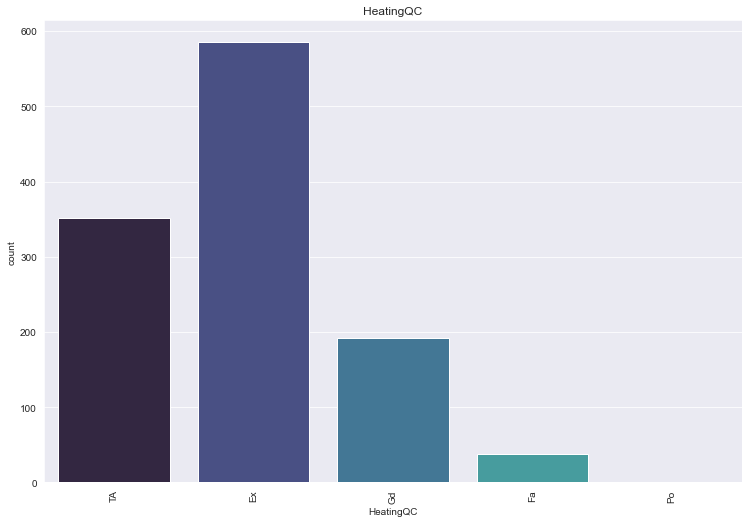

In [34]:
# BsmtQual -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='BsmtQual', 
    data = house,
    palette = 'magma'
).set_title('BsmtQual')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#BsmtCond -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='BsmtCond',
    data = house,
    palette = 'viridis'
).set_title('BsmtCond')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)


# BsmtExposure -plot a bar chart
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='BsmtExposure', 
    data = house,
    palette = 'rocket'
).set_title('BsmtExposure')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# BsmtFinType1 -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='BsmtFinType1', 
    data = house,
    palette = 'rocket_r'
).set_title('BsmtFinType1')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#Heating -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Heating', 
    data = house,
    palette = 'cubehelix'
).set_title('Heating')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#HeatingQC -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='HeatingQC', 
    data = house,
    palette = 'mako'
).set_title('HeatingQC')
plt.xticks(rotation = 90)
plt.show()



###### Observations
- The BsmtQual have 1138 records with 4 uniques values and 'TA' is the topmost value with a frequency of 517
- The BsmtCond have 1138 records with 4 uniques values and 'TA' is the topmost value with a frequency of 1041
- The BsmtExposure have 1137 records with 4 uniques values and 'No' is the topmost value with a frequency of 756
- The BsmtFinType1 have 1138 records with 6 uniques values and 'Unf' is the topmost value with a frequency of 345
- The BsmtFinType2 have 1137 records with 6 uniques values and 'Unf' is the topmost value with a frequency of 1002
- The heating have 1168 records with 6 uniques values and 'GasA' is the topmost value with a frequency of 1002
- The HeatingQC have have 1168 records with 5 uniques values and 'Ex' is the topmost value with a frequency of 585

##### Overall, the null values in the dataset are insignificant and they can be handled using null value replacement methods


### numerical analysis

In [35]:
# numerical descriptive analytics 
next_10_3.describe()

BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF
count  1168.000000  1168.000000  1168.000000  1168.000000
mean    444.726027    46.647260   569.721747  1061.095034
std     462.664785   163.520016   449.375525   442.272249
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000   216.000000   799.000000
50%     385.500000     0.000000   474.000000  1005.500000
75%     714.500000     0.000000   816.000000  1291.500000
max    5644.000000  1474.000000  2336.000000  6110.000000

In [36]:
# finding the skewness
print("Skewness Analysis")
print("BsmtFinSF1 : " +find_left_right(444.726027,385.500000,462.664785))
print("BsmtFinSF2 : " +find_left_right(46.647260,0.000000,163.520016))
print("BsmtUnfSF : " + find_left_right(569.721747,474.000000,449.375525))
print("TotalBsmtSF : " +find_left_right(1061.095034,1005.500000,442.272249))

Skewness Analysis
BsmtFinSF1 : 0.3840319962972759 is not skewed
BsmtFinSF2 : 0.8558082577487027 is not skewed
BsmtUnfSF : 0.6390317785998696 is not skewed
TotalBsmtSF : 0.37710957985066756 is not skewed


## Bivariate analysis

Text(0.5, 1.0, 'BsmtUnfSF')

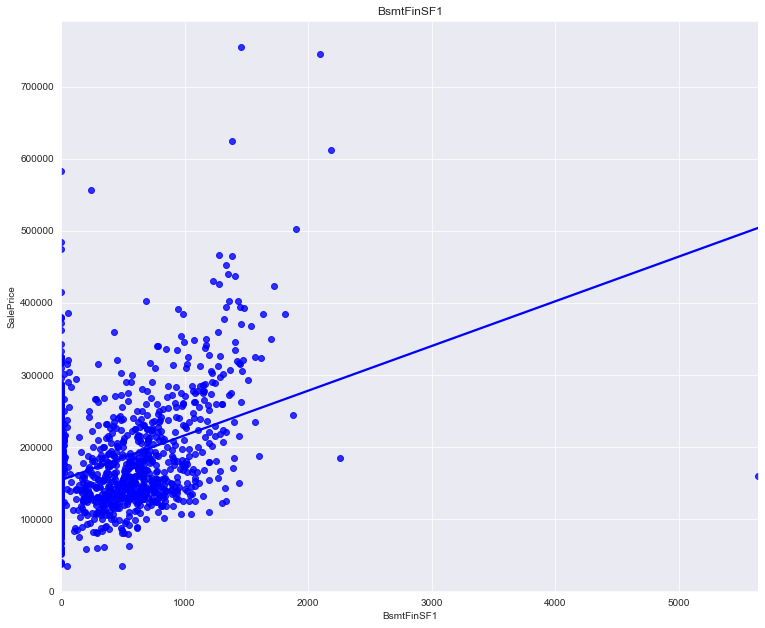

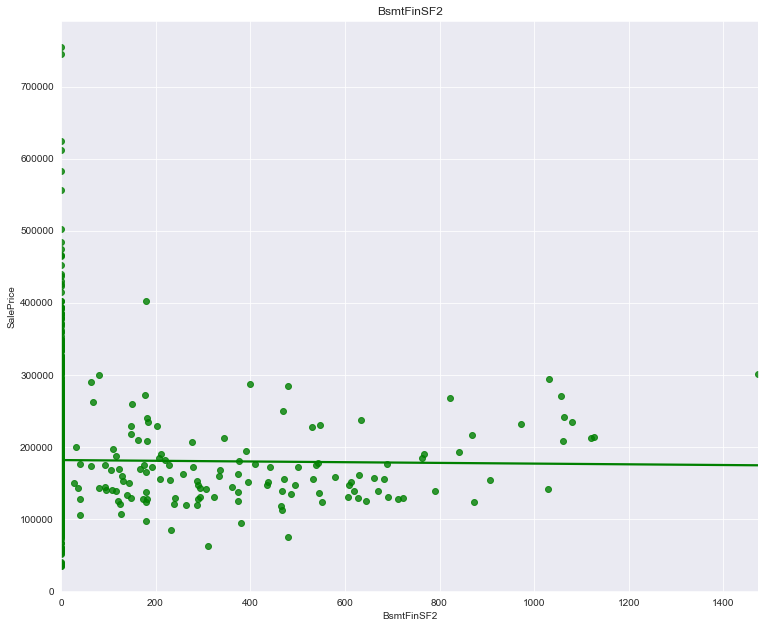

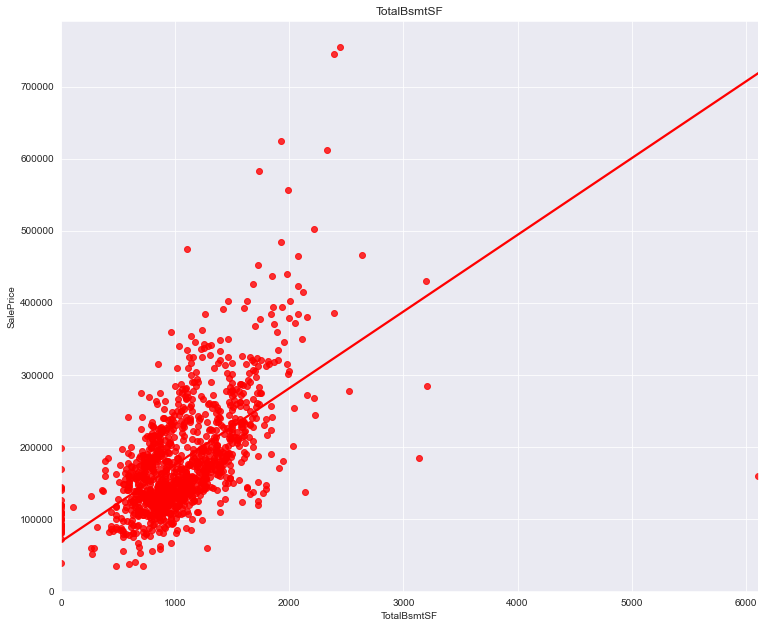

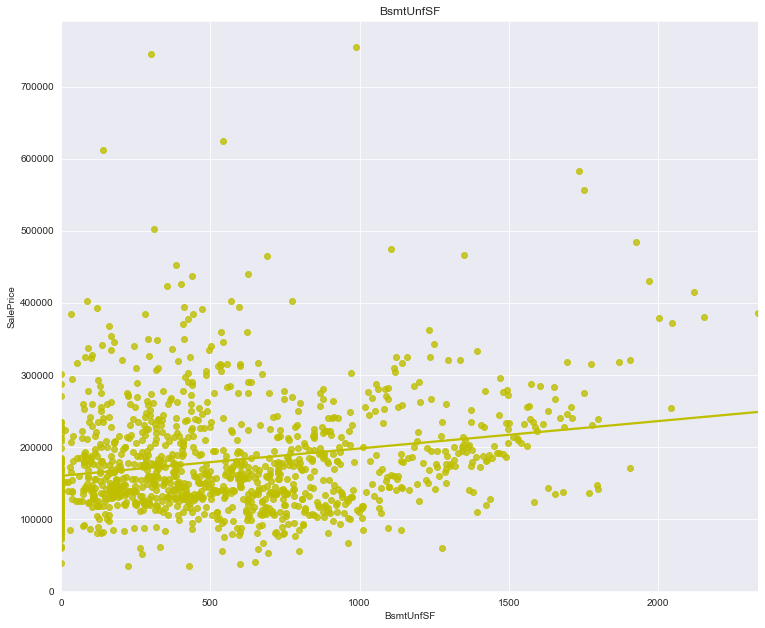

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BsmtFinSF1 -> reg plot
sns.regplot(x="BsmtFinSF1",
            y="SalePrice",
           data = house,
           color = 'b',
            ci= None
            ).set_title("BsmtFinSF1")
time.sleep(1)

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BsmtFinSF2 -> reg plot
sns.regplot(x="BsmtFinSF2",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("BsmtFinSF2")
time.sleep(1)


#TotalBsmtSF -> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
sns.regplot(x="TotalBsmtSF",
            y="SalePrice",
           data = house,
           color = 'r',
            ci= None
            ).set_title("TotalBsmtSF")
time.sleep(1)


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BsmtUnfSF -> reg plot
sns.regplot(x="BsmtUnfSF",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("BsmtUnfSF")



### Observations
- BsmtFinSF1: Type 1 finished square feet, positive trend between sales price and bsmtfinsf1
- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtUnfSF: Unfinished square feet of basement area, positive trend between sales price and BsmtUnfSF
- TotalBsmtSF: Total square feet of basement area positive linear trend between sales price and totalbsmtUnfsF
- Overall, the columns have limited skewness, if needed it can be removed using z-score or IQR method


## ----------------------------------------------- Third summary stat ----------------------------------------------

In [38]:
# analysing the next set of records 
next_10_4 = house.iloc[:, 41:50]

### categorical values

In [39]:
next_10_4.describe(include='object')

CentralAir Electrical
count        1168       1168
unique          2          5
top             Y      SBrkr
freq         1090       1070

### Univariate analysis

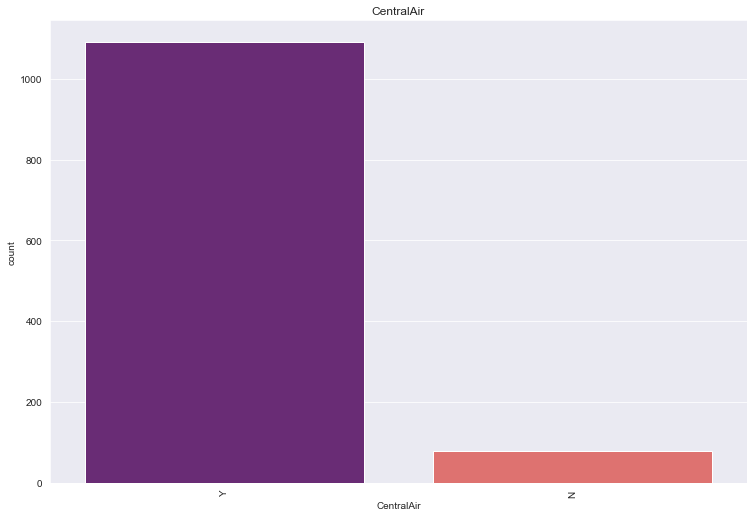

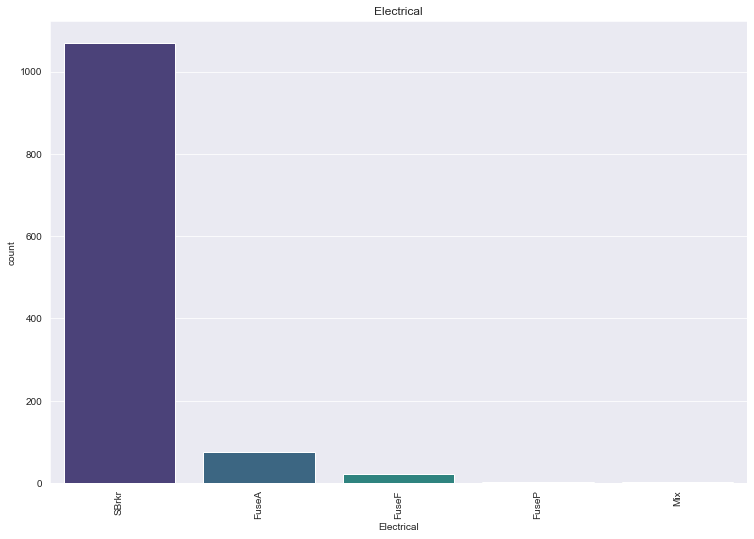

In [40]:
# CentralAir -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='CentralAir', 
    data = house,
    palette = 'magma'
).set_title('CentralAir')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Electrical-plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Electrical',
    data = house,
    palette = 'viridis'
).set_title('Electrical')
plt.xticks(rotation = 90)
plt.show()

## Observations

1. The centralair column has 1168 records and 2 uniques values and y type is the topmost value with 1090 count(yes)
2. The Electrical column has 1168 records and 5 unique values, SBrkr type is the topmost value with 1070

### numerical values

In [41]:
 records = next_10_4.describe()

In [42]:
records

1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1168.000000  1168.000000   1168.000000  1168.000000   1168.000000   
mean   1169.860445   348.826199      6.380137  1525.066781      0.425514   
std     391.161983   439.696370     50.892844   528.042957      0.521615   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     892.000000     0.000000      0.000000  1143.250000      0.000000   
50%    1096.500000     0.000000      0.000000  1468.500000      0.000000   
75%    1392.000000   729.000000      0.000000  1795.000000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath  
count   1168.000000  1168.000000  
mean       0.055651     1.562500  
std        0.236699     0.551882  
min        0.000000     0.000000  
25%        0.000000     1.000000  
50%        0.000000     2.000000  
75%        0.000000     2.000000  
max        2.000000     3.000000

In [43]:
records.columns

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath'],
      dtype='object')

In [44]:
mean_list = []

for x in records.items():
    mean_list.append(x[1][1])

median_list = [x[1][5] for x in records.items()]
median_list
std_list =  [x[1][2] for x in records.items()]

In [45]:
std_list

[391.1619829105625,
 439.6963699961229,
 50.892844223191666,
 528.0429573998225,
 0.5216147985807087,
 0.23669877791156121,
 0.5518819558841416]

In [46]:
nested_mean_median_std = []
nested_mean_median_std.append(mean_list)
nested_mean_median_std.append(median_list)
nested_mean_median_std.append(std_list)

nested_mean_median_std

[[1169.8604452054794,
  348.826198630137,
  6.38013698630137,
  1525.0667808219177,
  0.425513698630137,
  0.05565068493150685,
  1.5625],
 [1096.5, 0.0, 0.0, 1468.5, 0.0, 0.0, 2.0],
 [391.1619829105625,
  439.6963699961229,
  50.892844223191666,
  528.0429573998225,
  0.5216147985807087,
  0.23669877791156121,
  0.5518819558841416]]

In [47]:
rep_list = []
for x in nested_mean_median_std:
    rep_list.append(x[0])
rep_list

[1169.8604452054794, 1096.5, 391.1619829105625]

In [48]:
   
find_left_right(rep_list[0], rep_list[1], rep_list[2])

'0.5626347785100552 is not skewed'

In [49]:

def automate_skew_ref(h, a):
    rep_list = []
    for x in h:
        rep_list.append(x[a])
        
    values = find_left_right(rep_list[0], rep_list[1], rep_list[2])
    return values

    
    

In [50]:
print(automate_skew_ref(nested_mean_median_std, 0))
print(automate_skew_ref(nested_mean_median_std, 1))
print(automate_skew_ref(nested_mean_median_std, 2))
print(automate_skew_ref(nested_mean_median_std, 3))
print(automate_skew_ref(nested_mean_median_std, 4))
print(automate_skew_ref(nested_mean_median_std, 5))
print(automate_skew_ref(nested_mean_median_std, 6))
    

0.5626347785100552 is not skewed
2.3800028094378822 is not skewed
0.3760923809831383 is not skewed
0.32137601702215274 is not skewed
2.4472869622637705 is not skewed
0.7053355165902021 is not skewed
-2.378225970257193 is not skewed


## Bivariate analysis

Text(0.5, 1.0, 'FullBath')

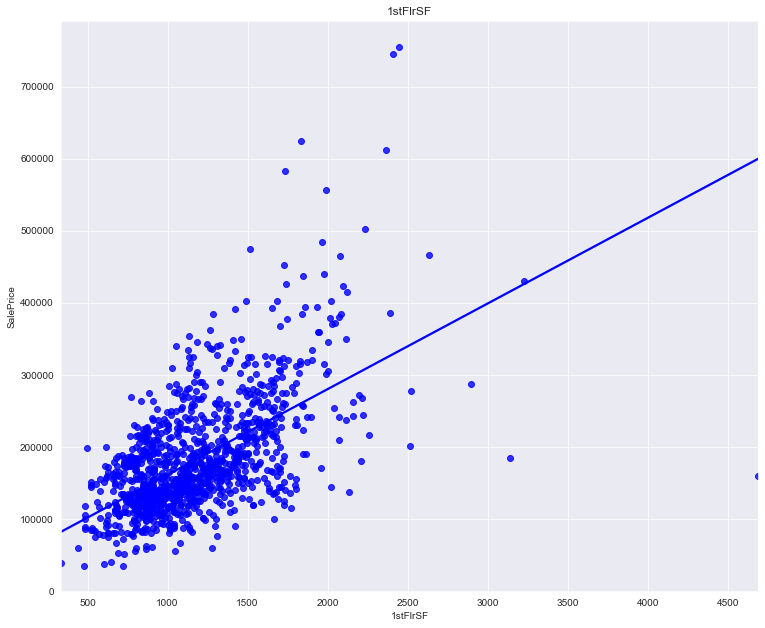

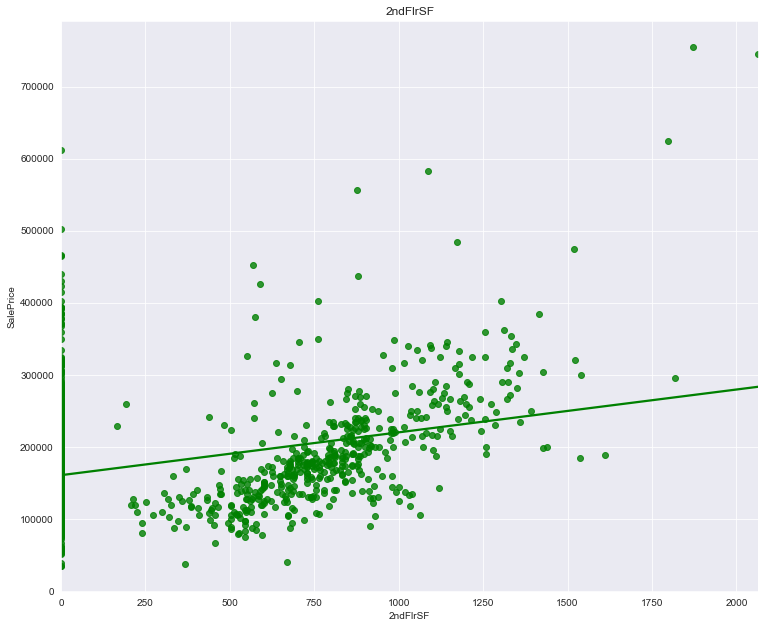

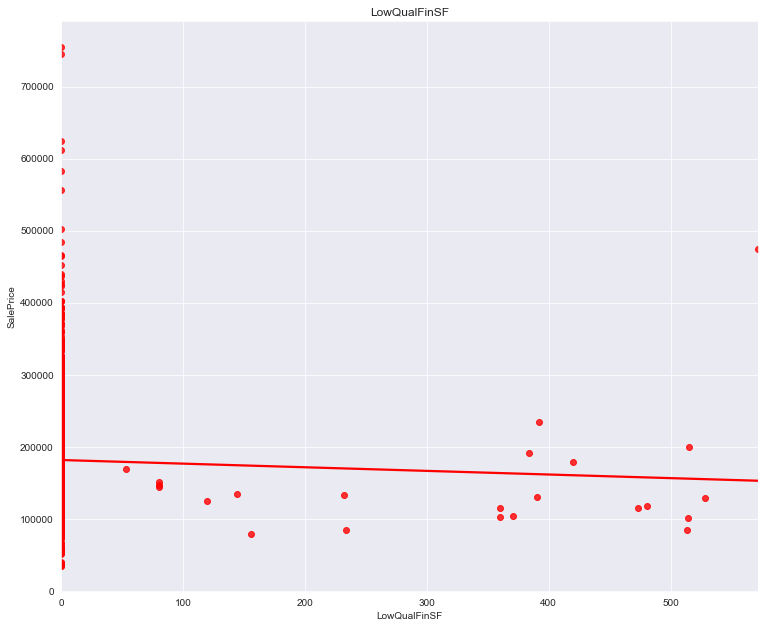

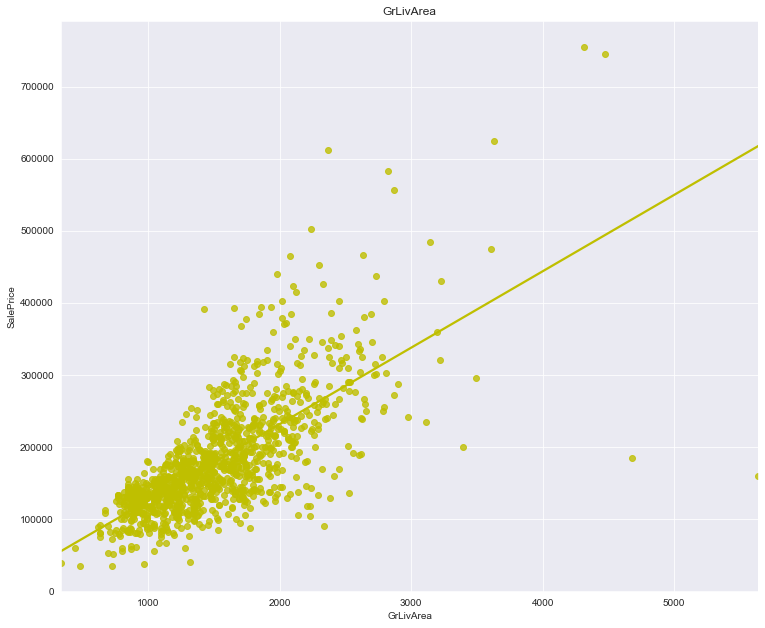

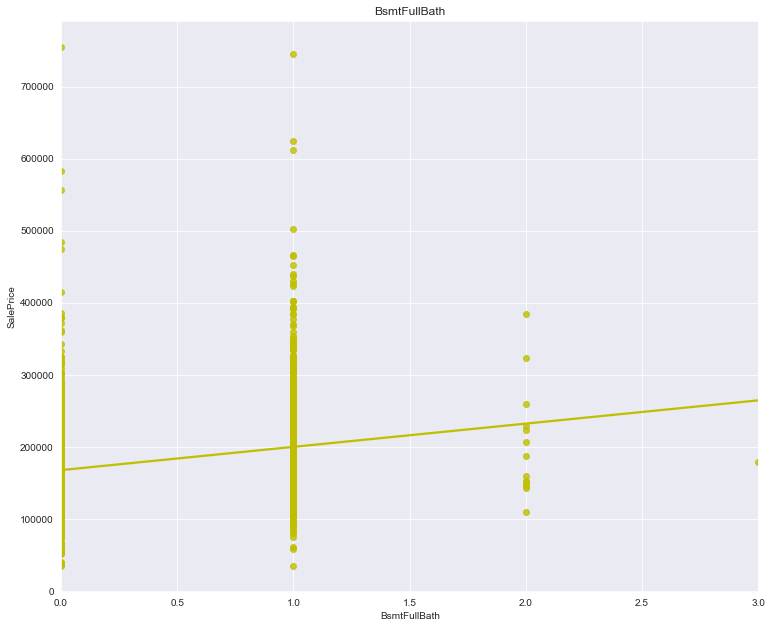

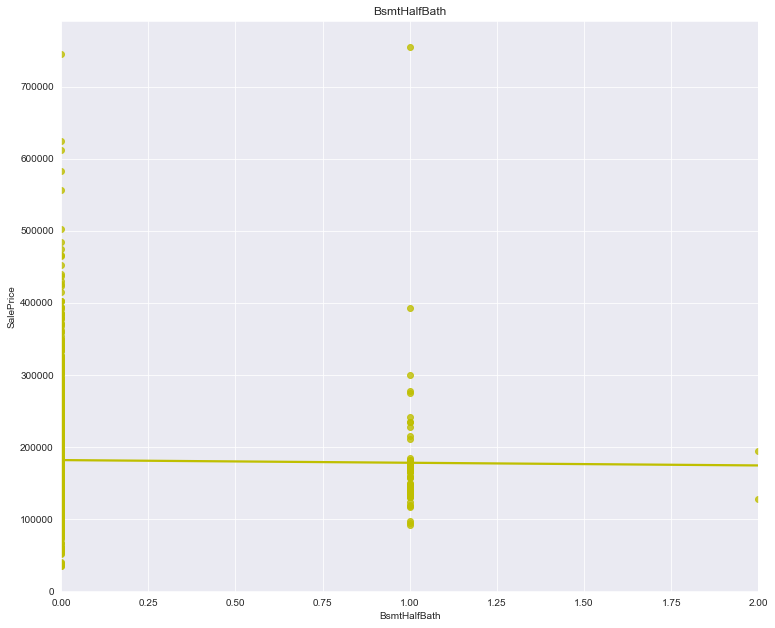

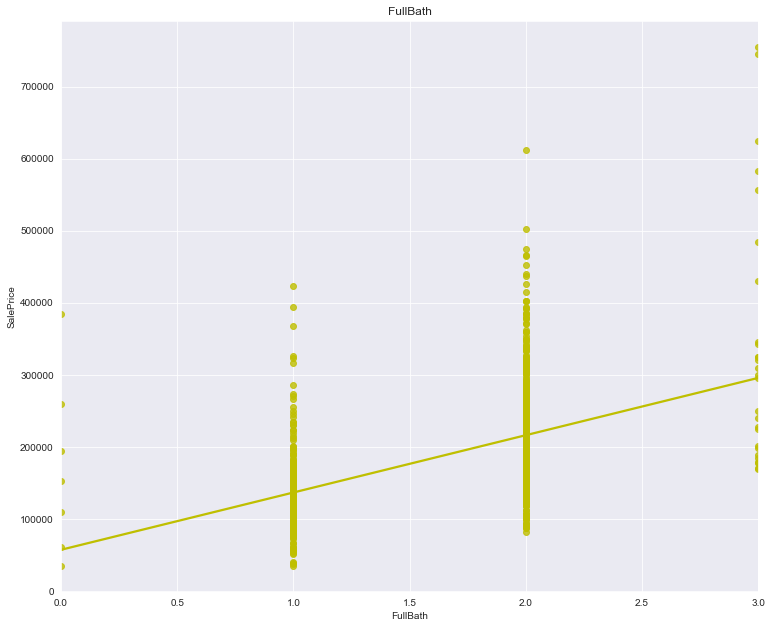

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#1stFlrSF -> reg plot
sns.regplot(x="1stFlrSF",
            y="SalePrice",
           data = house,
           color = 'b',
            ci= None
            ).set_title("1stFlrSF")
time.sleep(1)

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#2ndFlrSF -> reg plot
sns.regplot(x="2ndFlrSF",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("2ndFlrSF")
time.sleep(1)


#LowQualFinSF -> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
sns.regplot(x="LowQualFinSF",
            y="SalePrice",
           data = house,
           color = 'r',
            ci= None
            ).set_title("LowQualFinSF")
time.sleep(1)


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#GrLivArea -> reg plot
sns.regplot(x="GrLivArea",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("GrLivArea")


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BsmtFullBath -> reg plot
sns.regplot(x="BsmtFullBath",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("BsmtFullBath")

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BsmtHalfBath -> reg plot
sns.regplot(x="BsmtHalfBath",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("BsmtHalfBath")

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#FullBath -> reg plot
sns.regplot(x="FullBath",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("FullBath")


## observations

- Some columns are skewed and rest are symmetric. If Skewness should be removed z-score or IQR method will be used.
- Most of the numerical column show a trend. Except for BSMTHALF BATH, LOWQUALFINSF.

## ----------------------------------------------- Fourth summary stat ----------------------------------------------

In [52]:
# analysing the next set of records
next_10_5 = house.iloc[:, 51:60]
#categorical variables 
next_10_5.describe(include= 'object')

KitchenQual Functional FireplaceQu GarageType
count         1168       1168         617       1104
unique           4          7           5          6
top             TA        Typ          Gd     Attchd
freq           578       1085         301        691

### Univariate analysis

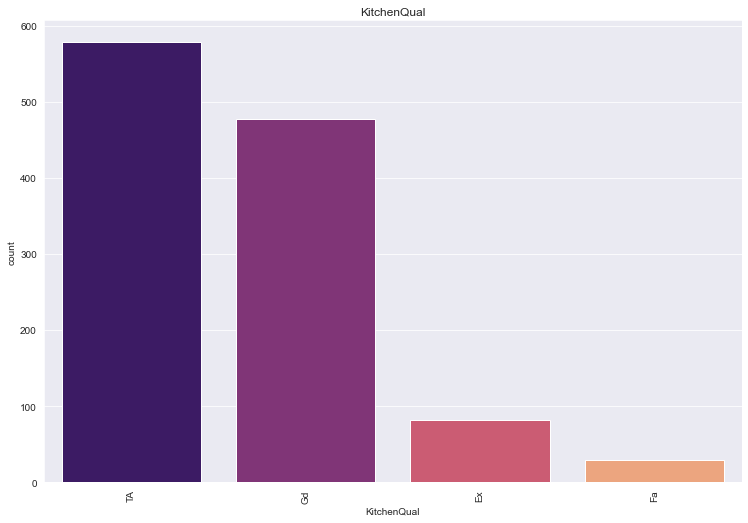

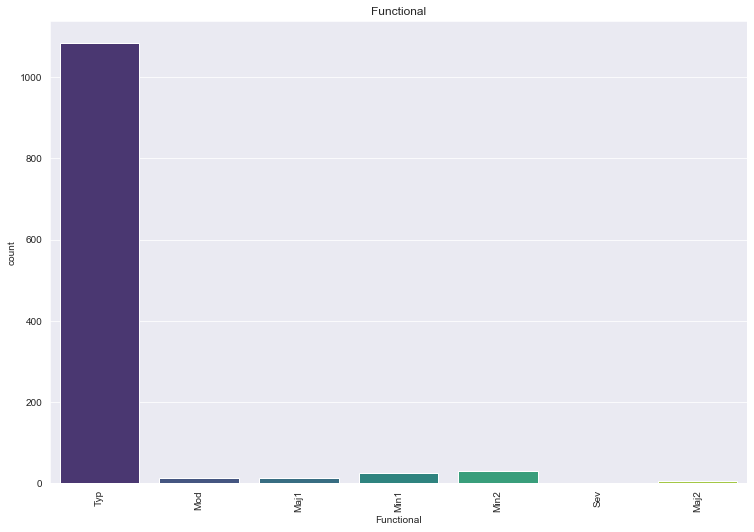

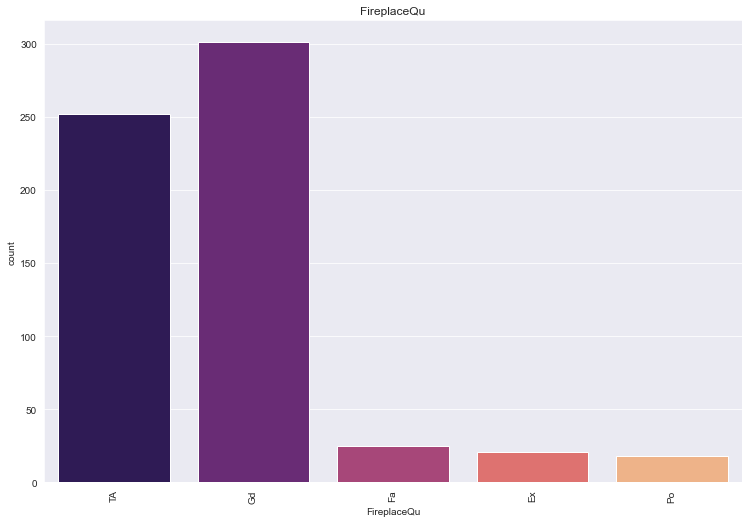

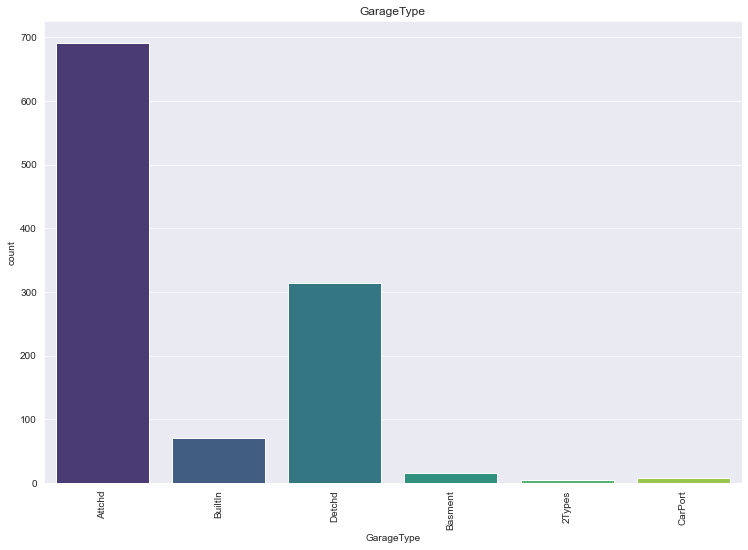

In [53]:
# KitchenQual -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='KitchenQual', 
    data = house,
    palette = 'magma'
).set_title('KitchenQual')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Functional-plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Functional',
    data = house,
    palette = 'viridis'
).set_title('Functional')
plt.xticks(rotation = 90)
plt.show()

# FireplaceQu -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='FireplaceQu', 
    data = house,
    palette = 'magma'
).set_title('FireplaceQu')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# GarageType-plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='GarageType',
    data = house,
    palette = 'viridis'
).set_title('GarageType')
plt.xticks(rotation = 90)
plt.show()

## Observations:

- There are 2 columns with 1168 records 
    - The kitchenqual have 4 unique values and TA is the topmost value with a freq of 578
    - the funtional column have 7 unique values and Typ is the topmost value with a freq of 1085
- The frieplacequ have 617 records and 5 unique values and Gd is the topmost value with a freq of 301
- The Garage type have 1104 records with 6 unique values and Attchd is the topmost value with a freq of 691

### Nurmerical

In [54]:
#numerical summart statistics
next_10_5.describe()

BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt
count   1168.000000   1168.000000   1168.000000  1168.000000  1104.000000
mean       2.884418      1.045377      6.542808     0.617295  1978.193841
std        0.817229      0.216292      1.598484     0.650575    24.890704
min        0.000000      0.000000      2.000000     0.000000  1900.000000
25%        2.000000      1.000000      5.000000     0.000000  1961.000000
50%        3.000000      1.000000      6.000000     1.000000  1980.000000
75%        3.000000      1.000000      7.000000     1.000000  2002.000000
max        8.000000      3.000000     14.000000     3.000000  2010.000000

### Finding skewness

In [55]:
rec = next_10_5.describe()
mean_list = [x[1][1] for x in rec.items()]
median_list = [x[1][5] for x in rec.items()]
std_list =  [x[1][2] for x in rec.items()]

In [56]:
nested_mean_median_std = []
nested_mean_median_std.append(mean_list)
nested_mean_median_std.append(median_list)
nested_mean_median_std.append(std_list)

In [57]:
print("BedroomAbvGr : "+automate_skew_ref(nested_mean_median_std, 0))
print("KitchenAbvGr : "+automate_skew_ref(nested_mean_median_std, 1))
print("TotRmsAbvGrd : "+automate_skew_ref(nested_mean_median_std, 2))
print("Fireplaces : "+automate_skew_ref(nested_mean_median_std, 3))



BedroomAbvGr : -0.42429548420802554 is not skewed
KitchenAbvGr : 0.629380289988136 is not skewed
TotRmsAbvGrd : 1.0187309559349078 is not skewed
Fireplaces : -1.7647710654014013 is not skewed


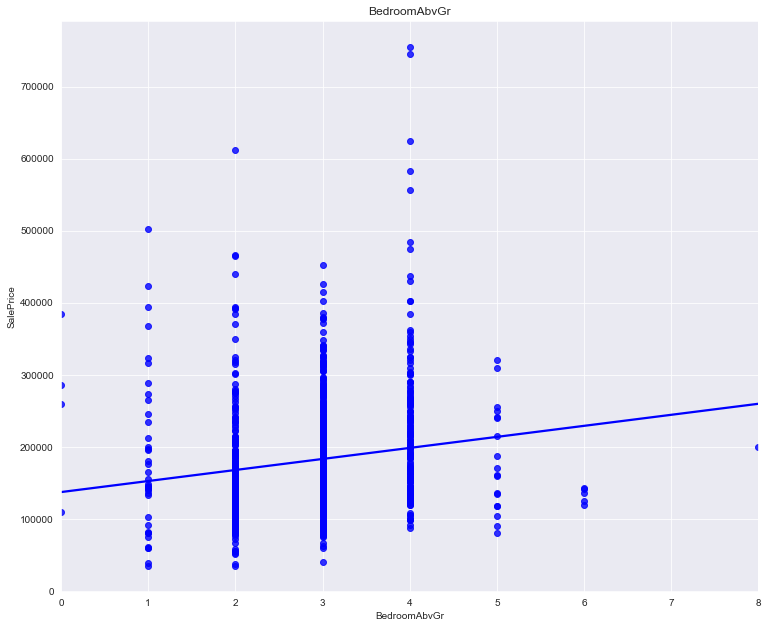

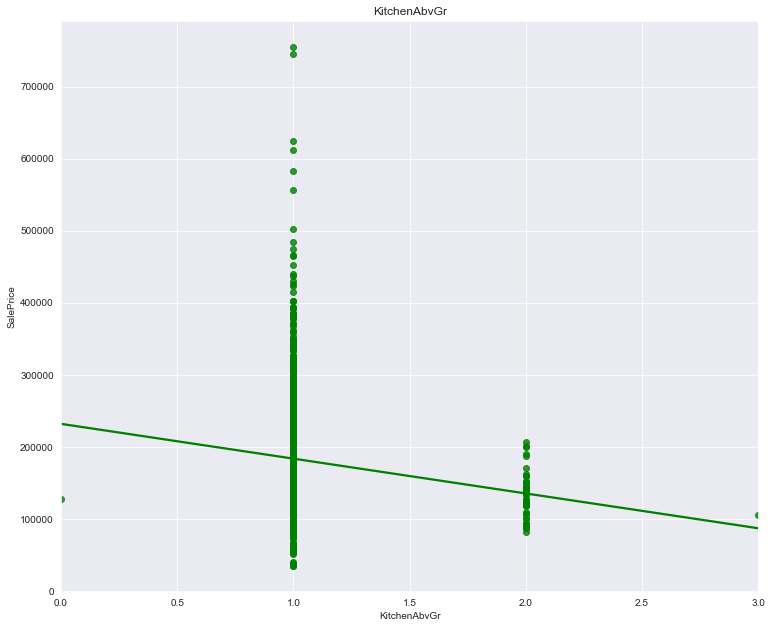

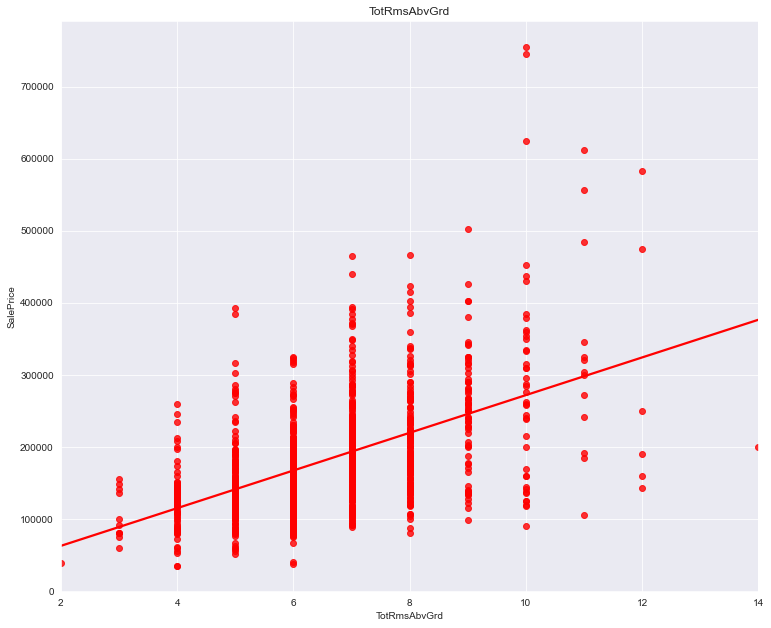

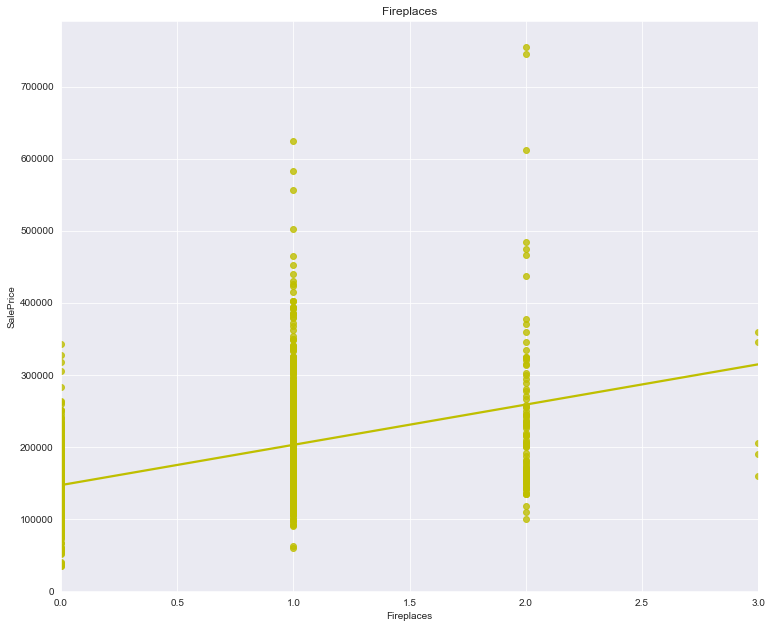

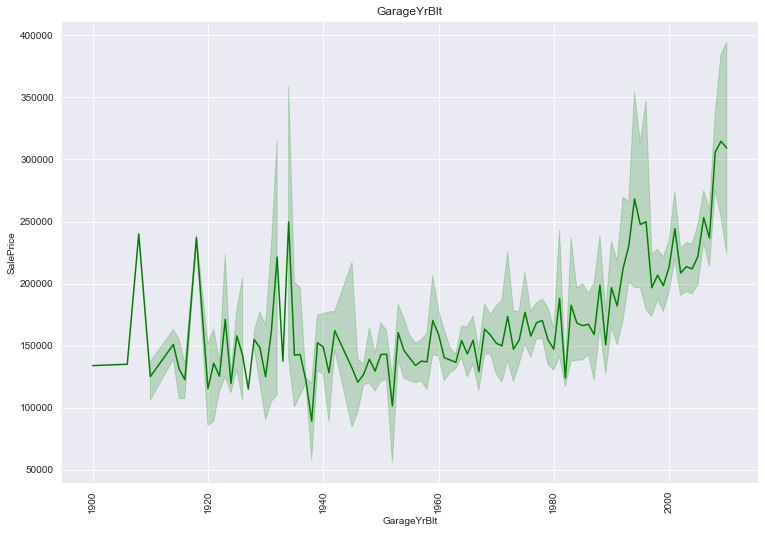

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BedroomAbvGr -> reg plot
sns.regplot(x="BedroomAbvGr",
            y="SalePrice",
           data = house,
           color = 'b',
            ci= None
            ).set_title("BedroomAbvGr")
time.sleep(1)

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#KitchenAbvGr  -> reg plot
sns.regplot(x="KitchenAbvGr",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("KitchenAbvGr")
time.sleep(1)


#TotRmsAbvGrd-> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
sns.regplot(x="TotRmsAbvGrd",
            y="SalePrice",
           data = house,
           color = 'r',
            ci= None
            ).set_title("TotRmsAbvGrd")
time.sleep(1)


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#Fireplaces -> reg plot
sns.regplot(x="Fireplaces",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("Fireplaces")


# GarageYrBlt - > time-series plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#create time series plot
sns.lineplot(x = 'GarageYrBlt',
              y= 'SalePrice',
              linestyle = 'solid',
             data = house,
             color = 'g'
             ).set_title("GarageYrBlt")
plt.xticks(rotation = 90)
plt.show()



## Observation:  

- All the columns in this set show a linear trend. There is a positive trend between price and each column in this set.
- Except for kitchenabrgr showing a downward trend. 
- As the garage bulit year increases the sales price increases.


## ----------------------------------------------- Sixth summary stat ----------------------------------------------

In [59]:
# analysing the next set of records
next_10_6 = house.iloc[:, 61:70]

#### categorical analysis

In [60]:
#categorical summary stat
next_10_6.describe(include ='object')

GarageQual GarageCond PavedDrive
count        1104       1104       1168
unique          5          5          3
top            TA         TA          Y
freq         1050       1061       1071

### Univariate analysis

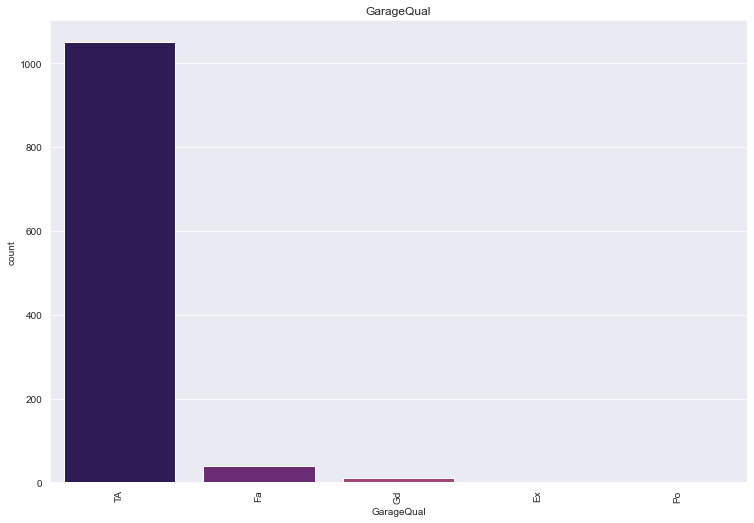

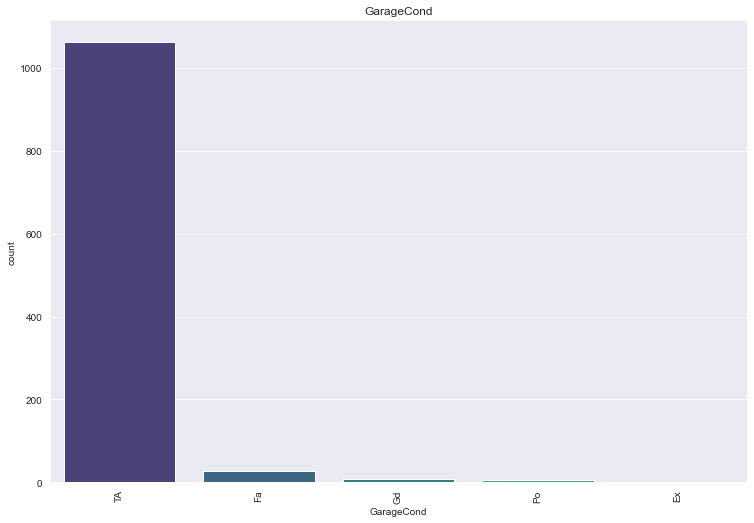

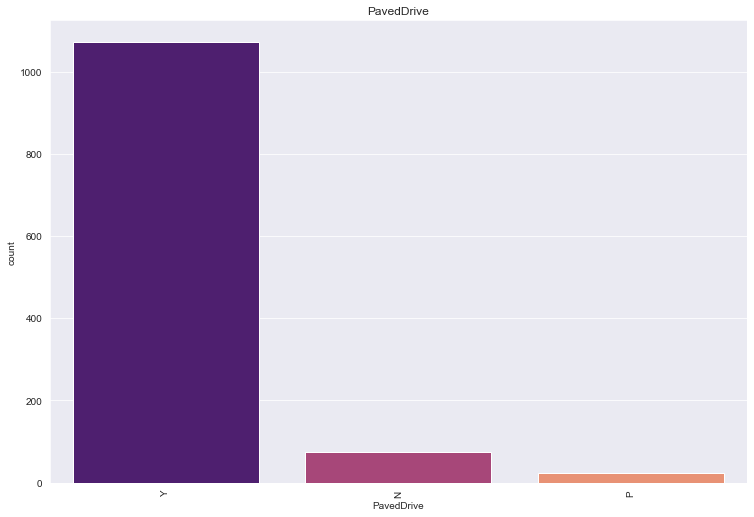

In [61]:
# GarageQual -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='GarageQual', 
    data = house,
    palette = 'magma'
).set_title('GarageQual')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# GarageCond-plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='GarageCond',
    data = house,
    palette = 'viridis'
).set_title('GarageCond')
plt.xticks(rotation = 90)
plt.show()

# PavedDrive -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='PavedDrive', 
    data = house,
    palette = 'magma'
).set_title('PavedDrive')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

### Observation:

- There are 2 columns with 1104 values 
   - GarageQual have 5 unique values and  TA as the topmost value with a freq of 1050
   - GarageCond have 5 unique values and TA as the topmost value with a freq of  1061
   - PavedDrive have 3 unique values and Y(yes) as the topmost value with a freq of 1071
  
    

In [62]:
# numerical variable analysis
next_10_6.describe()

GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  
count  1168.000000  
mean      3.639555  
std      29.088867  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max     508.000000

In [63]:
rec = next_10_6.describe()
mean_list = [x[1][1] for x in rec.items()]
median_list = [x[1][5] for x in rec.items()]
std_list =  [x[1][2] for x in rec.items()]

In [64]:
nested_mean_median_std = []
nested_mean_median_std.append(mean_list)
nested_mean_median_std.append(median_list)
nested_mean_median_std.append(std_list)

In [65]:
next_10_6.columns

Index(['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'],
      dtype='object')

In [66]:
print("GarageCars : "+automate_skew_ref(nested_mean_median_std, 0))
print("GarageArea : "+automate_skew_ref(nested_mean_median_std, 1))


print("WoodDeckSF : "+automate_skew_ref(nested_mean_median_std, 2))
print("OpenPorchSF : "+automate_skew_ref(nested_mean_median_std, 3))
print("EnclosedPorch : "+automate_skew_ref(nested_mean_median_std, 4))
print("3SsnPorch : "+automate_skew_ref(nested_mean_median_std, 5))



GarageCars : -0.8991663007149521 is not skewed
GarageArea : -0.043916660936974924 is not skewed
WoodDeckSF : 2.2877403491540425 is not skewed
OpenPorchSF : 1.0195653964336893 is not skewed
EnclosedPorch : 1.0926577459425275 is not skewed
3SsnPorch : 0.37535543988931125 is not skewed


## Bivariate analysis

Text(0.5, 1.0, '3SsnPorch')

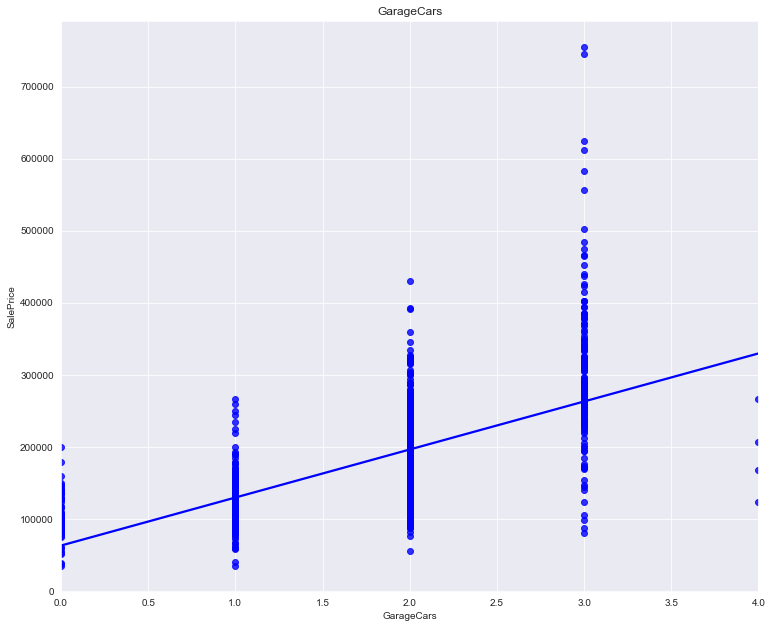

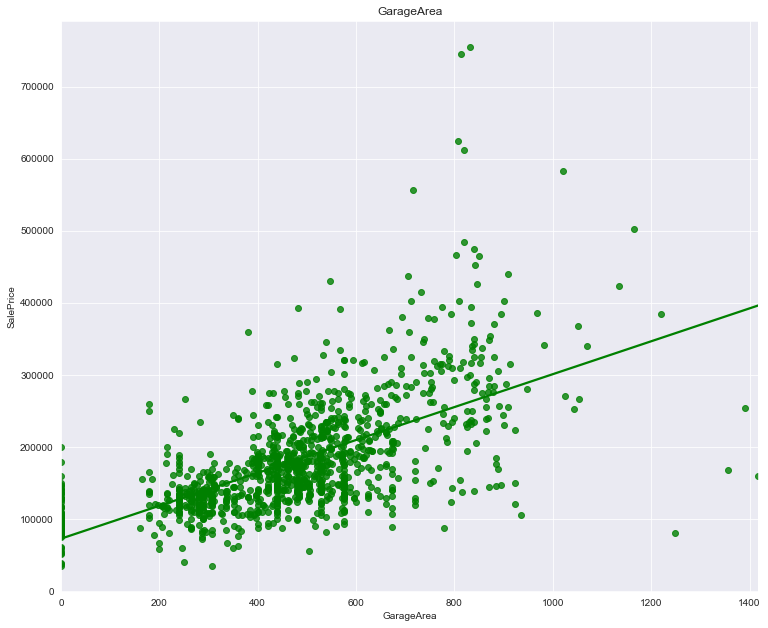

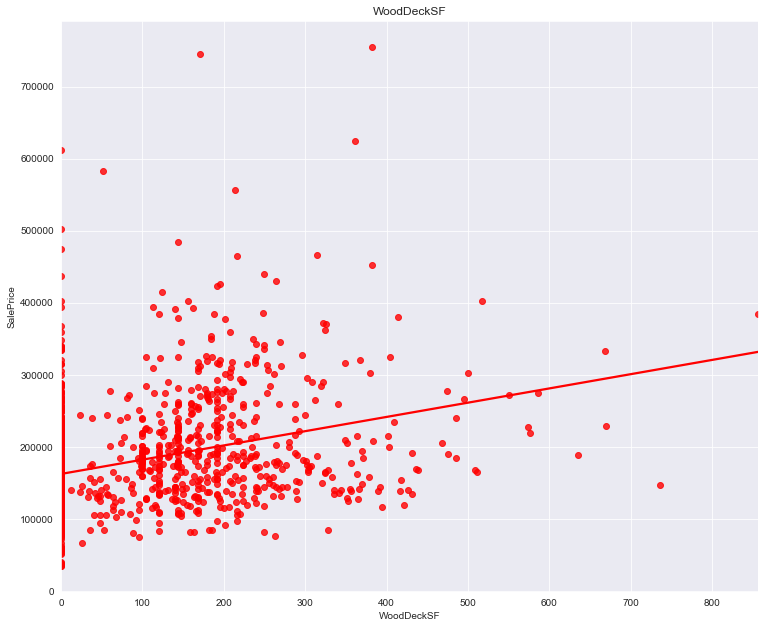

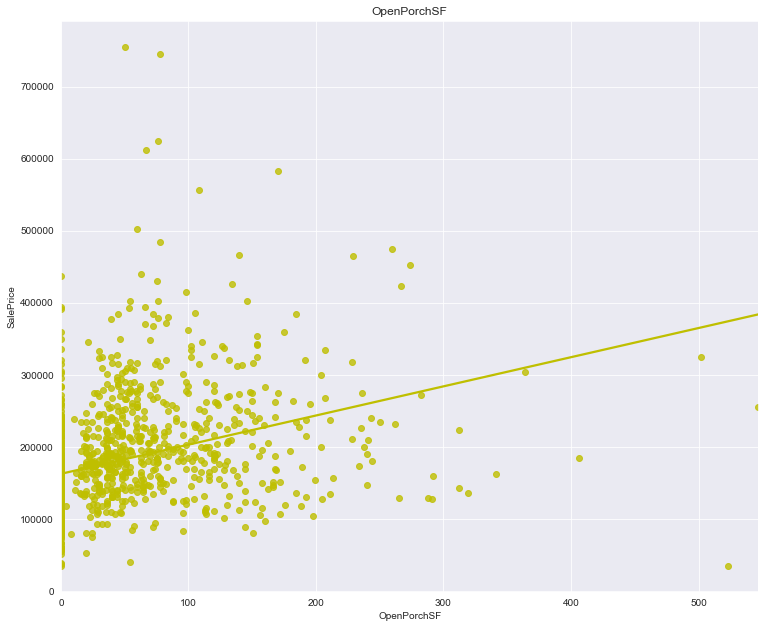

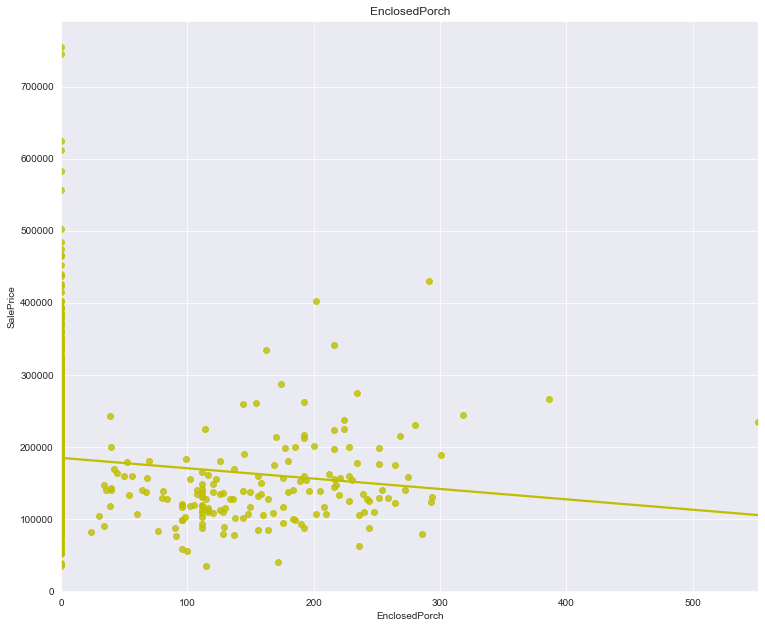

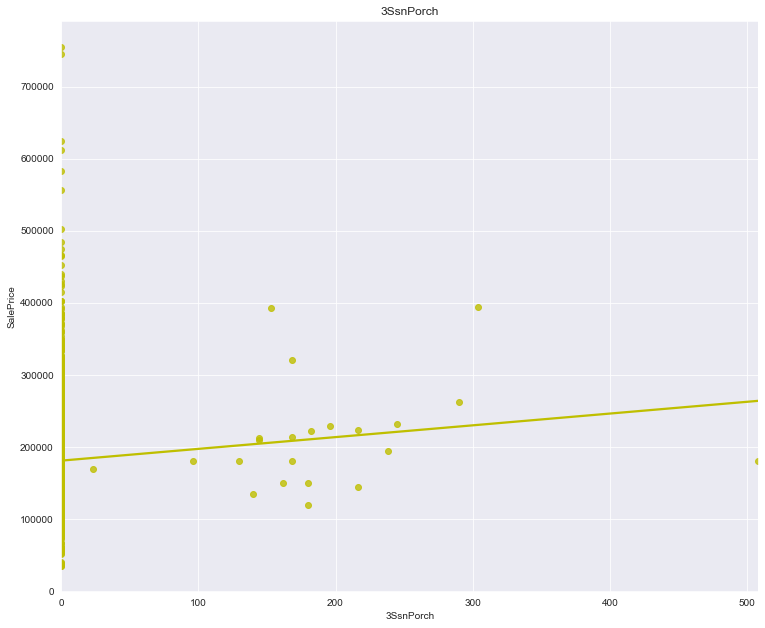

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#GarageCars -> reg plot
sns.regplot(x="GarageCars",
            y="SalePrice",
           data = house,
           color = 'b',
            ci= None
            ).set_title("GarageCars")
time.sleep(1)

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#GarageArea  -> reg plot
sns.regplot(x="GarageArea",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("GarageArea")
time.sleep(1)


#WoodDeckSF-> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
sns.regplot(x="WoodDeckSF",
            y="SalePrice",
           data = house,
           color = 'r',
            ci= None
            ).set_title("WoodDeckSF")
time.sleep(1)


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#OpenPorchSF -> reg plot
sns.regplot(x="OpenPorchSF",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("OpenPorchSF")

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#EnclosedPorch -> reg plot
sns.regplot(x="EnclosedPorch",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("EnclosedPorch")

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#3SsnPorch -> reg plot
sns.regplot(x="3SsnPorch",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("3SsnPorch")


### Observation

- Garagecars and sales price have a positive trend
- Garagearea and sales price have a positive trend
- wooddesksf and sales price have a positive trend
- openporch and sales price have a positive trend


## ----------------------------------------------- Seven summary stat ----------------------------------------------

In [68]:
# analysing the last few records
next_10_7 = house.iloc[:, 70:]

In [69]:
#categorical variables 
next_10_7.describe(include = 'object')

PoolQC  Fence MiscFeature SaleType SaleCondition
count       7    237          44     1168          1168
unique      3      4           4        9             6
top        Gd  MnPrv        Shed       WD        Normal
freq        3    129          40      999           945

### Univariate analysis

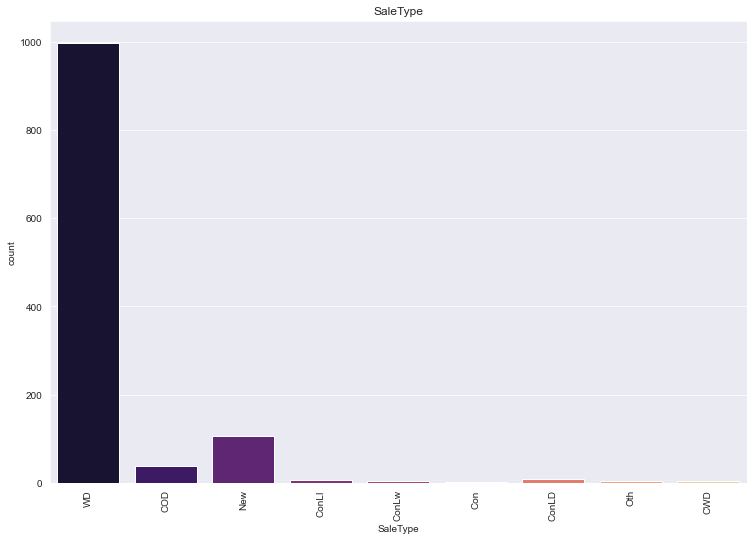

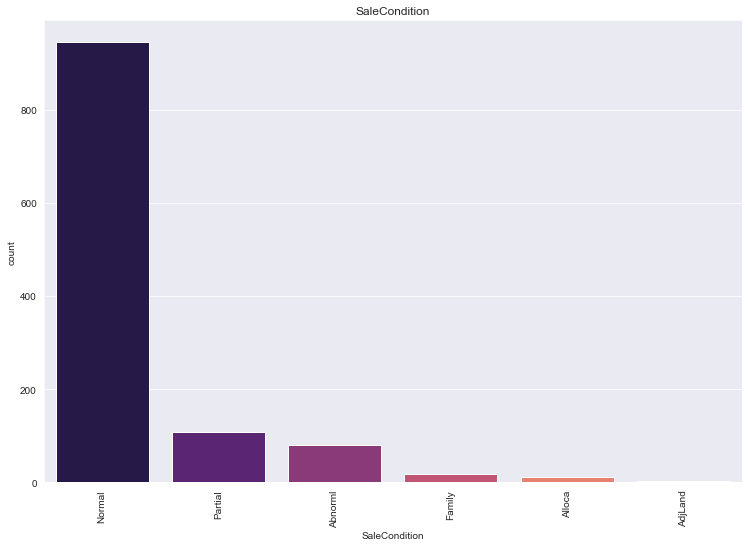

In [70]:
# SaleType -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='SaleType', 
    data = house,
    palette = 'magma'
).set_title('SaleType')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# SaleCondition -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='SaleCondition', 
    data = house,
    palette = 'magma'
).set_title('SaleCondition')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)


### Observations:

 -  The poolQC has 7 values
 -  The fence has 237 values
 -  Miscfeature has 44 values 
    - Due to inadequate data the above columns can be dropped
 - The sale type column has 1168 values with 9 unique values and WD is the topmost value with a frequency of 999
 - The salecondition has 1168 values with 6 unique values and Normal is the topmost value with a frequency of 945
    

### Numerical analysis

In [71]:
# numerical summary stat
next_10_7.describe()

ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000   
mean     15.051370     3.448630     47.315068     6.344178  2007.804795   
std      55.080816    44.896939    543.264432     2.686352     1.329738   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1168.000000  
mean   181477.005993  
std     79105.586863  
min     34900.000000  
25%    130375.000000  
50%    163995.000000  
75%    215000.000000  
max    755000.000000

In [72]:
rec = next_10_7.describe()
mean_list = [x[1][1] for x in rec.items()]
median_list = [x[1][5] for x in rec.items()]
std_list =  [x[1][2] for x in rec.items()]
# creating a nested list
nested_mean_median_std = []
nested_mean_median_std.append(mean_list)
nested_mean_median_std.append(median_list)
nested_mean_median_std.append(std_list)

#fucntion to identify distribution/skewness

print("ScreenPorch : "+automate_skew_ref(nested_mean_median_std, 0))
print("PoolArea: "+automate_skew_ref(nested_mean_median_std, 1))
print("MiscVal : "+automate_skew_ref(nested_mean_median_std, 2))
print("MoSold : "+automate_skew_ref(nested_mean_median_std, 3))
print("YrSold : "+automate_skew_ref(nested_mean_median_std, 4))
print("SalePrice : "+automate_skew_ref(nested_mean_median_std, 5))



ScreenPorch : 0.8197792482543677 is not skewed
PoolArea: 0.23043643061259464 is not skewed
MiscVal : 0.2612819780555102 is not skewed
MoSold : 0.38436297492246085 is not skewed
YrSold : -0.44039985887493277 is not skewed
SalePrice : 0.6629875342429495 is not skewed


Text(0.5, 1.0, 'MoSold')

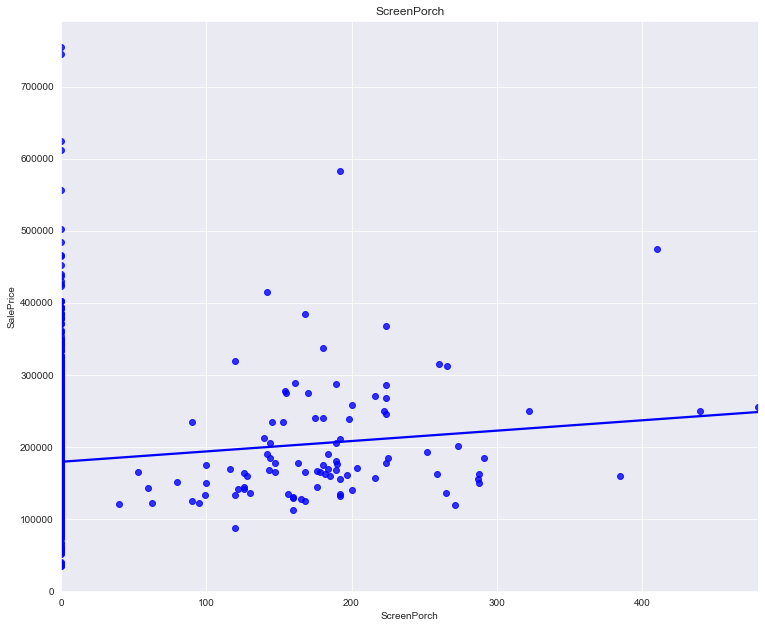

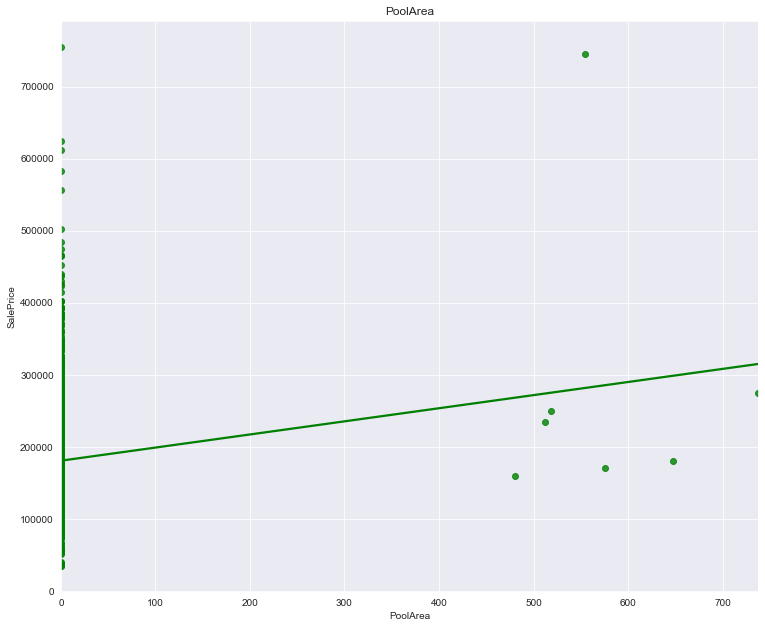

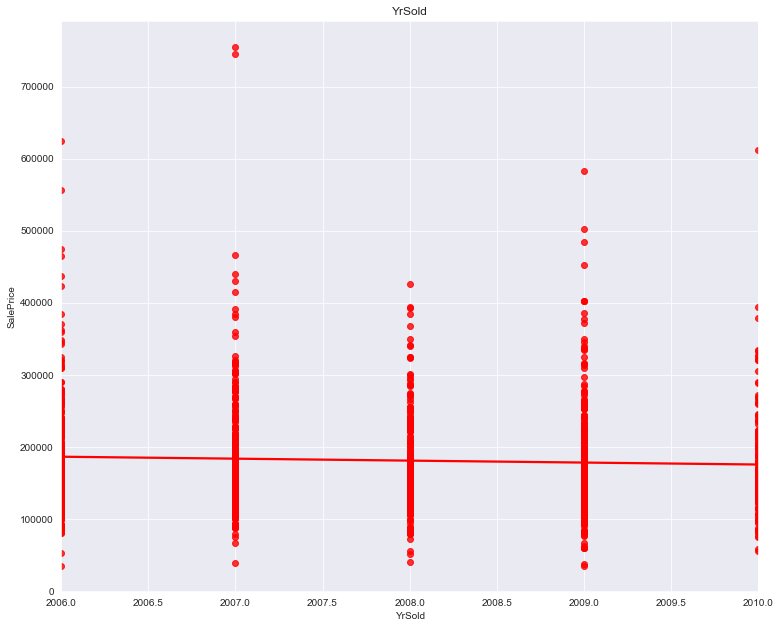

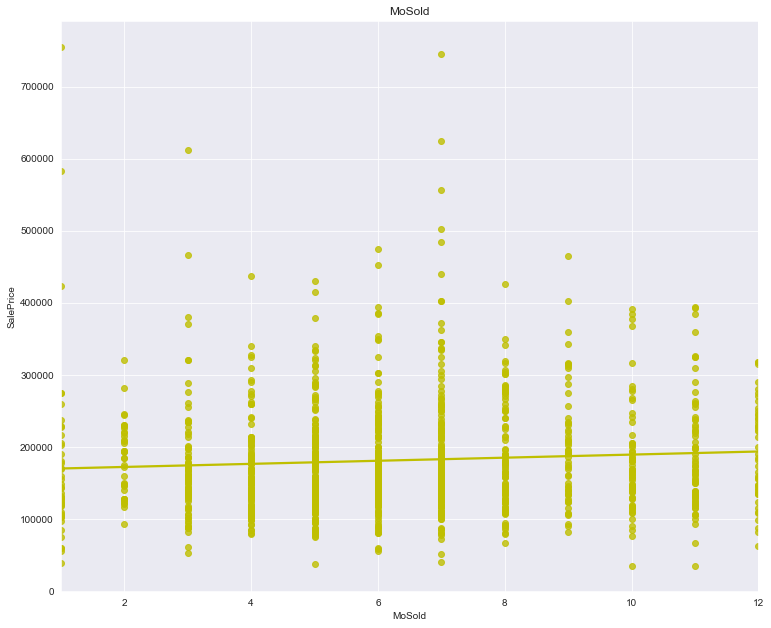

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#ScreenPorch -> reg plot
sns.regplot(x="ScreenPorch",
            y="SalePrice",
           data = house,
           color = 'b',
            ci= None
            ).set_title("ScreenPorch")
time.sleep(1)

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#PoolArea  -> reg plot
sns.regplot(x="PoolArea",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("PoolArea")
time.sleep(1)


#YrSold -> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
sns.regplot(x="YrSold",
            y="SalePrice",
           data = house,
           color = 'r',
            ci= None
            ).set_title("YrSold")
time.sleep(1)


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#MoSold -> reg plot
sns.regplot(x="MoSold",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("MoSold")



### Observation:

- there are no skewed columns in the last set of records
- some columns have a positive trend with sales price.

In [74]:
create_null_list =["Id", "Alley","Utilities", "MasVnrType", "RoofMatl", "PoolQC",
"Fence", "MiscFeature"]

In [75]:
for x in create_null_list:
    print(x , house[x].isnull().sum())
    

Id 0
Alley 1091
Utilities 0
MasVnrType 7
RoofMatl 0
PoolQC 1161
Fence 931
MiscFeature 1124


# Overall obsservations:

   - Based on the graphs and summary statistics the housing dataset has few columns that either poorly related or has inadequeate data or many only be null values.
      - columns to be droped are:
         - id
         - Alley
         - utilities
         - MasVnrType
         - RoofMatl
         - poolQC
         - fence
         - Miscfeature
  --------------------------------------------------------------------------------------------------------------       
         
 ## reason : 
 ###### We can drop the column alley, since, it has more than 50% of the records as nan   
 ###### we can drop the column utilities, since, the column contains singular value. Therefore, the prediction might become one-sided affecting the predictive capabilities of the model.
 ###### The MasVnrType has 696 "none" value and the calculated percentage is 60% of null value. Therefor the MarVnrType column can be dropped.
 ###### The RoofMatl has 1144 "CompShg" value and the calculated percentage is 97.9%. Therefore the RoofMatl column can be dropped. By dropping these columns; the model will perform effectively.
 ######  The poolQC has 7 non-null values,The fence has 237 values,Miscfeature has 44 values. Due to inadequate data the above columns can be dropped

In [76]:
to_be_droped = ['Id', 
                'Alley',
                'Utilities',
                'MasVnrType',
                'RoofMatl',
                'PoolQC',
                'Fence',
                'MiscFeature']

for x in to_be_droped:
    house = house.drop(x, axis=1)

In [77]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3Ssn

In [78]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Condition2     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  HouseStyle     1168 non-null   object 
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null   int64  
 18  RoofStyl

### exploring the categorical variables using multivariate analysis

1. Finding the relationship between identifying the type of dwelling involved and zoning classification of the sale for two street types 

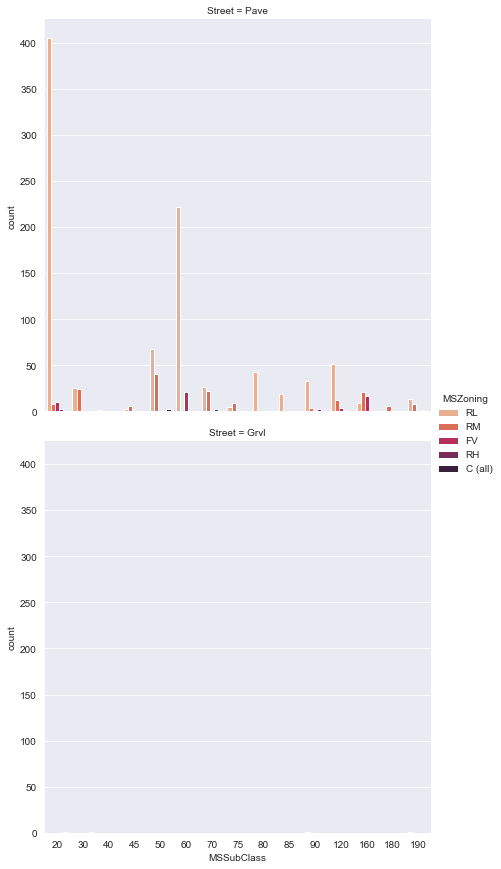

In [79]:
# catplot for analysis of categorical variables
sns.catplot(data = house,
           x="MSSubClass",
           hue = "MSZoning",
           col_wrap = 1,
           col = 'Street',
            palette = "rocket_r",
            kind="count",
            height = 6,
            aspect =1
            
            
           )

- observation:
    - The street with gravel road is not a part of the zoning area.

 2. Finding the relationship between lotshpe, landcontour and housetyle

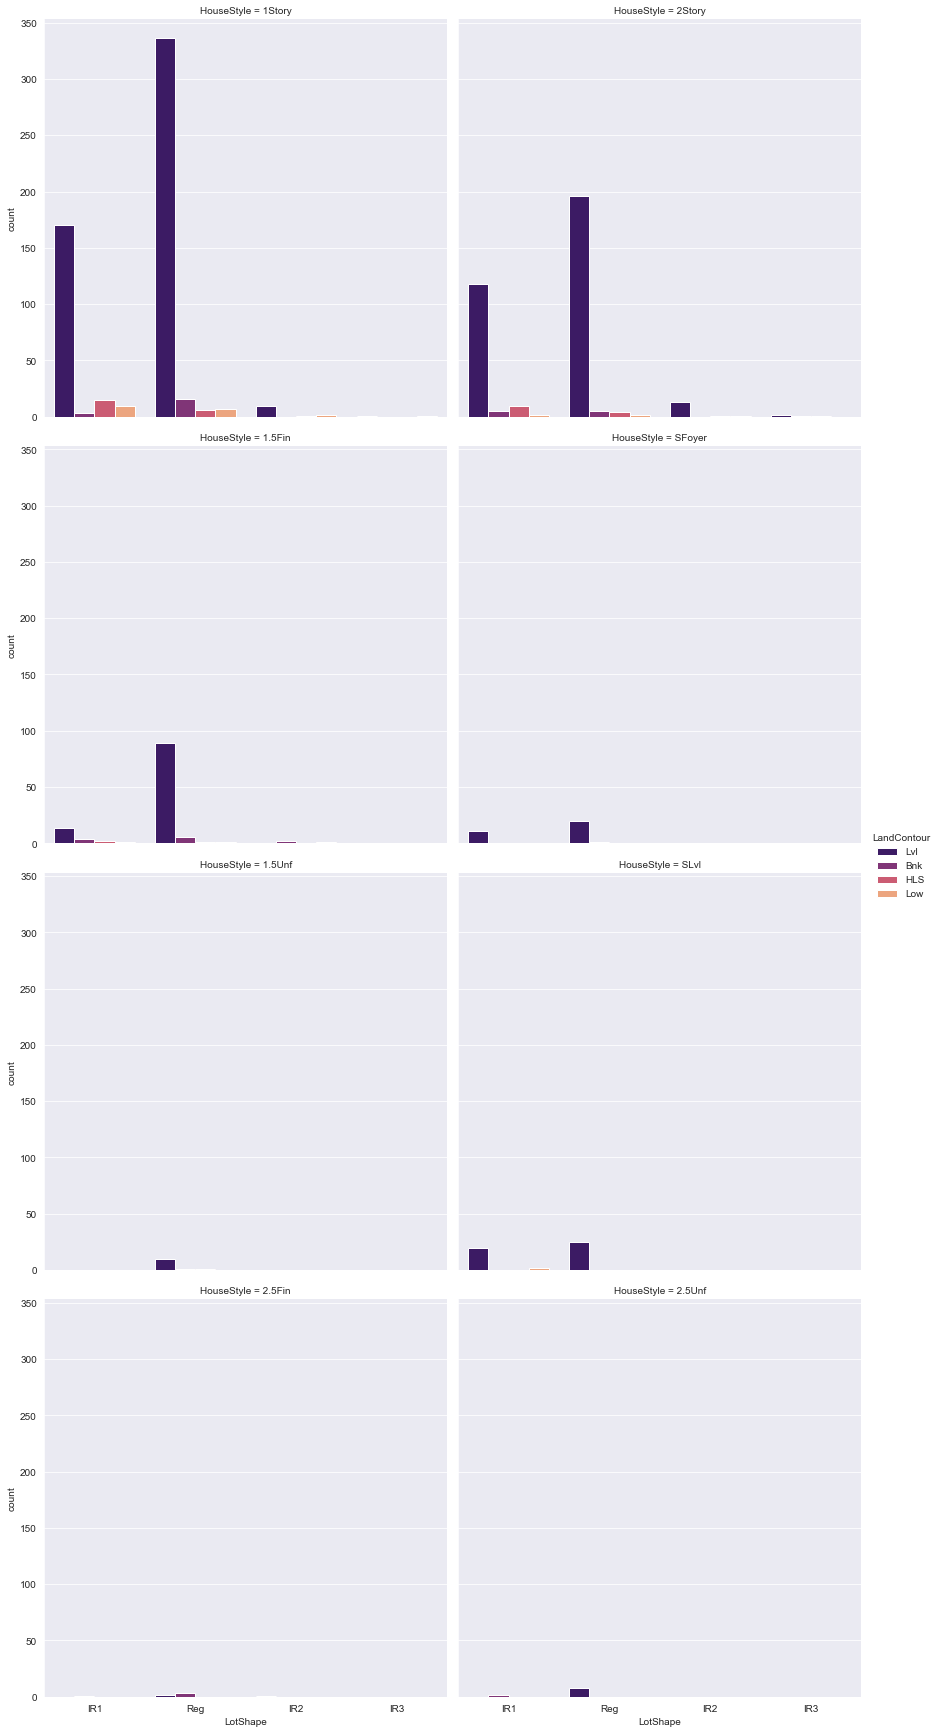

In [80]:
# catplot for analysis of categorical variables
sns.catplot(data = house,
           x="LotShape",
           hue = "LandContour",
           col_wrap = 2,
           col = 'HouseStyle',
            palette = "magma",
            kind="count",
            height = 6,
            aspect =1
            
           )

- Observation:
    - regular shaped, near flat/ level properties  are highly preferd by 1story and 2story houses

3. Analysing relationship between overallqual and overallcond with house style.

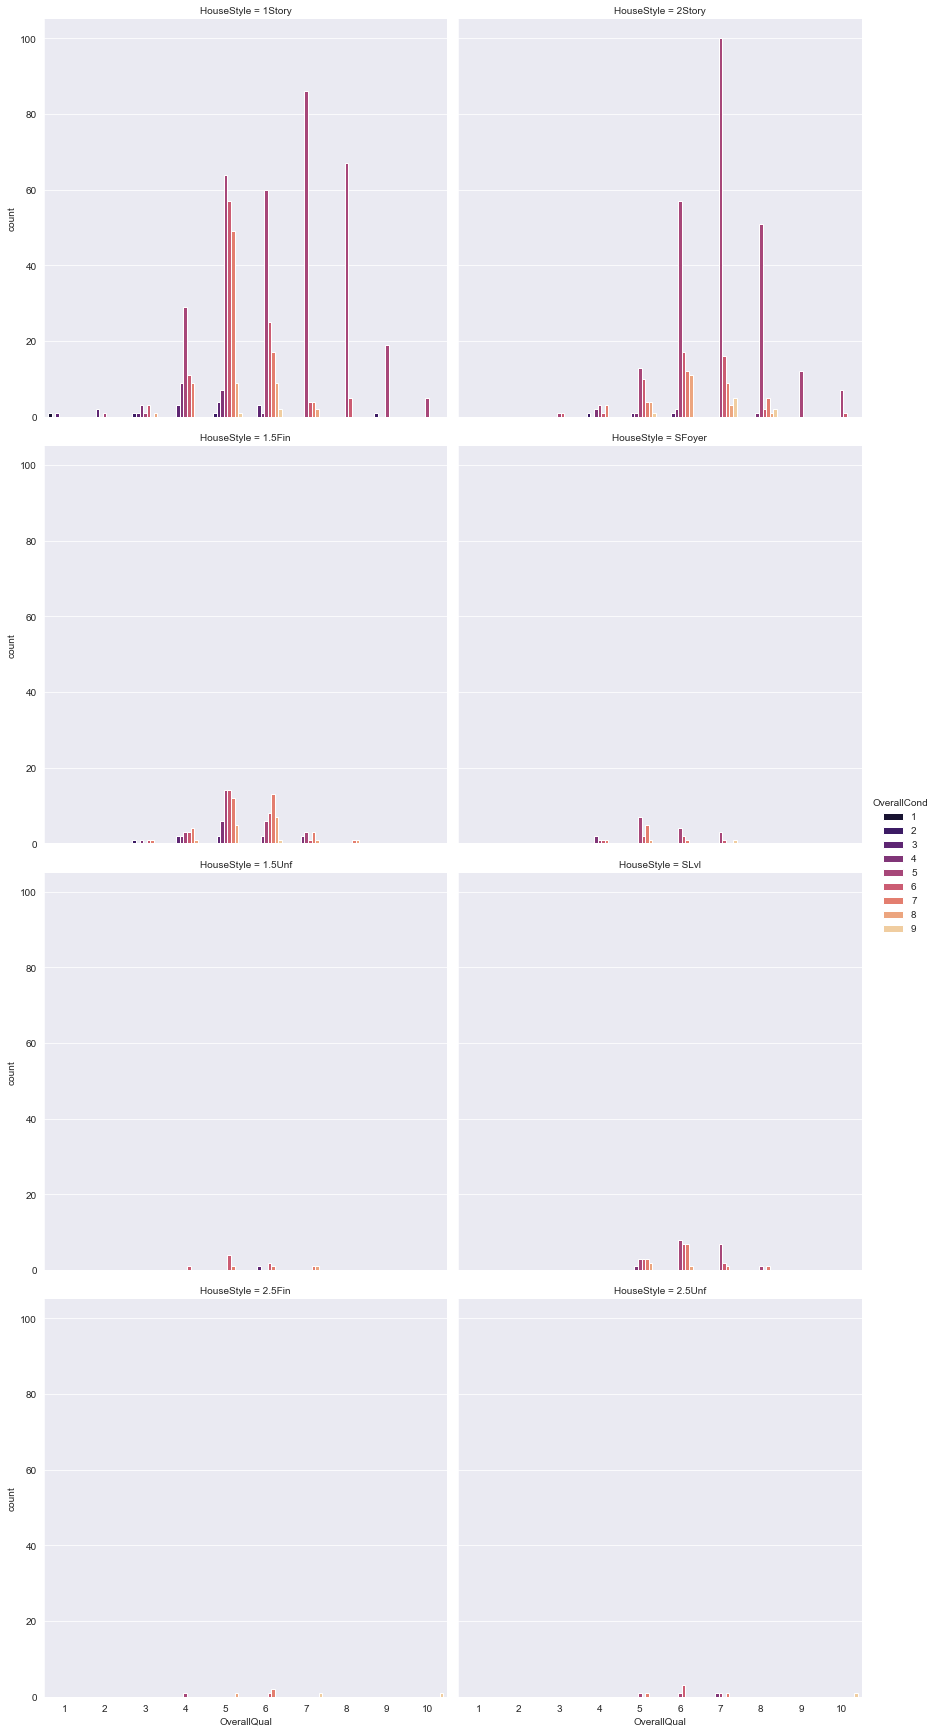

In [81]:
# catplot for analysis of categorical variables
sns.catplot(data = house,
           x="OverallQual",
           hue = "OverallCond",
           col_wrap = 2,
           col = 'HouseStyle',
            palette = "magma",
            kind="count",
            height = 6,
            aspect =1
            
           )

- Observations:
    - The most prefered house styles according to the data set are 1 story and 2 story houses and they are prefer an average overallqual and overall condition of 5 and above 

4. Create facegrid and analysis the fluctuation in sales price for each house style

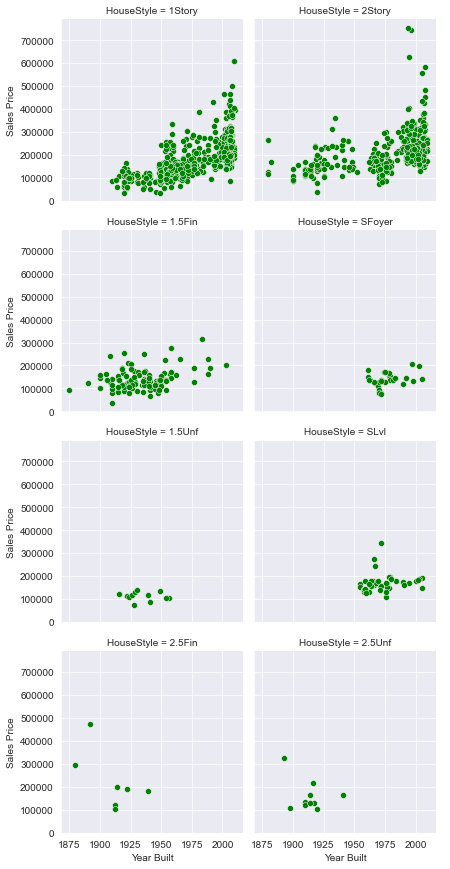

In [82]:
#creating the facergrid
g = sns.FacetGrid(house, col="HouseStyle", col_wrap=2)
g.map_dataframe(sns.scatterplot, x="YearBuilt", y="SalePrice", color = 'g')
g.set_axis_labels("Year Built", "Sales Price")
g.add_legend()

- observations:
    - Sales price starts to increase for 1story and 2 story houses from the 1925.
    - 1story and 2story Houses built around the year 2000 are expensive than the other years 

# Multivariate analysis
  

#### pairplot to find a pattern among the columns

In [83]:
# pairplot for columns 1in the house
#sns.pairplot(house)


# Data cleaning  - part 1

In [84]:
# check the datatype and information of the columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Condition2     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  HouseStyle     1168 non-null   object 
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null   int64  
 18  RoofStyl

There are 73 columns and there are 1167 entries. However, some column are missing values and those columns can be managed
- Firstly, the missing values are handled.


### Check for null values

In [85]:
#check the null values
house.iloc[:,:30].isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage     214
LotArea           0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrArea        7
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinSF1        0
dtype: int64

In [86]:
#check the null values
house.iloc[:,30:].isnull().sum()

BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageCars         0
GarageArea         0
GarageQual        64
GarageCond        64
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
dtype: int64

In [87]:
# find percentage of missing values in fireplaceQu
FireplaceQu_percentage = (551/1161)*100
print("The percentage of null values in FireplaceQu: " + str(FireplaceQu_percentage))


The percentage of null values in FireplaceQu: 47.459086993970715


- FireplaceQu have 47% null value
- almost 50% of the value are missing in the fireplaceQu column. Therefore, we can drop the column

In [88]:
house = house.drop("FireplaceQu", axis=1)
# column dropped

In [89]:
# find percentage of missing values in fireplaceQu
LotFrontage_percentage = (214/1161)*100
print("The percentage of null values in LotFrontage: " + str(LotFrontage_percentage))


The percentage of null values in LotFrontage: 18.43238587424634


- 18% of missing data will not affect the prediction model

##### Heatmap to check null values

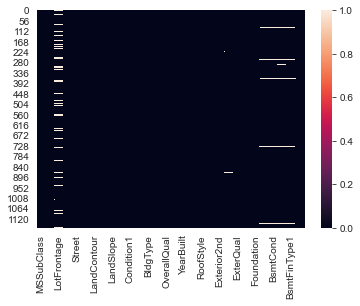

In [90]:
#check the null values
sns.heatmap(house.iloc[:,:30].isnull())

In [91]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Screen

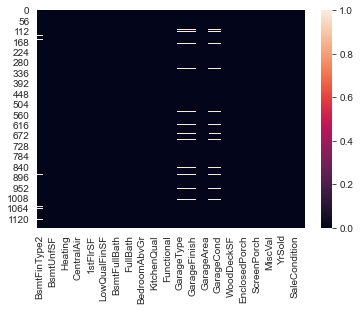

In [92]:
#check the null values
sns.heatmap(house.iloc[:,30:].isnull())

In [93]:
 # creating list of column names for null value columns
columns_with_null_values = ["LotFrontage",
"MasVnrArea",
"BsmtQual",         
"BsmtCond",        
"BsmtExposure",     
"BsmtFinType1",
"BsmtFinType2",
"GarageType",        
"GarageYrBlt",       
"GarageFinish",      
"GarageQual",     
"GarageCond"]    
 # condtional programming to identify the datatype of the null value columns    
for i in columns_with_null_values:
    print("The dtype of "+i+ " is "+ " : " + str(house[i].dtypes))



The dtype of LotFrontage is  : float64
The dtype of MasVnrArea is  : float64
The dtype of BsmtQual is  : object
The dtype of BsmtCond is  : object
The dtype of BsmtExposure is  : object
The dtype of BsmtFinType1 is  : object
The dtype of BsmtFinType2 is  : object
The dtype of GarageType is  : object
The dtype of GarageYrBlt is  : float64
The dtype of GarageFinish is  : object
The dtype of GarageQual is  : object
The dtype of GarageCond is  : object


## Using simple imputer to replace null values 

##### The replacement method is done with consideration to the following conditions

   - The mean of the numerical column data will be used to replace the null values, if the data is normally distribute
   - The median of the numerical column data will be used to replace the null values, if the data does not project normal distribution and is compromised of outliers.
   - The mode/most frequent of the categorical column will be used for columns of obejct type

In [94]:
# import simple imputer library
from sklearn.impute import SimpleImputer
#assing variables 
imp_cat = SimpleImputer(strategy = "most_frequent")
imp_median = SimpleImputer(strategy ="median")
imp_mode = SimpleImputer(strategy = "mean")


### find the distribution of numerical columns with null values

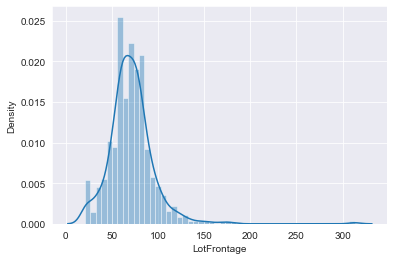

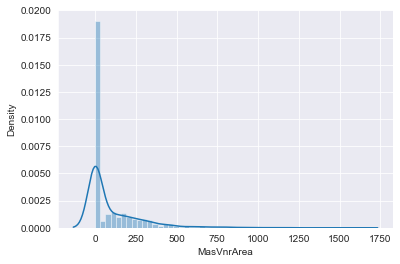

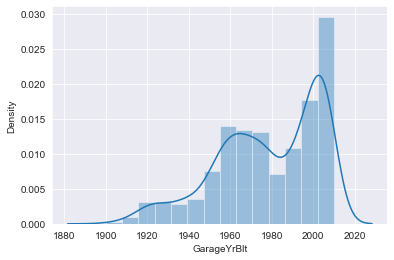

In [95]:
  
for i in columns_with_null_values:
    if house[i].dtypes == 'float64':
        sns.distplot(house[i], kde=True)
        plt.show()

- Since, none of the numerical columns with null value is normally distributed, the best replacement method is median

In [96]:
for i in columns_with_null_values:
    if house[i].dtypes == 'float64':
        house[i] = imp_median.fit_transform(house[i].values.reshape(-1,1))

In [97]:
for i in columns_with_null_values:
    if house[i].dtypes == 'object':
        house[i] = imp_cat.fit_transform(house[i].values.reshape(-1,1))

## checking for null values


In [98]:
#check the null values
house.iloc[:,:30].isnull().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
dtype: int64

In [99]:
#check the null values
house.iloc[:,30:].isnull().sum()

BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

##### All the null values are removed

#### groping categorical variables and analysing the variation in price

In [100]:
Group_1 = pd.DataFrame({"Mean_price" : house.groupby(["MSSubClass"])['SalePrice'].mean()}).reset_index()
                
                

In [101]:
description_1 = ["1-STORY 1946 & NEWER ALL STYLES",
                 "1-STORY 1945 & OLDER",               
      " 1-STORY W/FINISHED ATTIC ALL AGES",
   "1-1/2 STORY - UNFINISHED ALL AGES",
        "1-1/2 STORY FINISHED ALL AGES",
        "2-STORY 1946 & NEWER",
        "2-STORY 1945 & OLDER",
        "2-1/2 STORY ALL AGES",
        "SPLIT OR MULTI-LEVEL",
       "SPLIT FOYER",
        "DUPLEX - ALL STYLES AND AGES",
      "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
       "1-1/2 STORY PUD - ALL AGES",
       "2-STORY PUD - 1946 & NEWER",
     "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    "2 FAMILY CONVERSION - ALL STYLES AND AGES"]

In [102]:
Group_1["Description"] = pd.Series(description_1)

In [103]:
Group_1.sort_values("Mean_price", ascending = False)

MSSubClass     Mean_price  \
5           60  241584.430328   
11         120  207705.289855   
7           75  195571.428571   
0           20  183321.390187   
8           80  171607.441860   
6           70  169231.509434   
2           40  157500.000000   
9           85  147800.000000   
12         160  137861.382979   
4           50  137626.194690   
14         190  135303.846154   
10          90  133871.609756   
3           45  111960.000000   
13         180  102750.000000   
1           30   97774.057692   

                                          Description  
5                                2-STORY 1946 & NEWER  
11  1-STORY PUD (Planned Unit Development) - 1946 ...  
7                                2-1/2 STORY ALL AGES  
0                     1-STORY 1946 & NEWER ALL STYLES  
8                                SPLIT OR MULTI-LEVEL  
6                                2-STORY 1945 & OLDER  
2                   1-STORY W/FINISHED ATTIC ALL AGES  
9                                         SPLIT FOYER  
12                         1-1/2 STORY PUD - ALL AGES  
4                       1-1/2 STORY FINISHED ALL AGES  
14            PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  
10                       DUPLEX - ALL STYLES AND AGES  
3                   1-1/2 STORY - UNFINISHED ALL AGES  
13                         2-STORY PUD - 1946 & NEWER  
1                                1-STORY 1945 & OLDER

### Observation on the type of dwelling:
- if the  dwelling is with 1-story and was bulit in 1945 or older have the cheapest price.
- Overall obbservation, newer buldings are slightly expensive than older buildings

In [104]:
cat_values = []
for x in house.columns:
    if house[x].dtypes == "object":
        cat_values.append(x)

In [105]:
for x in cat_values:
    print("\n")
    print(x + " Analysis")
    print(pd.DataFrame({"Mean_price" : house.groupby([x])['SalePrice'].mean()}).reset_index())
                
                



MSZoning Analysis
  MSZoning     Mean_price
0  C (all)   75208.888889
1       FV  209478.461538
2       RH  131558.375000
3       RL  191004.181034
4       RM  129070.975460


Street Analysis
  Street     Mean_price
0   Grvl  121110.750000
1   Pave  181684.450172


LotShape Analysis
  LotShape     Mean_price
0      IR1  206038.464103
1      IR2  233827.750000
2      IR3  226120.833333
3      Reg  165906.660811


LandContour Analysis
  LandContour     Mean_price
0         Bnk  146163.140000
1         HLS  214302.166667
2         Low  194393.333333
3         Lvl  181476.572658


LotConfig Analysis
  LotConfig     Mean_price
0    Corner  182427.635135
1   CulDSac  224594.463768
2       FR2  171138.636364
3       FR3  221500.000000
4    Inside  178003.105701


LandSlope Analysis
  LandSlope     Mean_price
0       Gtl  181203.795475
1       Mod  185353.313725
2       Sev  190160.833333


Neighborhood Analysis
   Neighborhood     Mean_price
0       Blmngtn  195987.000000
1       Blueste  1

# Label encoding 

- Find the number of columns with type object

In [106]:
object_house = []
for x in house.columns:
    if house[x].dtypes == 'object':
        object_house.append(x)
        

In [107]:
object_house

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [108]:
for x in object_house:
    print("The unique values for " + x + " is : " + house[x].unique())

['The unique values for MSZoning is : RL'
 'The unique values for MSZoning is : RM'
 'The unique values for MSZoning is : FV'
 'The unique values for MSZoning is : RH'
 'The unique values for MSZoning is : C (all)']
['The unique values for Street is : Pave'
 'The unique values for Street is : Grvl']
['The unique values for LotShape is : IR1'
 'The unique values for LotShape is : Reg'
 'The unique values for LotShape is : IR2'
 'The unique values for LotShape is : IR3']
['The unique values for LandContour is : Lvl'
 'The unique values for LandContour is : Bnk'
 'The unique values for LandContour is : HLS'
 'The unique values for LandContour is : Low']
['The unique values for LotConfig is : Inside'
 'The unique values for LotConfig is : CulDSac'
 'The unique values for LotConfig is : FR2'
 'The unique values for LotConfig is : Corner'
 'The unique values for LotConfig is : FR3']
['The unique values for LandSlope is : Gtl'
 'The unique values for LandSlope is : Mod'
 'The unique values fo

In [109]:
for x in object_house:
    if house[x].nunique() > 3:
         print(x + " : " + str(house[x].nunique()) + " use label encoding")
         print("\n")
    else:
        print(x + " : " + str(house[x].nunique()) + " use one hot encoding")
        
        

MSZoning : 5 use label encoding


Street : 2 use one hot encoding
LotShape : 4 use label encoding


LandContour : 4 use label encoding


LotConfig : 5 use label encoding


LandSlope : 3 use one hot encoding
Neighborhood : 25 use label encoding


Condition1 : 9 use label encoding


Condition2 : 8 use label encoding


BldgType : 5 use label encoding


HouseStyle : 8 use label encoding


RoofStyle : 6 use label encoding


Exterior1st : 14 use label encoding


Exterior2nd : 15 use label encoding


ExterQual : 4 use label encoding


ExterCond : 5 use label encoding


Foundation : 6 use label encoding


BsmtQual : 4 use label encoding


BsmtCond : 4 use label encoding


BsmtExposure : 4 use label encoding


BsmtFinType1 : 6 use label encoding


BsmtFinType2 : 6 use label encoding


Heating : 6 use label encoding


HeatingQC : 5 use label encoding


CentralAir : 2 use one hot encoding
Electrical : 5 use label encoding


KitchenQual : 4 use label encoding


Functional : 7 use label encoding




- Since, the unique values are identified. The most suitable encoding technique will be used.

## Label encoding

In [110]:
# import the library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in object_house:    
        house[x] = le.fit_transform(house[x])

In [111]:
#checking datatype after label encoding
house.iloc[:, :30].dtypes

MSSubClass        int64
MSZoning          int32
LotFrontage     float64
LotArea           int64
Street            int32
LotShape          int32
LandContour       int32
LotConfig         int32
LandSlope         int32
Neighborhood      int32
Condition1        int32
Condition2        int32
BldgType          int32
HouseStyle        int32
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle         int32
Exterior1st       int32
Exterior2nd       int32
MasVnrArea      float64
ExterQual         int32
ExterCond         int32
Foundation        int32
BsmtQual          int32
BsmtCond          int32
BsmtExposure      int32
BsmtFinType1      int32
BsmtFinSF1        int64
dtype: object

In [112]:
#checking datatype after label encoding
house.iloc[:, 30:].dtypes

BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int32
TotRmsAbvGrd       int64
Functional         int32
Fireplaces         int64
GarageType         int32
GarageYrBlt      float64
GarageFinish       int32
GarageCars         int64
GarageArea         int64
GarageQual         int32
GarageCond         int32
PavedDrive         int32
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType           int32


## OneHotEncoding

In [113]:
from sklearn.preprocessing import OneHotEncoder
#binary encoder for columns with 2 or 3 unique values
onehot_encode = OneHotEncoder()
for x in object_house:
    if house[x].nunique() <= 2:
        house[x] = onehot_encode.fit_transform(house[x].values.reshape(-1,1)).toarray()


In [114]:
#checking datatype after one hot encoding
house.iloc[:, :30].dtypes

MSSubClass        int64
MSZoning          int32
LotFrontage     float64
LotArea           int64
Street          float64
LotShape          int32
LandContour       int32
LotConfig         int32
LandSlope         int32
Neighborhood      int32
Condition1        int32
Condition2        int32
BldgType          int32
HouseStyle        int32
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle         int32
Exterior1st       int32
Exterior2nd       int32
MasVnrArea      float64
ExterQual         int32
ExterCond         int32
Foundation        int32
BsmtQual          int32
BsmtCond          int32
BsmtExposure      int32
BsmtFinType1      int32
BsmtFinSF1        int64
dtype: object

In [115]:
#checking datatype after one hot encoding
house.iloc[:, 30:].dtypes

BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir       float64
Electrical         int32
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int32
TotRmsAbvGrd       int64
Functional         int32
Fireplaces         int64
GarageType         int32
GarageYrBlt      float64
GarageFinish       int32
GarageCars         int64
GarageArea         int64
GarageQual         int32
GarageCond         int32
PavedDrive         int32
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType           int32


In [116]:
house['Street'].unique()

array([0., 1.])

In [117]:
house

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            120         3         70.0     4928     0.0         0   
1             20         3         95.0    15865     0.0         0   
2             60         3         92.0     9920     0.0         0   
3             20         3        105.0    11751     0.0         0   
4             20         3         70.0    16635     0.0         0   
...          ...       ...          ...      ...     ...       ...   
1163          20         3         70.0     9819     0.0         0   
1164          20         3         67.0     8777     0.0         3   
1165         160         3         24.0     2280     0.0         3   
1166          70         0         50.0     8500     0.0         3   
1167          60         3         70.0     7861     0.0         0   

      LandContour  LotConfig  LandSlope  Neighborhood  ...  EnclosedPorch  \
0               3          4          0            13  ...              0   
1               3          4          1            12  ...              0   
2               3          1          0            15  ...              0   
3               3          4          0            14  ...              0   
4               3          2          0            14  ...              0   
...           ...        ...        ...           ...  ...            ...   
1163            3          4          0            19  ...              0   
1164            3          4          0             7  ...              0   
1165            3          2          0            13  ...              0   
1166            3          4          0             9  ...            172   
1167            3          4          0             8  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0             0            0         0        0       2    2007         8   
1             0          224         0        0      10    2007         8   
2             0            0         0        0       6    2007         8   
3             0            0         0        0       1    2010         0   
4             0            0         0        0       6    2009         8   
...         ...          ...       ...      ...     ...     ...       ...   
1163          0            0         0        0       2    2010         8   
1164          0            0         0        0       5    2009         8   
1165          0            0         0        0       7    2009         8   
1166          0            0         0        0       7    2008         8   
1167          0            0         0        0       6    2006         8   

      SaleCondition  SalePrice  
0                 4     128000  
1                 4     268000  
2                 4     269790  
3                 4     190000  
4                 4     215000  
...             ...        ...  
1163              4     122000  
1164              4     108000  
1165              4     148500  
1166              4      40000  
1167              4     183200  

[1168 rows x 72 columns]

 -  Step 1 of the data cleaning process is done.
 -  All the object type columns are transformed into numerical values
 -  Step 2 of the data cleaning process is to check skewness and remove the outliers

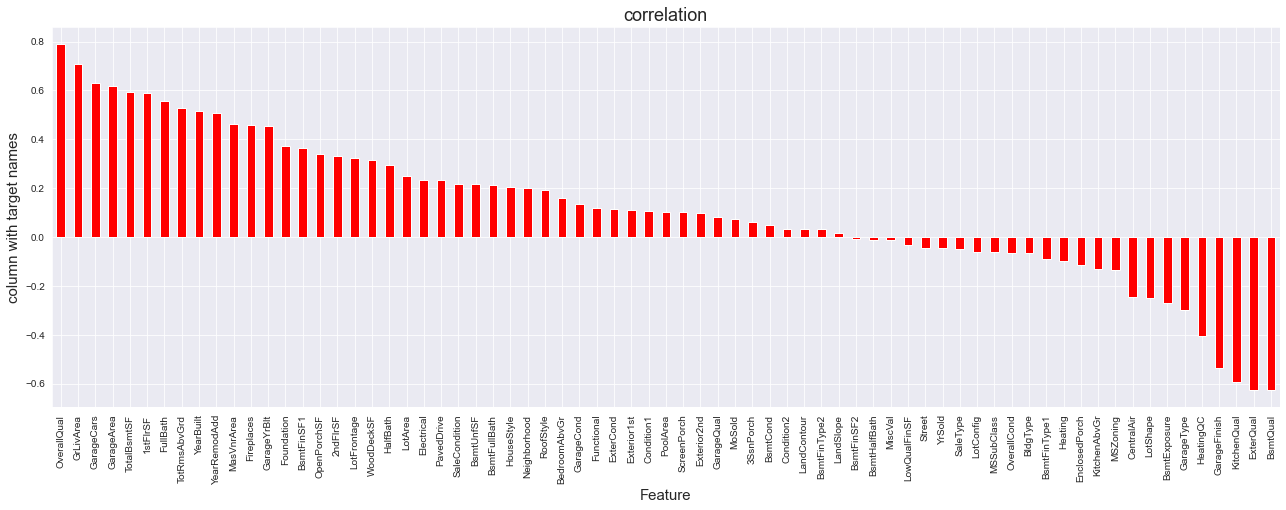

In [118]:
plt.figure(figsize=(22,7))
house.corr()["SalePrice"].sort_values(ascending = False).drop(["SalePrice"]).plot(kind = "bar", color = "r")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

##### Answering Question 1: Which variables are important to predict the price of variable?

- 72 columns of 80 variables are selected. 
- The following variables are of high importance to predict the price.

   - OverallQual 
   - GrLivArea
   - GarageCars
   - GarageArea
   - TotalBsmtsf
   - 1stfLRsf
   - FullBath
   - TotRmsAbvGrd
   - YearBuilt
   - YearRemodAdd
   - MasvnrArea
   - Fireplace
   - GarageYrBuilt
  
- The above columns have a good correlation with price
- Since, the correlaion is +0.5 and above with price
- However, the following variables are also of high importance.

   - HeatingQC
   - Garage finish
   - KitchenQual
   - ExterQual
   - BsmtQual

- Moreover, the above columns are negatively correlated and the correlation is -0.5 and below with price.


##### Answering Question 2:  How do these variables describe the price of the house ?


   - OverallQual : Rates the overall material and finish of the house
          -In The overall rating, an average of 5 was highly accepted by the customers.
          - Therefore, overall quality if selected as one of the best variables.
   
   - GrLivArea : Above grade (ground) living area square feet 
          - The regression line is linear and positive. This makes the column a perfect vaiables 
         
   - GarageCars : Size of garage in car capacity
            - The regression line is linear and positive. This makes the column a perfect vaiables
   
   - GarageArea : Size of garage in square feet
             - The regression line is linear and positive. This makes the column a perfect vaiables
   
   - TotalBsmtsf : Total square feet of basement area
          - The regression line is linear and positive. This makes the column a perfect vaiables

   - 1stfLRsf : First Floor square feet
          - The regression line is linear and positive. This makes the column a perfect vaiables
   
   - FullBath : Full bathrooms above grade
            - The regression line is linear and positive. This makes the column a perfect vaiables
   
   - TotRmsAbvGrd : Total rooms above grade (does not include bathrooms)
            - The regression line is linear and positive. This makes the column a perfect vaiables
   
   - YearBuilt : Original construction date
       - linear increase in price has the years increase
   
   - YearRemodAdd : Remodel date (same as construction date if no remodeling or additions)
       - Linear increase in price has the years increase

   - MasvnrArea : Masonry veneer area in square feet
       - The regression line is linear and positive. This makes the column a perfect vaiables
      
   - Fireplace : Number of fireplaces
        - The regression line is linear and positive. This makes the column a perfect vaiables
   
   
   - GarageYrBuilt: Year garage was built:
      - Linear increase in price has the years increase
  

 ###### A heatmap to find the correlation among variables

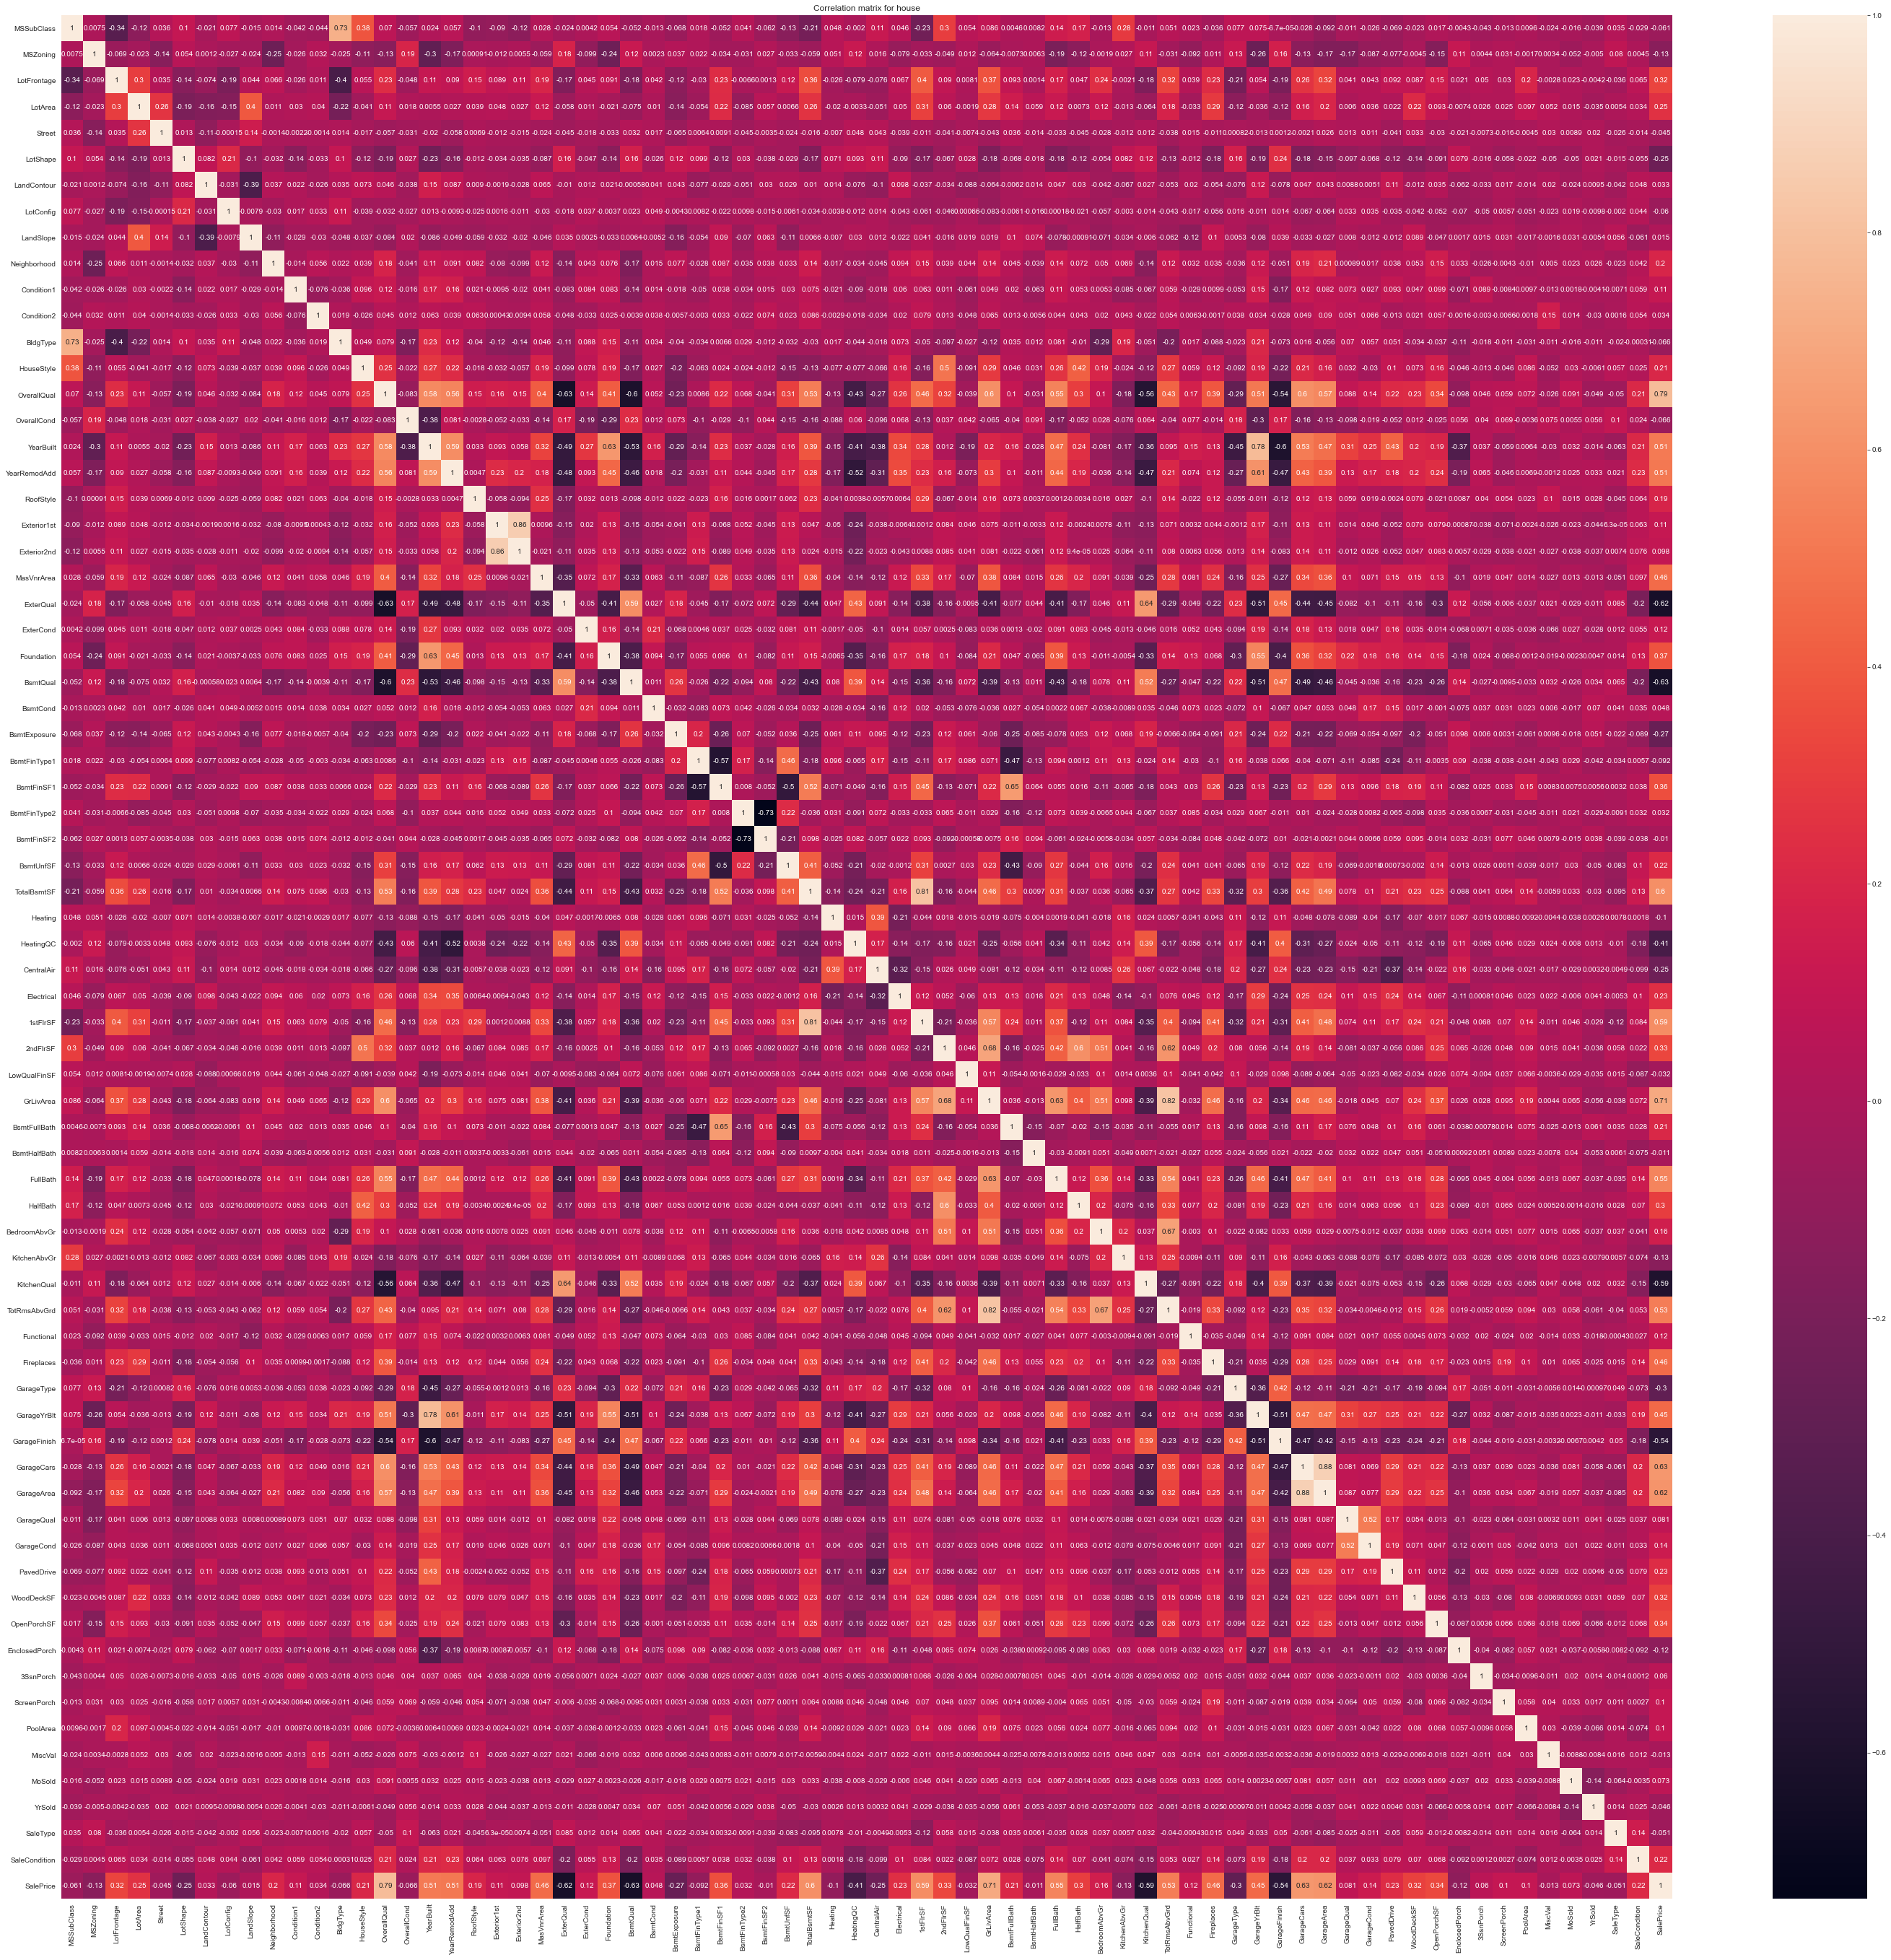

In [119]:
# plot heatmap to find the correlation

correlation_matrix_house = house.corr()

plt.figure(figsize = [50,48])
sns.heatmap(correlation_matrix_house, annot=True)
plt.title("Correlation matrix for house")
plt.show()

 -  The complexity of heatmap, hinders clear interpretation of multicolinearity.

In [120]:
house.corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
                  ...   
HeatingQC      -0.406604
GarageFinish   -0.537121
KitchenQual    -0.592468
ExterQual      -0.624820
BsmtQual       -0.626850
Name: SalePrice, Length: 72, dtype: float64

#### Check for multicolinearity

- Identify multicollinearity of records 

In [121]:
# import libraries
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
# fucntion to find multicollinearity
def find_multicollinearity(data):
    variance = pd.DataFrame()
    data = sma.add_constant(data)
    variance["COLUMN NAME"] = data.columns
    variance["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(variance)
    
    

### variance_inflation_factor
 - THE VIF IS A MEASURE OF COLINEARITY AMONG PREDICTOR VARIABLES WITHIN A MULTIPLE REGRESSION. IT IS CALCULATED BY TAKING THE RATIO OF THE VARIANCE OF ALL A GIVEN MODEL'S BETAS DIVIDED BY THE VARIANCE OF A SINGLE BETA IF IT WERE FIT ALONE
 
- The VIF is the reciprocal of tolerance value; small VIF value indicates low correlation among variables under ideal conditions VIF<3. However, it is acceptable if it is less than 10

In [123]:
find_multicollinearity(house.iloc[:,:30])

COLUMN NAME           VIF
0          const  24046.894900
1     MSSubClass      3.796674
2       MSZoning      1.256217
3    LotFrontage      1.521354
4        LotArea      1.562412
5         Street      1.154517
6       LotShape      1.207565
7    LandContour      1.271270
8      LotConfig      1.116939
9      LandSlope      1.461409
10  Neighborhood      1.178970
11    Condition1      1.094041
12    Condition2      1.045623
13      BldgType      3.612945
14    HouseStyle      1.836953
15   OverallQual      2.599080
16   OverallCond      1.630764
17     YearBuilt      4.133666
18  YearRemodAdd      2.322302
19     RoofStyle      1.159501
20   Exterior1st      4.094465
21   Exterior2nd      4.158016
22    MasVnrArea      1.391032
23     ExterQual      2.163428
24     ExterCond      1.163296
25    Foundation      1.824769
26      BsmtQual      2.059625
27      BsmtCond      1.119054
28  BsmtExposure      1.271561
29  BsmtFinType1      1.742508
30    BsmtFinSF1      1.866719

##### the Exterior1st and Exterior2nd are two cmolumns with a moderate multicollinearity 

In [124]:
find_multicollinearity(house.iloc[:,30:])

COLUMN NAME           VIF
0           const  2.423321e+06
1    BsmtFinType2  2.280579e+00
2      BsmtFinSF2  2.321056e+00
3       BsmtUnfSF  2.602783e+00
4     TotalBsmtSF  4.954032e+00
5         Heating  1.258214e+00
6       HeatingQC  1.505249e+00
7      CentralAir  1.556184e+00
8      Electrical  1.265324e+00
9        1stFlrSF           inf
10       2ndFlrSF           inf
11   LowQualFinSF           inf
12      GrLivArea           inf
13   BsmtFullBath  2.193192e+00
14   BsmtHalfBath  1.161586e+00
15       FullBath  2.811082e+00
16       HalfBath  2.074488e+00
17   BedroomAbvGr  2.447690e+00
18   KitchenAbvGr  1.461410e+00
19    KitchenQual  1.784555e+00
20   TotRmsAbvGrd  4.877529e+00
21     Functional  1.141339e+00
22     Fireplaces  1.617455e+00
23     GarageType  1.537157e+00
24    GarageYrBlt  2.555123e+00
25   GarageFinish  1.938556e+00
26     GarageCars  5.363557e+00
27     GarageArea  5.359627e+00
28     GarageQual  1.542382e+00
29     GarageCond  1.491409e+00
30     PavedDrive  1.342888e+00
31     WoodDeckSF  1.229752e+00
32    OpenPorchSF  1.285169e+00
33  EnclosedPorch  1.182788e+00
34      3SsnPorch  1.031724e+00
35    ScreenPorch  1.127697e+00
36       PoolArea  1.110622e+00
37        MiscVal  1.021703e+00
38         MoSold  1.059696e+00
39         YrSold  1.051979e+00
40       SaleType  1.087942e+00
41  SaleCondition  1.157546e+00
42      SalePrice  4.591435e+00

##### 1stFlrSF	inf, 10	2ndFlrSF	inf, 11	LowQualFinSF	inf, 12	GrLivArea	inf
- Severe multi-colinearity 


### check the correlation with target variable

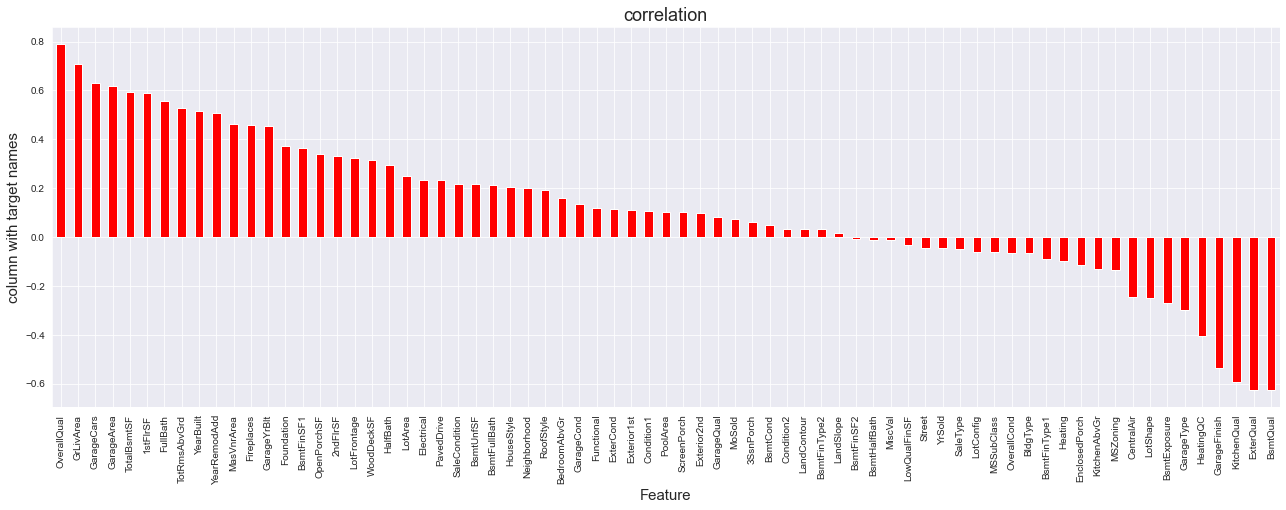

In [125]:
plt.figure(figsize=(22,7))
house.corr()["SalePrice"].sort_values(ascending = False).drop(["SalePrice"]).plot(kind = "bar", color = "r")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

- some variables are in poor correlation with the given variables
- majority of the columns are in good correlation with the target 


# Data cleaning - part 2
   ## checking for skewness and removal

### Split data into x and y

In [253]:
#split dependent and independent variable
x = house.drop("SalePrice", axis=1)
y = house["SalePrice"]

In [254]:
#print the shape of the data frames
print(x.shape)
print(y.shape)

(1168, 71)
(1168,)


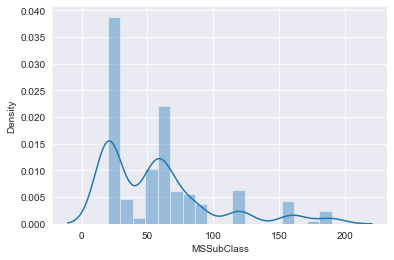

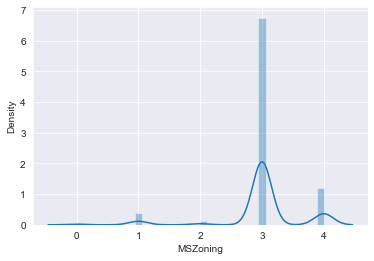

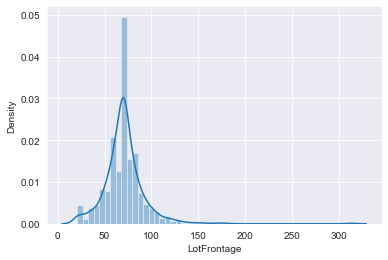

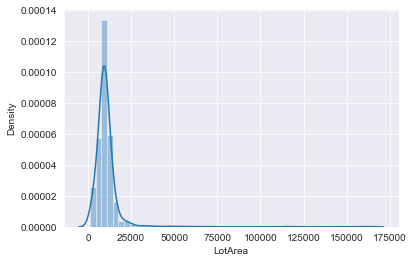

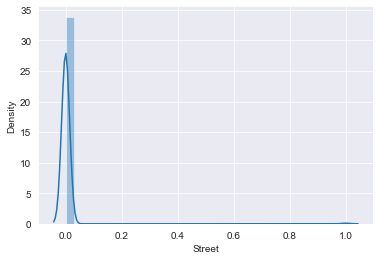

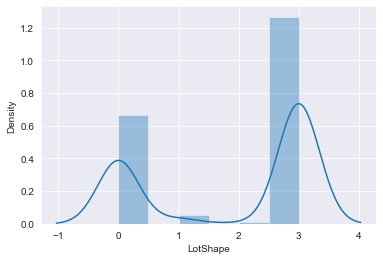

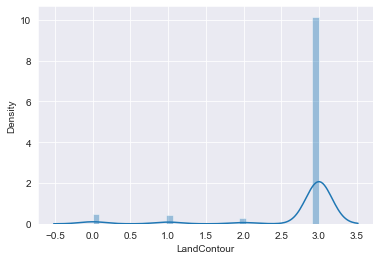

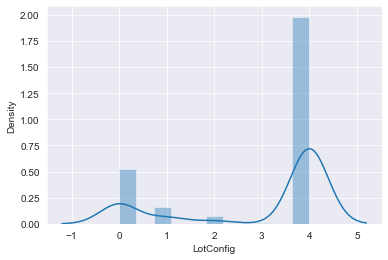

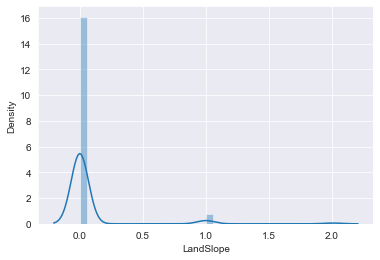

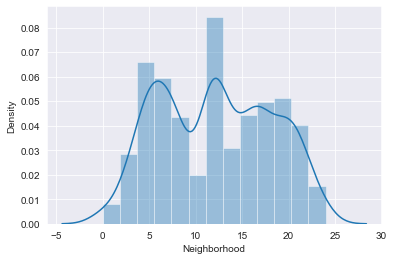

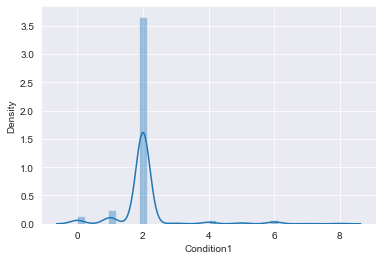

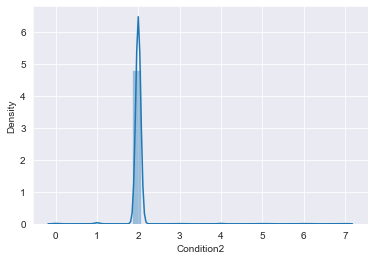

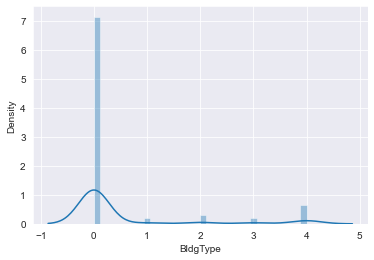

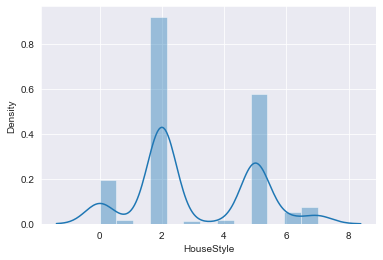

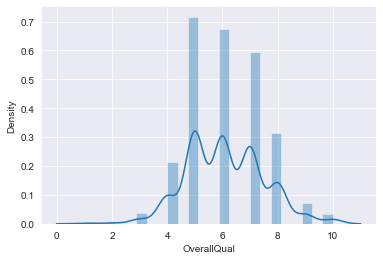

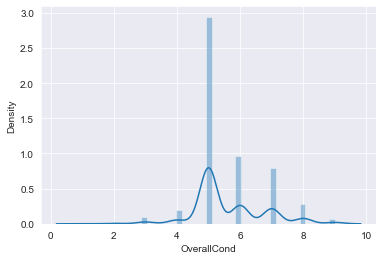

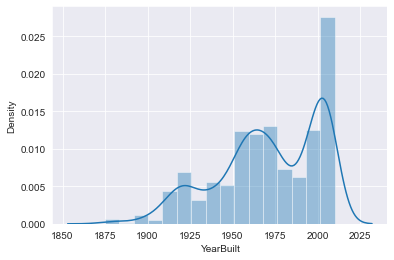

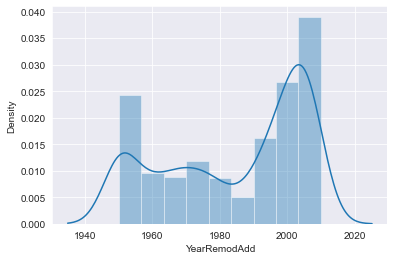

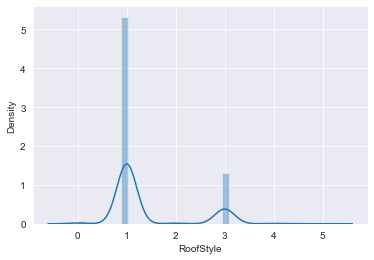

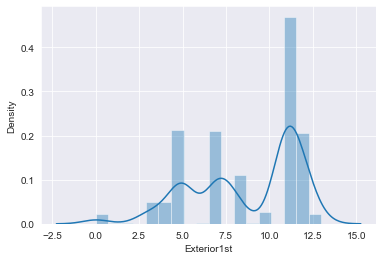

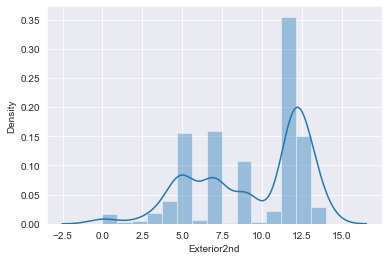

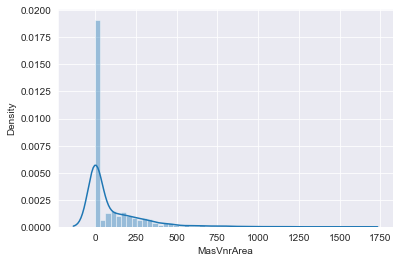

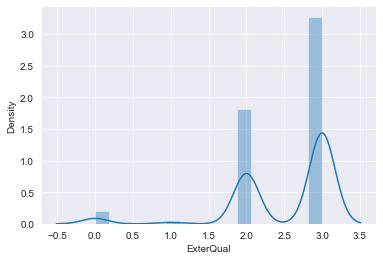

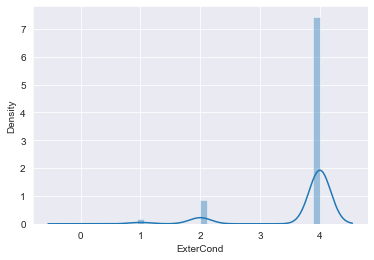

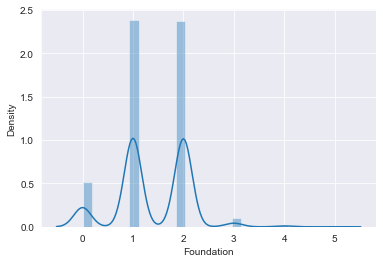

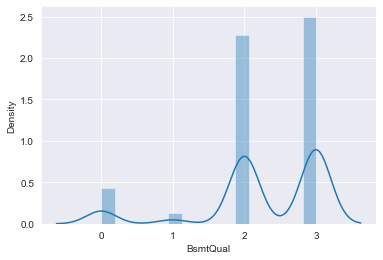

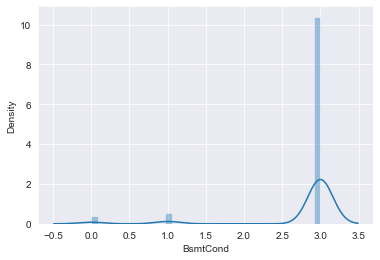

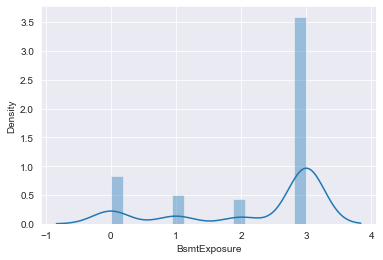

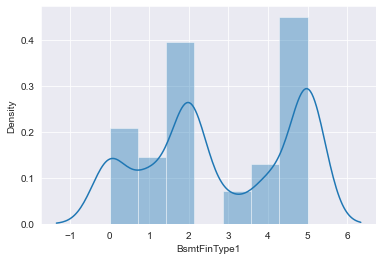

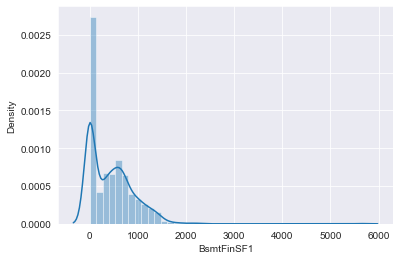

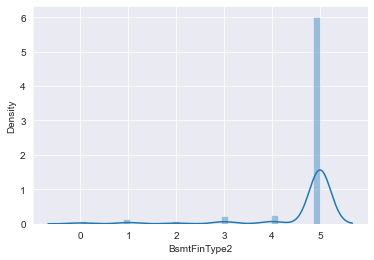

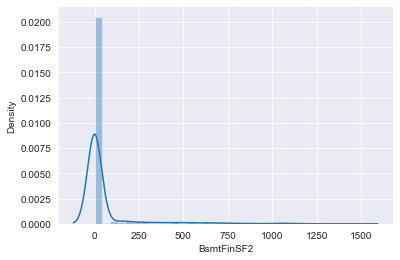

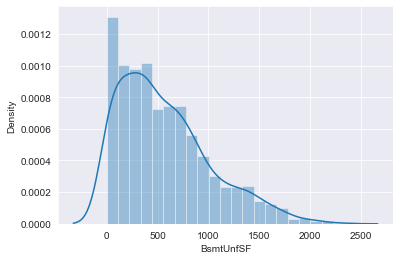

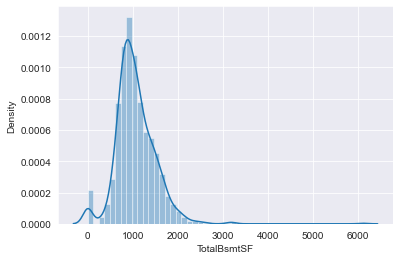

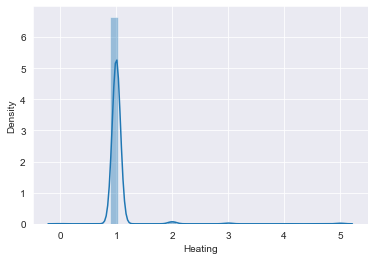

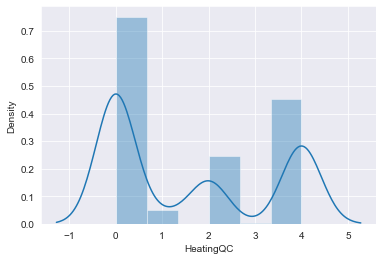

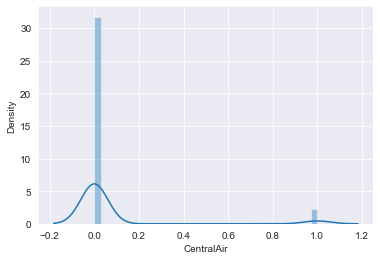

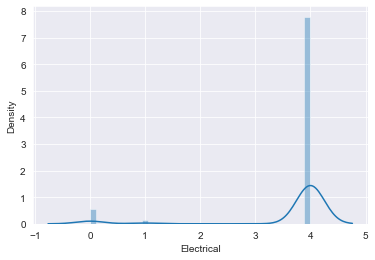

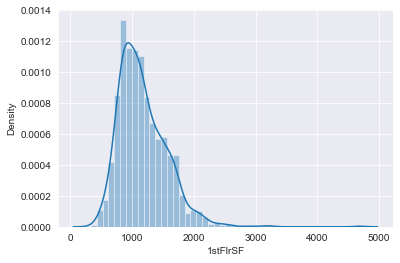

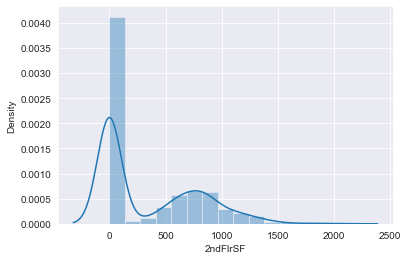

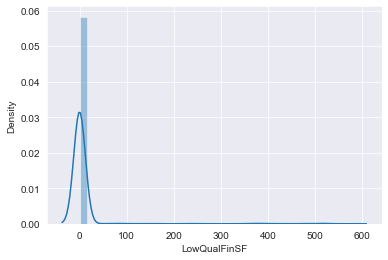

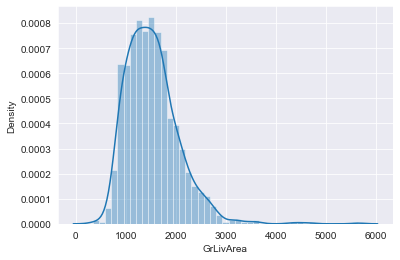

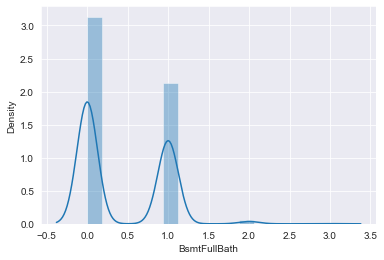

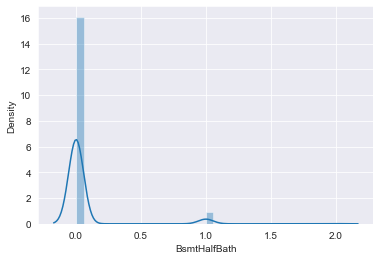

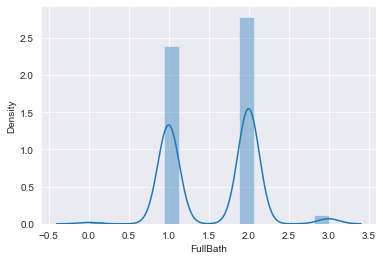

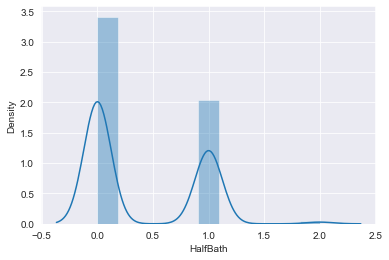

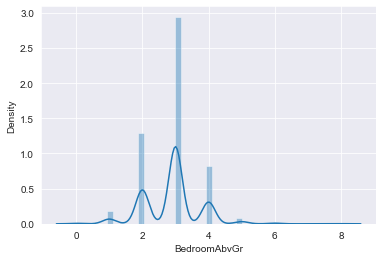

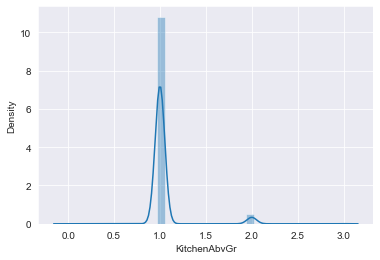

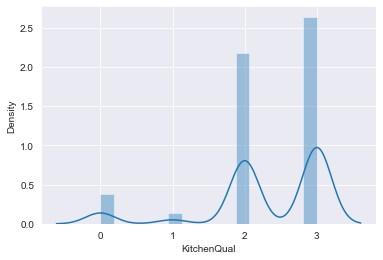

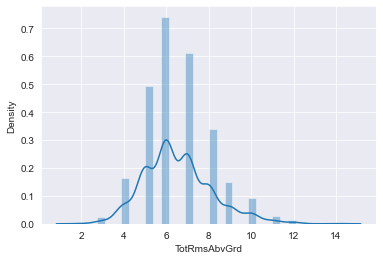

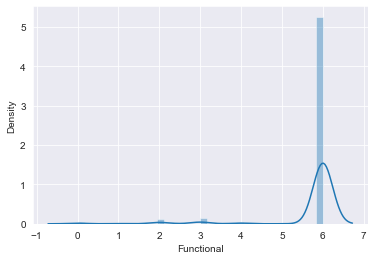

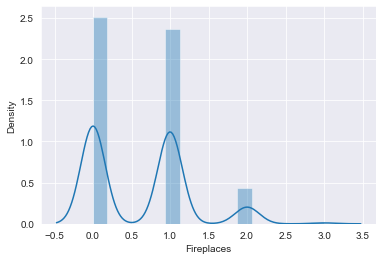

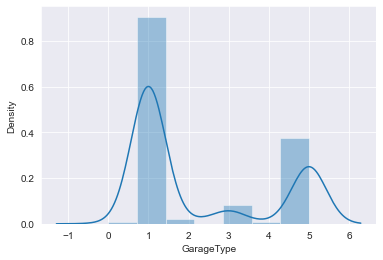

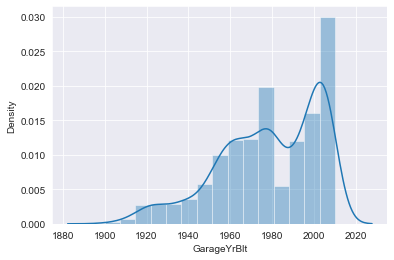

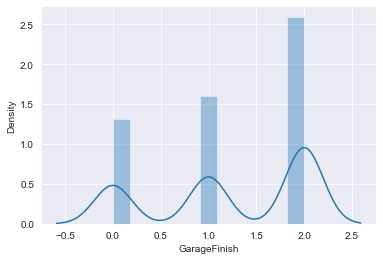

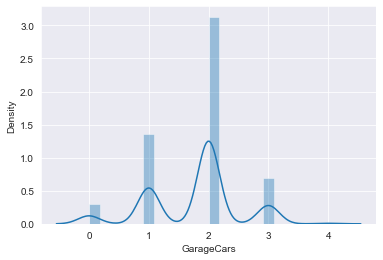

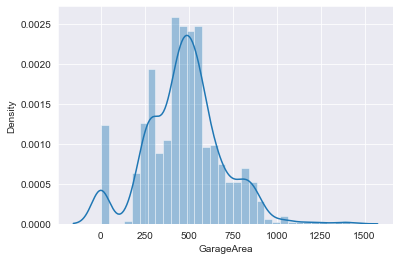

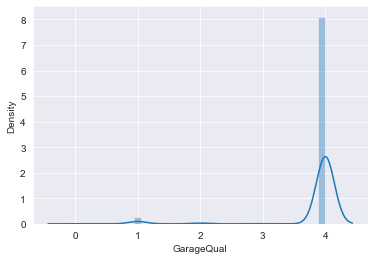

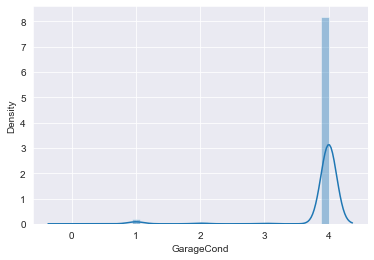

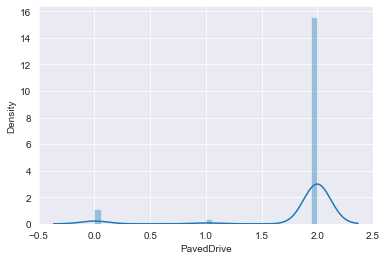

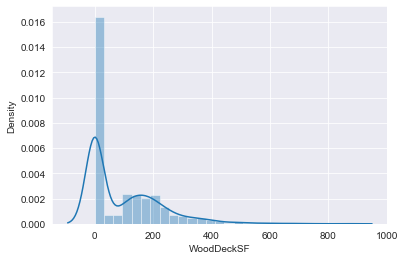

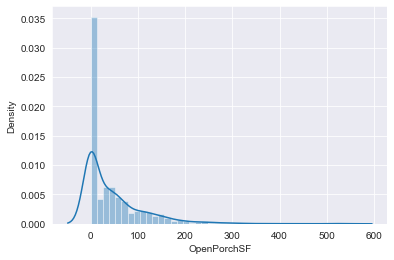

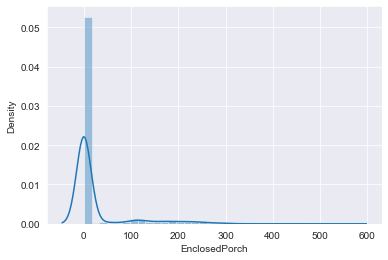

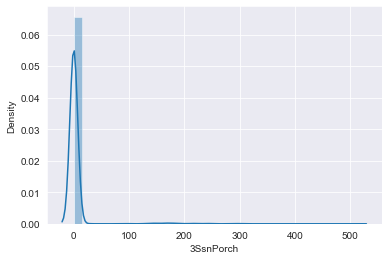

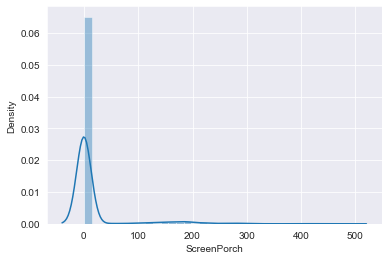

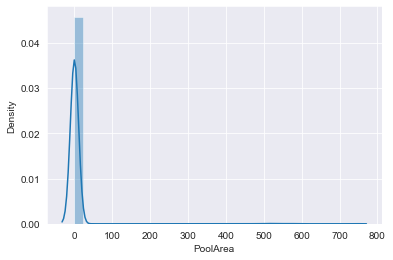

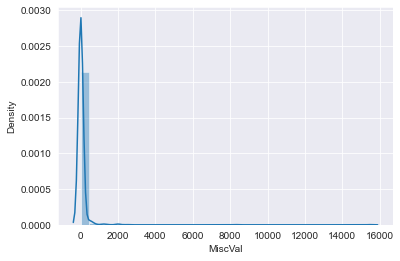

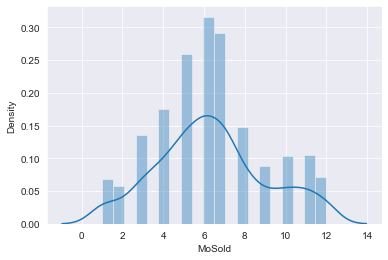

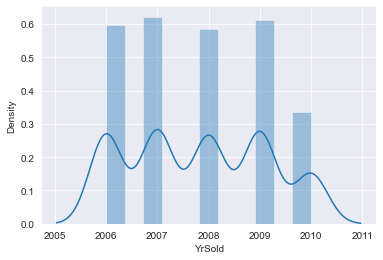

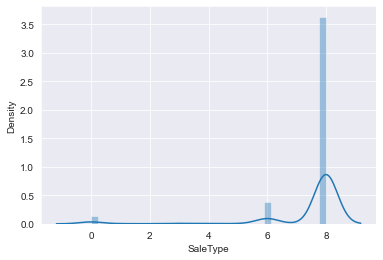

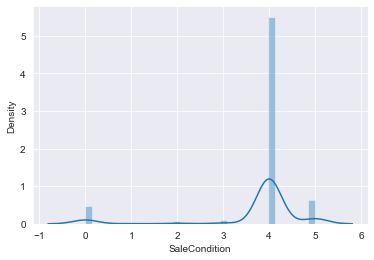

In [164]:
# skew distribution with distplot
for i in x.columns:
    sns.distplot(x[i], kde=True)
    plt.show()

In [165]:
x.iloc[:,:30].skew()

MSSubClass       1.422019
MSZoning        -1.796785
LotFrontage      2.733440
LotArea         10.659285
Street          17.021969
LotShape        -0.603775
LandContour     -3.125982
LotConfig       -1.118821
LandSlope        4.812568
Neighborhood     0.043735
Condition1       3.008289
Condition2      11.514458
BldgType         2.318657
HouseStyle       0.285680
OverallQual      0.175082
OverallCond      0.580714
YearBuilt       -0.579204
YearRemodAdd    -0.495864
RoofStyle        1.498560
Exterior1st     -0.612816
Exterior2nd     -0.592349
MasVnrArea       2.835718
ExterQual       -1.810843
ExterCond       -2.516219
Foundation      -0.002761
BsmtQual        -1.343781
BsmtCond        -3.293554
BsmtExposure    -1.166987
BsmtFinType1    -0.068901
BsmtFinSF1       1.871606
dtype: float64

In [166]:
x.iloc[:,30:].skew()

BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
Heating          10.103609
HeatingQC         0.449933
CentralAir        3.475188
Electrical       -3.104209
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
KitchenQual      -1.408106
TotRmsAbvGrd      0.644657
Functional       -3.999663
Fireplaces        0.671966
GarageType        0.831142
GarageYrBlt      -0.674913
GarageFinish     -0.450190
GarageCars       -0.358556
GarageArea        0.189665
GarageQual       -4.582386
GarageCond       -5.422472
PavedDrive       -3.274035
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
M

 - The dataset is skewed and hence we perform power_tranformation function to remove skewness

##### skewness removal

In [255]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
house_ = pt.fit_transform(x)

#create the new dataframe
house_new = pd.DataFrame(house_, columns = x.columns)

In [256]:
house_new.iloc[:,:30].skew()

MSSubClass       0.064007
MSZoning         0.233113
LotFrontage      0.155904
LotArea          0.032509
Street          17.021969
LotShape        -0.594207
LandContour     -2.592303
LotConfig       -1.030401
LandSlope        3.954345
Neighborhood    -0.146541
Condition1       0.225468
Condition2       0.537277
BldgType         1.857194
HouseStyle      -0.080331
OverallQual      0.021658
OverallCond      0.048063
YearBuilt       -0.126641
YearRemodAdd    -0.225131
RoofStyle       -0.292233
Exterior1st     -0.338023
Exterior2nd     -0.352793
MasVnrArea       0.439526
ExterQual       -0.605112
ExterCond       -2.270791
Foundation       0.004296
BsmtQual        -0.413999
BsmtCond        -3.025865
BsmtExposure    -0.914214
BsmtFinType1    -0.206639
BsmtFinSF1      -0.404528
dtype: float64

In [257]:
house_new.iloc[:,30:].skew()

BsmtFinType2     -2.420885
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
Heating          -4.541694
HeatingQC         0.156511
CentralAir        3.475188
Electrical       -3.006845
1stFlrSF         -0.002391
2ndFlrSF          0.280208
LowQualFinSF      6.922843
GrLivArea        -0.000054
BsmtFullBath      0.365488
BsmtHalfBath      3.954345
FullBath         -0.045944
HalfBath          0.498003
BedroomAbvGr      0.116498
KitchenAbvGr     -2.370593
KitchenQual      -0.435558
TotRmsAbvGrd      0.002332
Functional       -3.343664
Fireplaces        0.084950
GarageType        0.222501
GarageYrBlt      -0.136293
GarageFinish     -0.335248
GarageCars       -0.022970
GarageArea       -0.320370
GarageQual       -4.327379
GarageCond       -4.925781
PavedDrive       -3.025809
WoodDeckSF        0.113026
OpenPorchSF      -0.002749
EnclosedPorch     2.022616
3SsnPorch         7.087955
ScreenPorch       3.067153
PoolArea         12.817372
MiscVal           4.991071
M

    MSSubClass - removed
    LotFrontage - removed 
    LotArea - removed
    OverallQual  -  removed
    OverallCond   -  remvoved
    YearBuilt     - removed
    YearRemodAdd    - removed
    MasVnrArea    - removed
    BsmtFinSF1   - removed
    BsmtFinSF2  - not removed     
    BsmtUnfSF  -  removed

    TotalBsmtSF - removed
    1stFlrSF  -    removed
    2ndFlrSF   -   removed
    LowQualFinSF   - not removed 
    GrLivArea     -  removed
    BsmtFullBath   - removed
    BsmtHalfBath   - not removed  
    FullBath       - removed
    HalfBath       -  reoved
    BedroomAbvGr   - removed
    KitchenAbvGr   - not removed
    WoodDeckSF     - removed

    TotRmsAbvGrd  -  removed
    OpenPorchSF    - removed
    EnclosedPorch  - not removed
    3SsnPorch     - not removed
    ScreenPorch    - not removedA
    PoolArea       - not removed
    WoodDeckSF     - removed

    MiscVal        - not removd  
    MoSold        - removed
    YrSold        - removed



Skewness removed from numerical columns

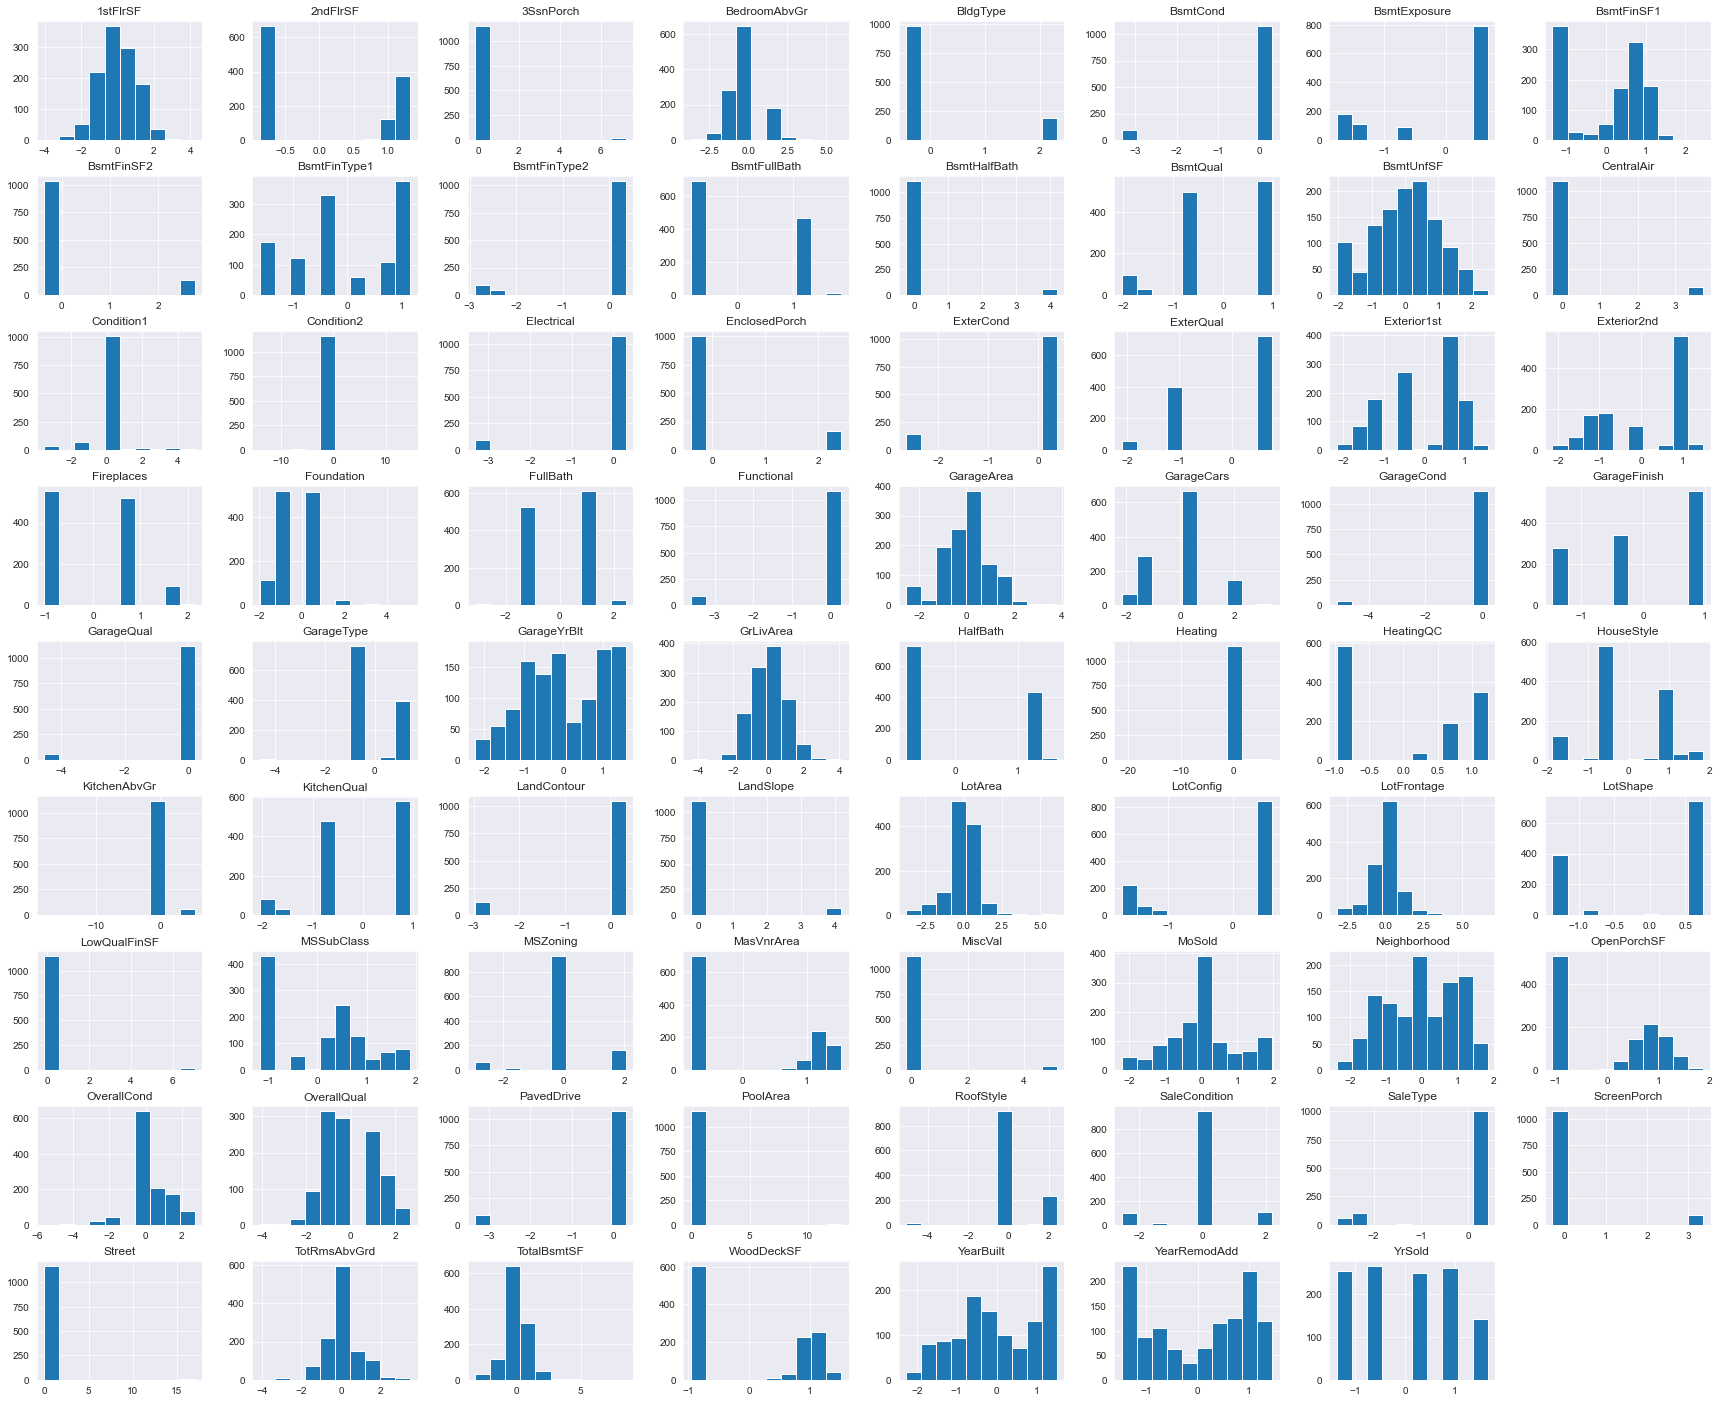

In [258]:
fig_size = (30,25)
fig, ax = plt.subplots(figsize = fig_size)
house_new.hist(ax=ax)
plt.show()

In [259]:
# initializing x 
x = house_new

# outlier removal

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 30 Text major ticklabel objects>)

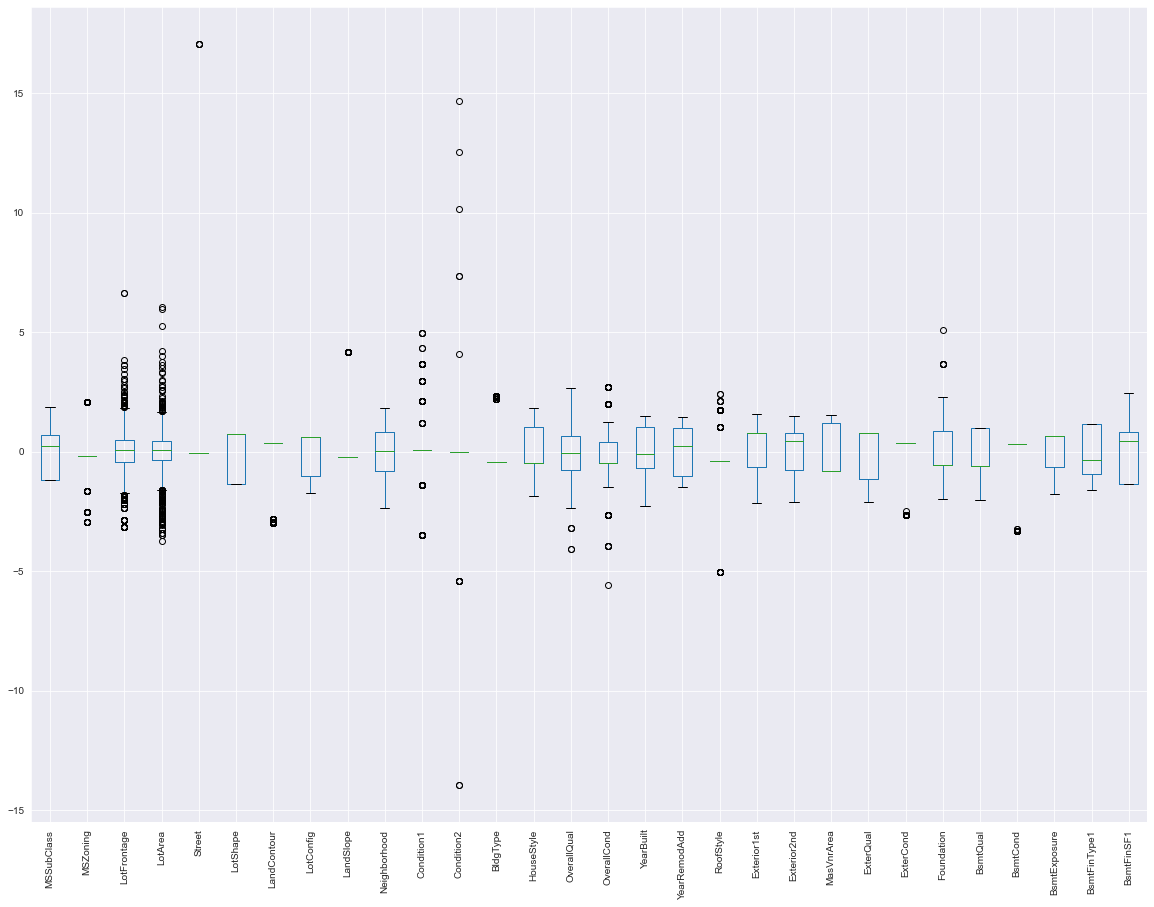

In [260]:
# setting figure size
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
house_new.iloc[:,:30].boxplot()

plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41]),
 <a list of 41 Text major ticklabel objects>)

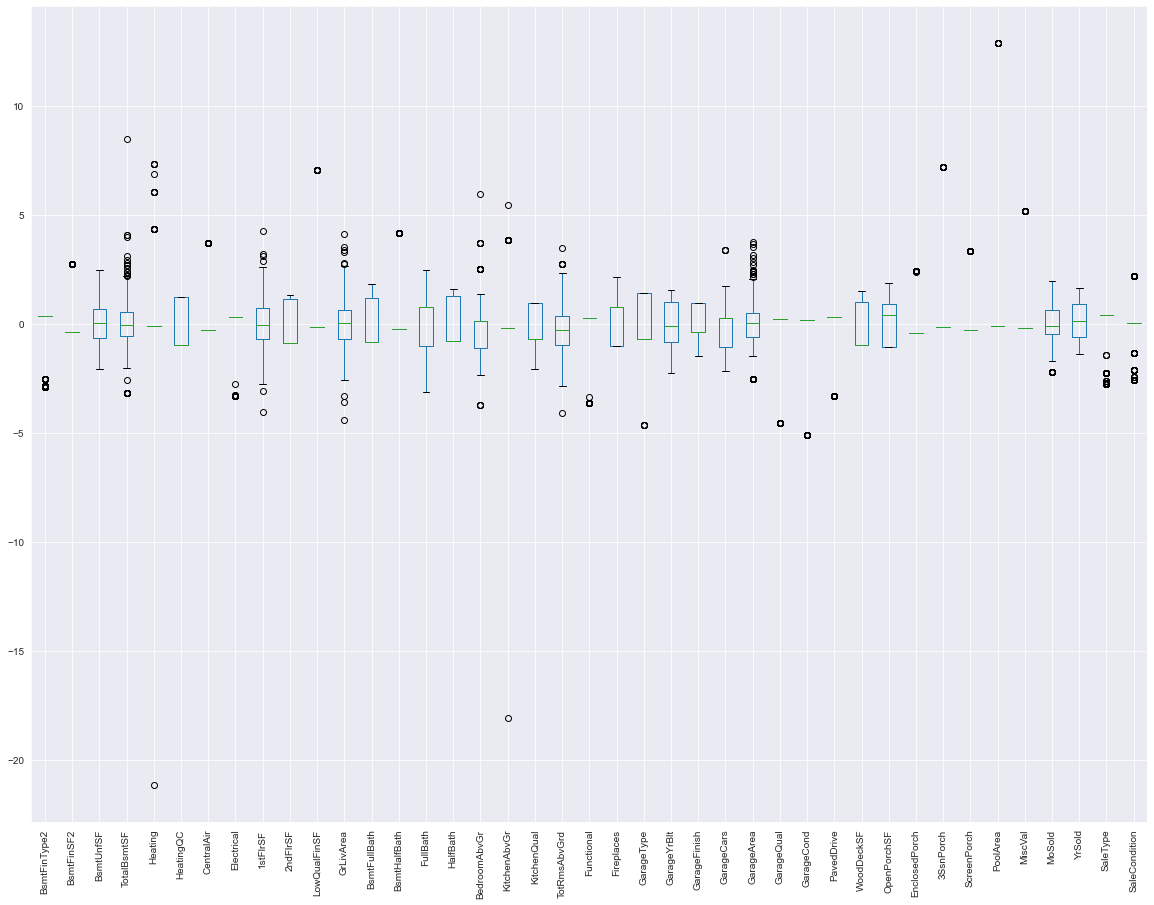

In [261]:
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)

house_new.iloc[:,30:].boxplot()
plt.xticks(rotation=90)

- Outliers are present 

### removing outliers

In [262]:
# z-score method
from scipy.stats import zscore
z = np.abs(zscore(x))

In [263]:
threshold = 3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 8, 18, 26, ..., 36, 58, 59], dtype=int64))


In [264]:
#x = x[(z<3).all(axis=1)]
#y = y[(z<3).all(axis=1)]

In [265]:
print(x.shape)
print(y.shape)

(1168, 71)
(1168,)


In [266]:
loss = (1168-578)/1168*100
print(loss)

50.513698630136986


##### since there is a 50% loss of data, the outliers are not removed 

### apply scaling to minimize the difference in range

In [267]:
from sklearn.preprocessing import StandardScaler
# Use standard scalar
scale = StandardScaler()
x = scale.fit_transform(x)

## Feature selection

In [268]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

test = SelectKBest(score_func=f_regression, k=50)
fit = test.fit(x, y)

In [269]:
from numpy import set_printoptions
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x)

[1.828e-03 4.912e+01 1.465e+02 1.847e+02 2.340e+00 7.765e+01 5.603e-04
 5.376e+00 2.442e-01 4.448e+01 2.013e+01 3.249e+00 1.657e+01 5.930e+01
 1.825e+03 3.038e+00 5.080e+02 4.127e+02 2.930e+01 1.272e+01 1.039e+01
 1.797e+02 6.994e+02 1.245e+01 1.897e+02 6.463e+02 3.361e-01 1.099e+02
 6.810e+00 5.726e+01 2.906e+00 2.611e+00 4.845e+01 6.092e+02 3.459e+00
 2.624e+02 7.560e+01 7.191e+01 5.714e+02 3.435e+01 3.729e+00 1.088e+03
 5.840e+01 1.088e-01 5.058e+02 1.238e+02 2.950e+01 1.305e+01 5.775e+02
 4.283e+02 1.841e+01 3.408e+02 7.273e+01 3.782e+02 4.802e+02 8.137e+02
 6.749e+02 7.171e+00 2.187e+01 6.658e+01 1.246e+02 2.946e+02 3.718e+01
 3.683e+00 6.137e+00 1.293e+01 4.640e+00 6.001e+00 2.420e+00 5.854e+01
 1.352e+02]


In [270]:
x = features 

## finding the best random state

In [271]:
# import the required libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu = 0
maxRS = 0
# loop untill the best random state is found 
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.8867101779104279  on Random State  181


# Split dependent and independent values

In [272]:
# split the train and test sets 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = 181)

##### Print shape of the train and test sets 

In [273]:

x_train.shape

(934, 50)

In [274]:
y_train.shape

(934,)

In [275]:
x_test.shape

(234, 50)

In [276]:
y_test.shape

(234,)

## Find the best accuracy Machine Learning algorithm

#### Decision tree regressor model

In [277]:
#DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
preddtr = DTR.predict(x_test)
print("The accuracy score is : " + str(r2_score(y_test,preddtr)))
print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,preddtr))
print("Mean squared error: ", mean_squared_error(y_test,preddtr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, preddtr)))

The accuracy score is : 0.7373357926933797
error
Mean absolute error:  26310.188034188035
Mean squared error:  1541490735.8290598
Root Mean Squared Error:  39261.82287959972


#### RandomforestRegressor

In [278]:
#RandomforestRegressor
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(x_train,y_train)
predrfr = RFR.predict(x_test)
print("The accuracy score is : " + str(r2_score(y_test,predrfr)))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predrfr))
print("Mean squared error: ", mean_squared_error(y_test,predrfr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predrfr)))

The accuracy score is : 0.909016128487732
error
Mean absolute error:  15774.808675213675
Mean squared error:  533954726.7751688
Root Mean Squared Error:  23107.460413796423


#### AdaBoostRegressor

In [279]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold

ada_reg = AdaBoostRegressor(n_estimators = 100)
print(ada_reg)
ada_reg.fit(x_train,y_train)
predada = ada_reg.predict(x_test)
#check the accuracy score
print("The accuracy score is : " + str(r2_score(y_test,predada)))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predada))
print("Mean squared error: ", mean_squared_error(y_test,predada))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predada)))

AdaBoostRegressor(n_estimators=100)
The accuracy score is : 0.8386789970813896
error
Mean absolute error:  23352.644404277045
Mean squared error:  946740456.3553678
Root Mean Squared Error:  30769.14780027825


# Check accuracy with cross validation score

#### Linear regression

In [280]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv = 5)
print("the cross validation score of Linear regression model :", scr.mean())

the cross validation score of Linear regression model : 0.7631758777723225


#### Decision tree regressor

In [281]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(DTR, x, y, cv = 5)
print("the cross validation score of DECISION TREE REGRESSOR model :", scr.mean())

the cross validation score of DECISION TREE REGRESSOR model : 0.6974097919654423


#### random forest regressor

In [282]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(RFR, x, y, cv = 5)
print("the cross validation score of Random forest REGRESSOR model :", scr.mean())

the cross validation score of Random forest REGRESSOR model : 0.8518546653550402


#### Ada boost regressor

In [283]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(ada_reg, x, y, cv = 5)
print("the cross validation score of ada_boost REGRESSOR model :", scr.mean())

the cross validation score of ada_boost REGRESSOR model : 0.7993107420875469


- After calculating the difference between actual accuarcy score and cross validation score. The random forest regressor model has the best accuracy

# Hyper parameter tuning

In [284]:
#import the randomized search CV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [285]:
#set the parameters 
param = {"max_depth": [5,8,15,25,20],
         "max_features": sp_randint(1, x_train.shape[1]),
         "min_samples_split": sp_randint(2, 11),
         "n_estimators":(50, 100)}

In [286]:
#initialize randomized CV search
RCV = RandomizedSearchCV(RandomForestRegressor(), param, cv=5)

In [287]:
#train the model
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 8, 15, 25, 20],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002027F6DC1F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002027F0833D0>,
                                        'n_estimators': (50, 100)})

In [288]:
#identify the best parameter 
RCV.best_params_

{'max_depth': 8,
 'max_features': 25,
 'min_samples_split': 8,
 'n_estimators': 50}

In [289]:
#initialize predicted values 
RCV_pred = RCV.best_estimator_.predict(x_test)

In [290]:
# the tuned model score
r2_score(y_test, RCV_pred)

0.9129844508869227

# Saving the model

In [291]:
import joblib
import pickle
#create pickled file
joblib.dump(RCV.best_estimator_, "houserfr.pkl")
filename = 'houserfr.pkl'
pickle.dump(RCV,open(filename, 'wb'))
load = pickle.load(open(filename, 'rb'))
#testing the test set 
load.predict(x_test)

array([109184.896, 109167.768, 207590.346, 164258.64 , 157269.557,
       205122.053, 187248.957, 148256.791, 115850.744, 142812.671,
        94005.143, 171310.025, 145249.244,  91515.364, 102371.436,
       133489.392, 114686.017, 204461.063, 312783.516, 139345.195,
       134151.414, 130673.898, 231262.929, 170992.199, 326404.698,
       134768.367,  78355.996, 180469.091, 203982.396, 128874.454,
       135473.123, 115275.009, 137547.336, 164434.668, 176527.281,
       127210.943, 164660.438, 203344.273, 199352.781, 109358.582,
       158685.657, 121480.362, 342213.214, 164856.804, 262035.331,
       340138.518, 233957.724, 140838.273, 188895.639, 284431.405,
       261437.871, 121520.954, 136578.189, 156075.883, 307410.701,
       119862.3  ,  95594.463, 123032.467, 178869.339, 122499.764,
       361543.351, 226707.399, 168245.135, 235498.374, 191822.271,
       174854.49 , 122874.351, 217054.026, 308748.725, 138368.127,
        78524.046, 132324.714, 266268.771, 127740.462, 173616.

##### To understand the performance of the forecasting model, the Mean Absolute Percentage Error(MAPE) is calculated. 

In [292]:
# defining MAPE function
def MAPE(actual, predicted):
    mape = np.mean(np.abs((actual-predicted)/actual))*100
    return mape





In [293]:
MAPE(y_test, RCV_pred)

9.981582024491068

##### Since MAPE  is less than 10 % , it is a good forecast percentage

# Conclusion

In [294]:
#creating a comparison dataframe
# Conclusion
import numpy as np
a = np.array(y_test)
predicted = np.array(RCV_pred)
df_con = pd.DataFrame({"orginal_price":a, "predicted_price":predicted}, index = range(len(a)))


In [295]:
df_con.head()

orginal_price  predicted_price
0         100000    109184.896041
1          85400    109167.768383
2         187500    207590.346006
3         145000    164258.640467
4         168500    157269.556918

# Regression plot

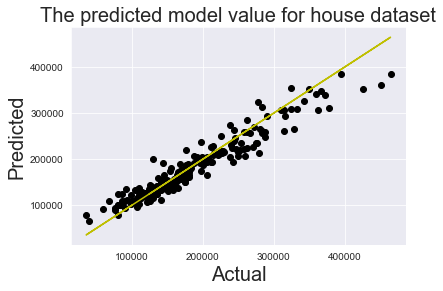

In [296]:
plt.scatter(x=y_test, y=RCV_pred, color = "black")
plt.plot(y_test,y_test, color='y')
plt.xlabel("Actual", fontsize =20)
plt.ylabel("Predicted", fontsize=20)
plt.title("The predicted model value for house dataset", fontsize=20)
plt.show()

### Observation:

- The predicted and actual values form a perfect linear regression model

Text(0, 0.5, 'Predicted')

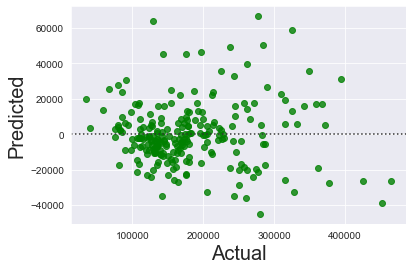

In [297]:
sns.residplot(x=y_test, y=RCV_pred, color="g")
plt.xlabel("Actual", fontsize =20)
plt.ylabel("Predicted", fontsize=20)

### create pickle file for test data

In [298]:
import gzip, pickle
with gzip.open("housefinal.pklz", 'wb') as ofp:
    pickle.dump(RCV_pred, ofp)

## ------------------------------------ end ------------------------------------